## Arm Reaching (RM Session 1)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
# from google.colab import drive
# drive.mount('/content/drive')
from scipy.io import loadmat
from scipy.signal import butter, lfilter
warnings.filterwarnings('ignore')

### read paths of all .mat files in a list

In [2]:
folder_path=r'D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM'
folder_files=os.listdir(folder_path)
for i in folder_files:
    print(i)

EEG_session1_sub10_reaching_realMove.mat
EEG_session1_sub11_reaching_realMove.mat
EEG_session1_sub12_reaching_realMove.mat
EEG_session1_sub13_reaching_realMove.mat
EEG_session1_sub14_reaching_realMove.mat
EEG_session1_sub15_reaching_realMove.mat
EEG_session1_sub16_reaching_realMove.mat
EEG_session1_sub17_reaching_realMove.mat
EEG_session1_sub18_reaching_realMove.mat
EEG_session1_sub19_reaching_realMove.mat
EEG_session1_sub1_reaching_realMove.mat
EEG_session1_sub20_reaching_realMove.mat
EEG_session1_sub21_reaching_realMove.mat
EEG_session1_sub22_reaching_realMove.mat
EEG_session1_sub23_reaching_realMove.mat
EEG_session1_sub24_reaching_realMove.mat
EEG_session1_sub25_reaching_realMove.mat
EEG_session1_sub2_reaching_realMove.mat
EEG_session1_sub3_reaching_realMove.mat
EEG_session1_sub4_reaching_realMove.mat
EEG_session1_sub5_reaching_realMove.mat
EEG_session1_sub6_reaching_realMove.mat
EEG_session1_sub7_reaching_realMove.mat
EEG_session1_sub8_reaching_realMove.mat
EEG_session1_sub9_reachi

In [3]:
matfiles=[]
for i in folder_files:
    file=folder_path+'\\'+i
    matfiles.append(file) 
for i in matfiles:
    print(i)

D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub10_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub11_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub12_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub13_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub14_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub15_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub16_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub17_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub18_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-rea

### explore all keys for a file

In [4]:
temp = loadmat(matfiles[10])
temp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'mnt', 'nfo', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch50', 'ch51', 'ch52', 'ch53', 'ch54', 'ch55', 'ch56', 'ch57', 'ch58', 'ch59', 'ch60', 'dat'])

In [5]:
col=1
for i in temp['nfo'][0][0][0][0]:
    print('ch'+str(col),' : ',i[0],end = '\n')
    col+=1

ch1  :  Fp1
ch2  :  AF7
ch3  :  AF3
ch4  :  AFz
ch5  :  F7
ch6  :  F5
ch7  :  F3
ch8  :  F1
ch9  :  Fz
ch10  :  FT7
ch11  :  FC5
ch12  :  FC3
ch13  :  FC1
ch14  :  T7
ch15  :  C5
ch16  :  C3
ch17  :  C1
ch18  :  Cz
ch19  :  TP7
ch20  :  CP5
ch21  :  CP3
ch22  :  CP1
ch23  :  CPz
ch24  :  P7
ch25  :  P5
ch26  :  P3
ch27  :  P1
ch28  :  Pz
ch29  :  PO7
ch30  :  PO3
ch31  :  POz
ch32  :  Fp2
ch33  :  AF4
ch34  :  AF8
ch35  :  F2
ch36  :  F4
ch37  :  F6
ch38  :  F8
ch39  :  FC2
ch40  :  FC4
ch41  :  FC6
ch42  :  FT8
ch43  :  C2
ch44  :  C4
ch45  :  C6
ch46  :  T8
ch47  :  CP2
ch48  :  CP4
ch49  :  CP6
ch50  :  TP8
ch51  :  P2
ch52  :  P4
ch53  :  P6
ch54  :  P8
ch55  :  PO4
ch56  :  PO8
ch57  :  O1
ch58  :  Oz
ch59  :  O2
ch60  :  Iz


### to_data_frame() :
- prepare a file in data frame
- map the labels correctly for their trials
- drop unnecessary channels
- take selected count of trials

In [6]:
def to_data_frame(matfile,selected_channels,number_of_trials):

    #load the mat file
    data = loadmat(matfile)

    #new data frame to extract the target data
    df=pd.DataFrame()

    #the scientific name for the selected electrodes
    selected_electrodes=[]
    for i in selected_channels:
        selected_electrodes.append('ch'+str(i)+'_'+data['nfo'][0][0][0][0][i-1][0])

    #select target channels in the data frame   
    index=0
    for i in selected_electrodes:
        added_channel = pd.DataFrame(data['ch'+str(selected_channels[index])],columns =[i])
        df = pd.concat([df,added_channel],axis=1)
        index+=1

    #add labels col & initialize withe none
    labels = np.empty(data['nfo'][0][0][2][0][0])  # data['nfo'][0][0][2][0][0] --> return number of frames (rows)
    labels.fill(np.nan) 
    trials =np.empty(data['nfo'][0][0][2][0][0])
    trials.fill(np.nan)

    #dictionary for mapping triger events to numbers from 0 to 6 in the same order 
    label_decode ={11:0 , 21:1 , 31:2 , 41:3 , 51:4 , 61:5 , 8:6}

    #labels extraction
    start_point_info = data['mrk'][0][0][5][0][0][0][0][0] 
    end_point_info = data['mrk'][0][0][5][0][0][0][0][1]
    trigger_marking_time = data['mrk'][0][0][0][0]
    trigger_number = data['mrk'][0][0][1][0]
    last_trial ={0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0}

    
    for i in range (0,data['nfo'][0][0][8][0][0]): # data['nfo'][0][0][2][0][0] --> 600 (300 trial + 300 rest period)

        start,end=0,0
        label=label_decode[trigger_number[i]]

        if last_trial[label]==number_of_trials:
            continue

        last_trial[label]+=1


        if i==0:
            start=start_point_info
            end=trigger_marking_time[i]
        elif i==599:
            start=trigger_marking_time[i]
            end=end_point_info
        else:
            start=trigger_marking_time[i-1]
            end=trigger_marking_time[i]

        for j in range (start,end):
            labels[j]=label
            trials[j]=last_trial[label]
       
    df=df.assign(Label=labels)
    df=df.assign(Trial=trials)

    #drop rest of rows which didn't assigned to label
    df.dropna(how='any',inplace=True)
     
    return df,last_trial
    

### merge all subjects data in a global data frame and split the data into 80% train and 20% test

In [7]:
df=pd.DataFrame()
selected_channels=[]
for i in range(1,61):
    selected_channels.append(i)
labels_codes ={0:'Forward' , 1:'Backward' , 2:'Left' , 3:'Right' , 4:'Up' , 5:'Down' , 6:'Rest'}
number_of_trials=50

In [8]:
selected_channels

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

In [9]:
df,trials_count=to_data_frame(matfiles[10],selected_channels,number_of_trials)

In [10]:
trials_count

{0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50, 6: 50}

In [11]:
df

ch1_Fp1  ch2_AF7  ch3_AF3  ch4_AFz  ch5_F7  ch6_F5  ch7_F3  ch8_F1  \
38744        812     -801    -1617      570   -4319   -2992     734     936   
38745        740     -804    -1767      578   -4365   -3124     867     963   
38746        671     -806    -1913      584   -4399   -3250    1004     989   
38747        604     -807    -2056      588   -4421   -3368    1144    1015   
38748        540     -806    -2194      590   -4432   -3478    1287    1040   
...          ...      ...      ...      ...     ...     ...     ...     ...   
8396716     -766      799     1449      432     648    1433     282     873   
8396717     -724      805     1465      410     667    1476     222     846   
8396718     -674      813     1476      390     689    1524     166     820   
8396719     -618      823     1482      371     714    1577     113     795   
8396720     -556      835     1482      355     742    1635      64     773   

         ch9_Fz  ch10_FT7  ...  ch53_P6  ch54_P8  ch55_PO4  ch56_PO8  ch57_O1  \
38744       219     -3654  ...    -5296    -5931     -6079     -7000    -6176   
38745       192     -3769  ...    -5332    -5963     -6121     -7007    -6106   
38746       162     -3878  ...    -5363    -5991     -6158     -7010    -6031   
38747       127     -3981  ...    -5388    -6015     -6189     -7007    -5952   
38748        88     -4077  ...    -5409    -6035     -6213     -6998    -5868   
...         ...       ...  ...      ...      ...       ...       ...      ...   
8396716     215       962  ...     3111     4367      2990      3843     2078   
8396717     180       996  ...     3144     4422      3038      3842     2151   
8396718     149      1034  ...     3180     4480      3086      3841     2224   
8396719     120      1075  ...     3217     4540      3134      3843     2297   
8396720      95      1119  ...     3257     4603      3181      3846     2369   

         ch58_Oz  ch59_O2  ch60_Iz  Label  Trial  
38744      -7185    -6234    -5868    3.0    1.0  
38745      -7194    -6258    -5905    3.0    1.0  
38746      -7197    -6275    -5939    3.0    1.0  
38747      -7194    -6285    -5968    3.0    1.0  
38748      -7185    -6288    -5993    3.0    1.0  
...          ...      ...      ...    ...    ...  
8396716     2656     3637     1970    1.0   50.0  
8396717     2711     3671     2005    1.0   50.0  
8396718     2768     3709     2042    1.0   50.0  
8396719     2827     3748     2081    1.0   50.0  
8396720     2887     3791     2122    1.0   50.0  

[5857522 rows x 62 columns]

In [12]:
df['Trial'].value_counts()

27.0    196110
5.0     115609
1.0     115601
4.0     115572
3.0     115566
2.0     115565
31.0    115560
37.0    115560
42.0    115558
45.0    115558
48.0    115555
40.0    115555
49.0    115555
47.0    115550
6.0     115549
44.0    115546
34.0    115546
33.0    115546
32.0    115546
8.0     115545
38.0    115544
50.0    115543
28.0    115540
30.0    115539
7.0     115539
35.0    115538
46.0    115533
29.0    115533
11.0    115532
36.0    115531
41.0    115531
39.0    115529
12.0    115529
25.0    115528
24.0    115526
26.0    115524
9.0     115524
10.0    115523
22.0    115522
13.0    115522
17.0    115520
18.0    115519
21.0    115517
16.0    115516
43.0    115515
19.0    115515
14.0    115513
23.0    115512
20.0    115511
15.0    115502
Name: Trial, dtype: int64

### normalize the data between -1 and 1

In [14]:
features=df.columns[0:60]
features

Index(['ch1_Fp1', 'ch2_AF7', 'ch3_AF3', 'ch4_AFz', 'ch5_F7', 'ch6_F5',
       'ch7_F3', 'ch8_F1', 'ch9_Fz', 'ch10_FT7', 'ch11_FC5', 'ch12_FC3',
       'ch13_FC1', 'ch14_T7', 'ch15_C5', 'ch16_C3', 'ch17_C1', 'ch18_Cz',
       'ch19_TP7', 'ch20_CP5', 'ch21_CP3', 'ch22_CP1', 'ch23_CPz', 'ch24_P7',
       'ch25_P5', 'ch26_P3', 'ch27_P1', 'ch28_Pz', 'ch29_PO7', 'ch30_PO3',
       'ch31_POz', 'ch32_Fp2', 'ch33_AF4', 'ch34_AF8', 'ch35_F2', 'ch36_F4',
       'ch37_F6', 'ch38_F8', 'ch39_FC2', 'ch40_FC4', 'ch41_FC6', 'ch42_FT8',
       'ch43_C2', 'ch44_C4', 'ch45_C6', 'ch46_T8', 'ch47_CP2', 'ch48_CP4',
       'ch49_CP6', 'ch50_TP8', 'ch51_P2', 'ch52_P4', 'ch53_P6', 'ch54_P8',
       'ch55_PO4', 'ch56_PO8', 'ch57_O1', 'ch58_Oz', 'ch59_O2', 'ch60_Iz'],
      dtype='object')

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
df[features] = scaler.fit_transform(df[features])

In [17]:
df

ch1_Fp1   ch2_AF7   ch3_AF3   ch4_AFz    ch5_F7    ch6_F5    ch7_F3  \
38744    0.504070  0.411439  0.412310  0.500087  0.412421  0.444124  0.441126   
38745    0.502738  0.411386  0.409746  0.500242  0.411484  0.441961  0.443446   
38746    0.501461  0.411351  0.407250  0.500358  0.410792  0.439896  0.445836   
38747    0.500222  0.411334  0.404806  0.500435  0.410344  0.437963  0.448279   
38748    0.499038  0.411351  0.402448  0.500474  0.410120  0.436160  0.450774   
...           ...       ...       ...       ...       ...       ...       ...   
8396716  0.474879  0.439492  0.464714  0.497419  0.513597  0.516632  0.433240   
8396717  0.475656  0.439597  0.464987  0.496994  0.513984  0.517336  0.432193   
8396718  0.476581  0.439738  0.465175  0.496607  0.514432  0.518123  0.431216   
8396719  0.477617  0.439913  0.465278  0.496240  0.514941  0.518991  0.430291   
8396720  0.478764  0.440123  0.465278  0.495931  0.515511  0.519942  0.429436   

           ch8_F1    ch9_Fz  ch10_FT7  ...   ch53_P6   ch54_P8  ch55_PO4  \
38744    0.479642  0.501551  0.393804  ...  0.376163  0.373470  0.372541   
38745    0.480095  0.501040  0.391174  ...  0.375478  0.372841  0.371862   
38746    0.480532  0.500473  0.388682  ...  0.374888  0.372290  0.371265   
38747    0.480968  0.499811  0.386327  ...  0.374413  0.371818  0.370764   
38748    0.481388  0.499073  0.384132  ...  0.374013  0.371424  0.370376   
...           ...       ...       ...  ...       ...       ...       ...   
8396716  0.478584  0.501475  0.499348  ...  0.536074  0.576083  0.519028   
8396717  0.478131  0.500813  0.500126  ...  0.536701  0.577165  0.519803   
8396718  0.477694  0.500227  0.500995  ...  0.537386  0.578306  0.520578   
8396719  0.477275  0.499678  0.501932  ...  0.538090  0.579487  0.521354   
8396720  0.476905  0.499206  0.502938  ...  0.538851  0.580726  0.522113   

         ch56_PO8   ch57_O1   ch58_Oz   ch59_O2   ch60_Iz  Label  Trial  
38744    0.345798  0.374453  0.358362  0.374313  0.386415    3.0    1.0  
38745    0.345682  0.375768  0.358200  0.373920  0.385566    3.0    1.0  
38746    0.345633  0.377177  0.358146  0.373642  0.384787    3.0    1.0  
38747    0.345682  0.378661  0.358200  0.373479  0.384121    3.0    1.0  
38748    0.345831  0.380239  0.358362  0.373430  0.383548    3.0    1.0  
...           ...       ...       ...       ...       ...    ...    ...  
8396716  0.524175  0.529524  0.534923  0.535773  0.566215    1.0   50.0  
8396717  0.524158  0.530896  0.535910  0.536329  0.567018    1.0   50.0  
8396718  0.524142  0.532267  0.536932  0.536950  0.567866    1.0   50.0  
8396719  0.524175  0.533639  0.537991  0.537588  0.568761    1.0   50.0  
8396720  0.524224  0.534992  0.539067  0.538292  0.569702    1.0   50.0  

[5857522 rows x 62 columns]

### apply bandpass filter 

In [18]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [19]:
df.iloc[:,0:60] = butter_bandpass_filter(df.iloc[:,0:60].to_numpy() , 8,30,2500)

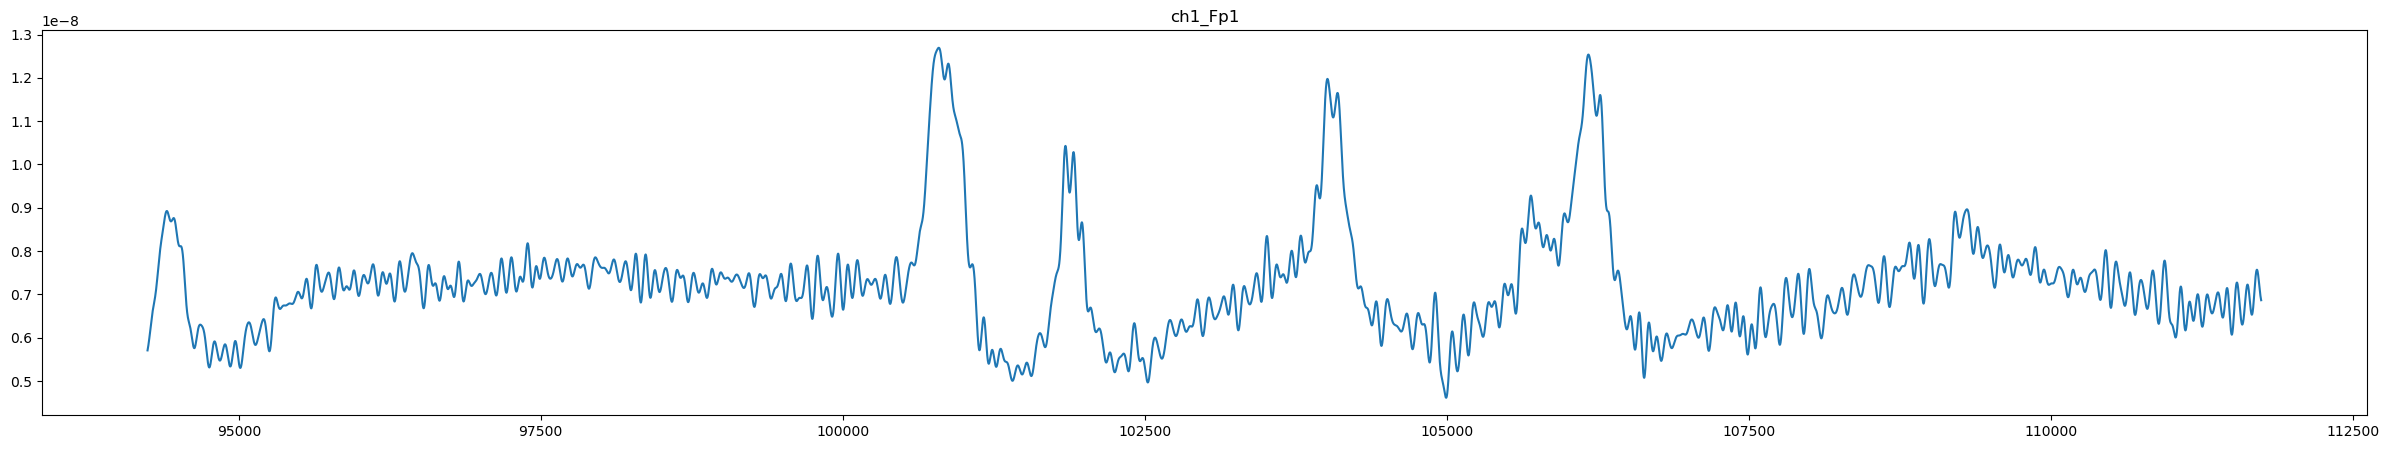

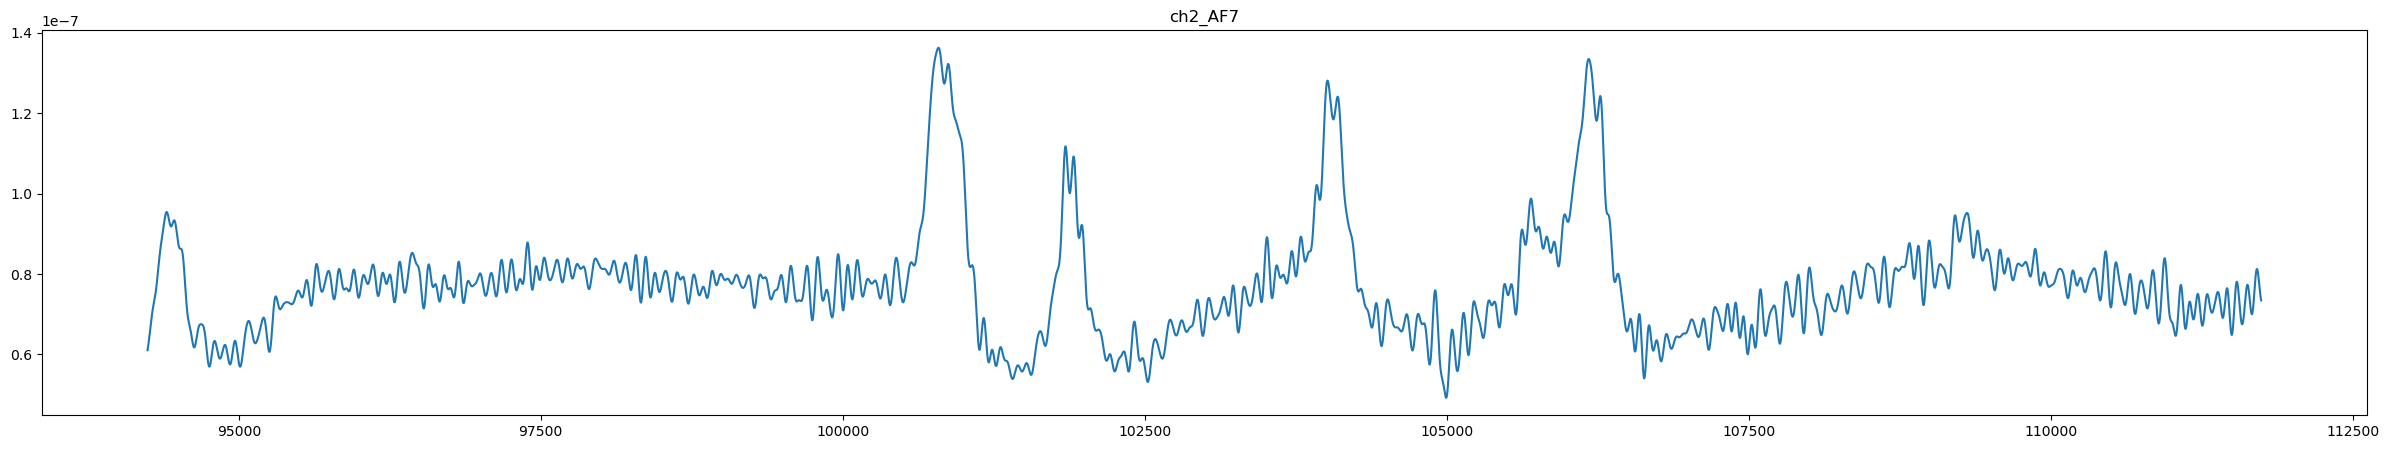

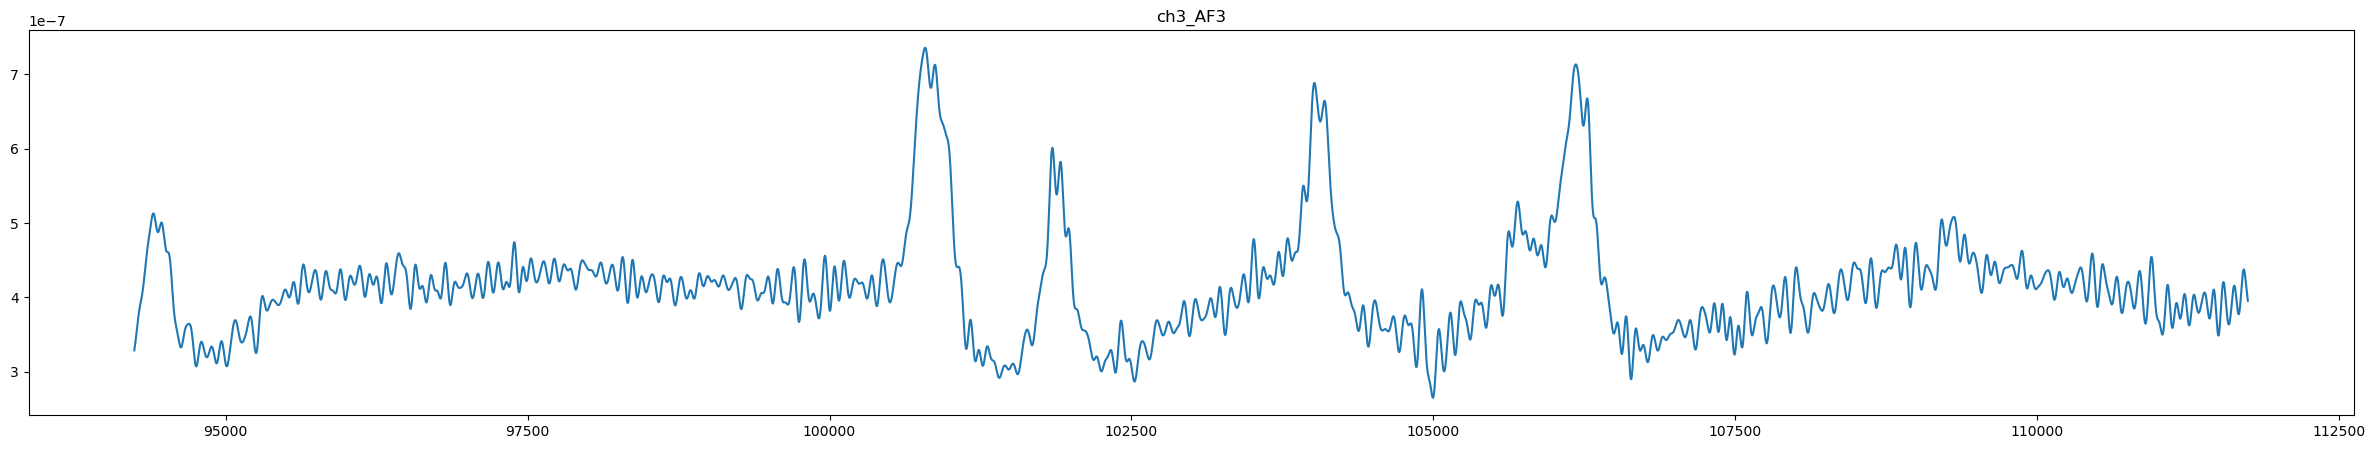

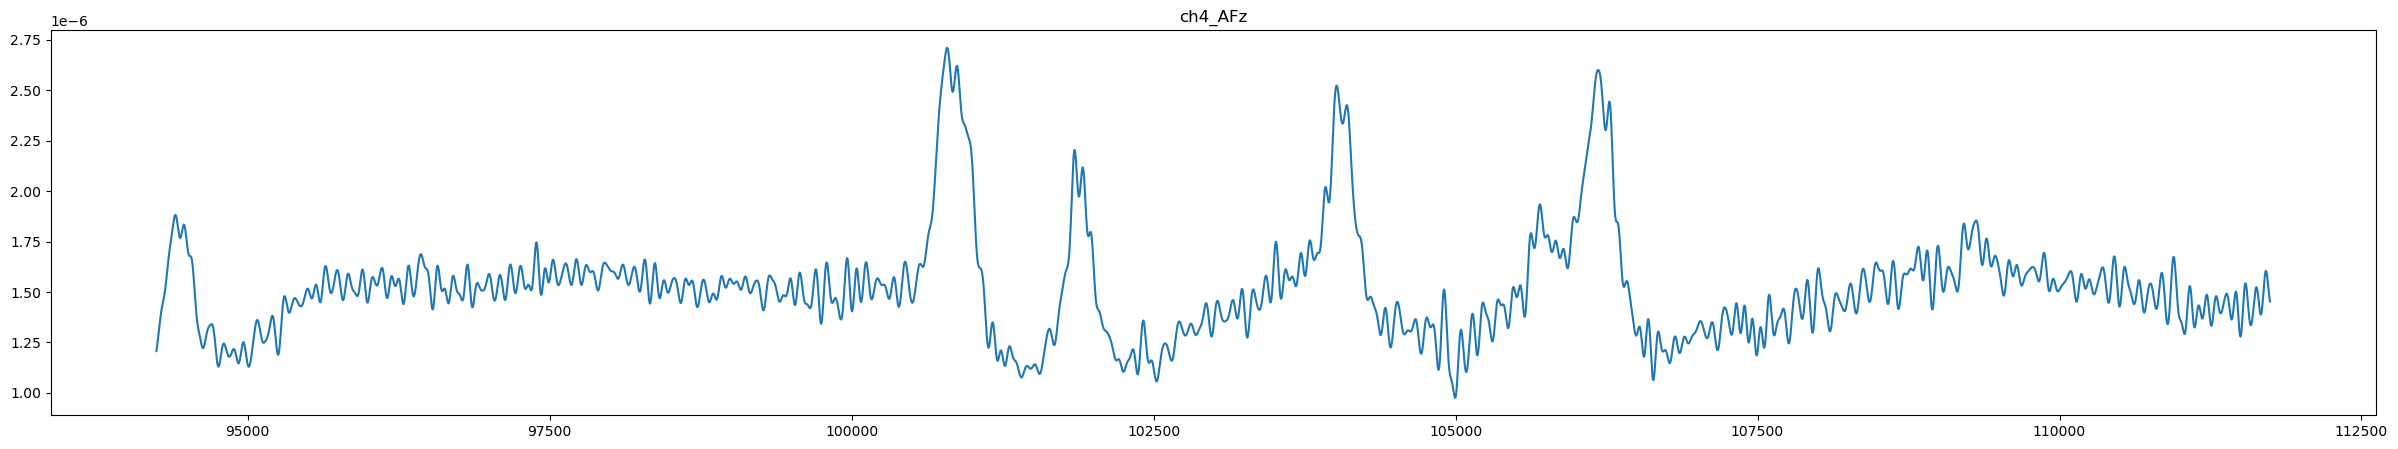

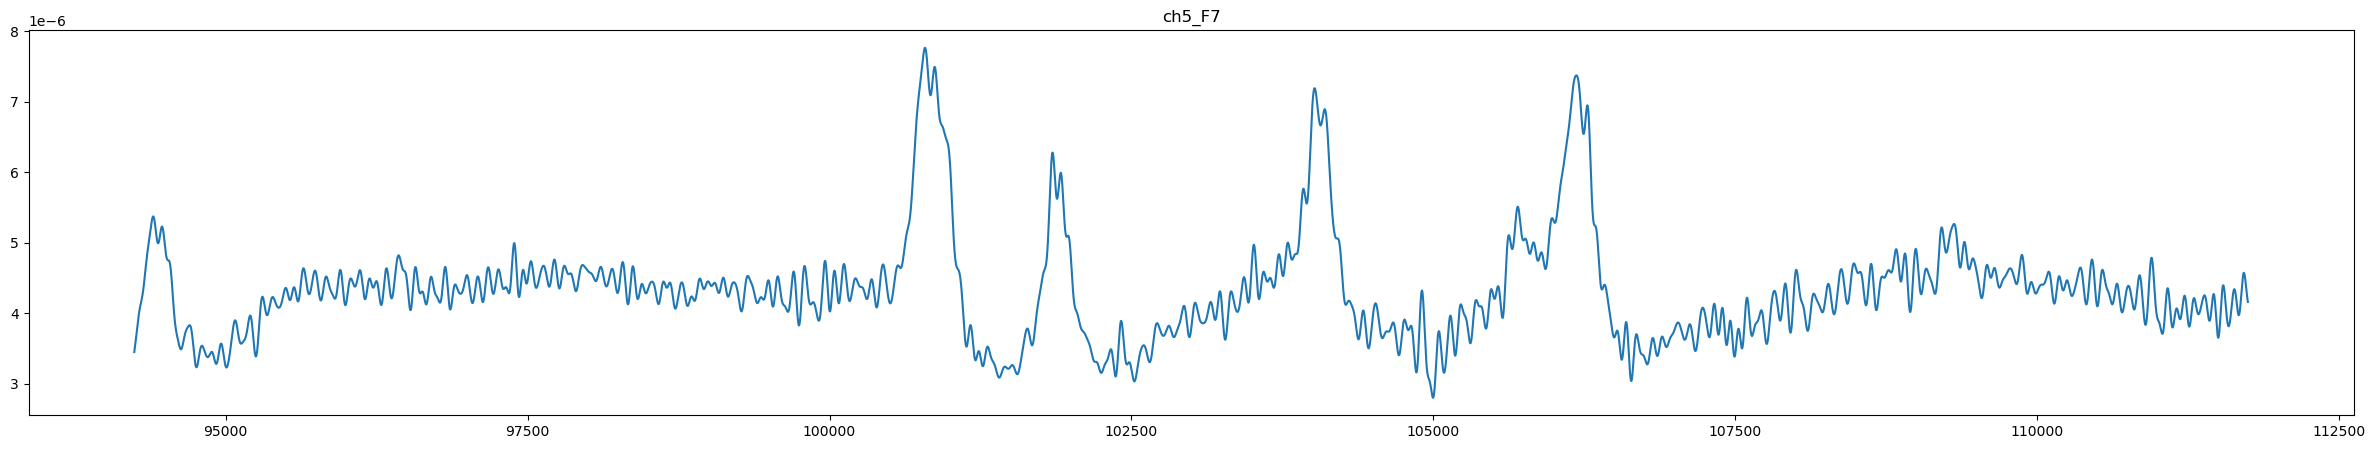

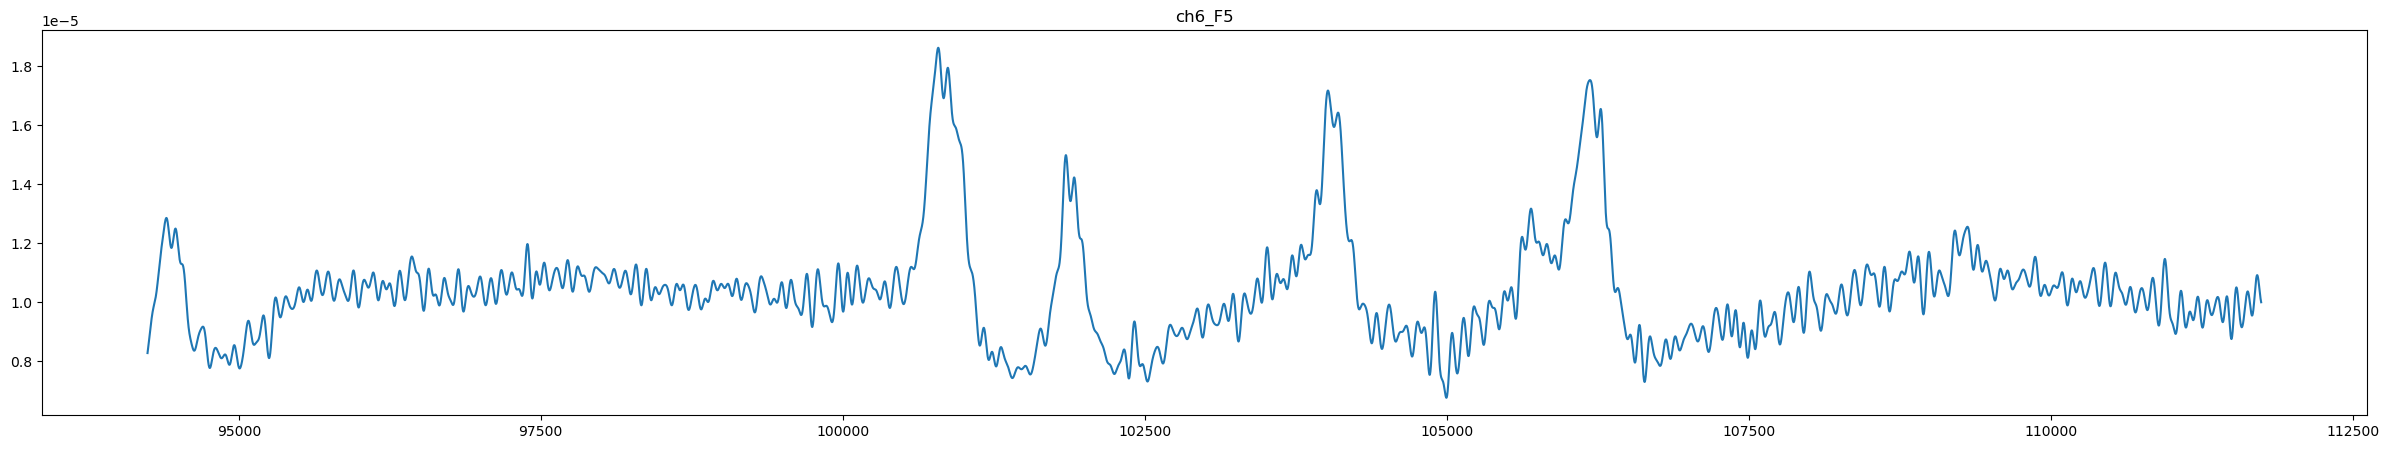

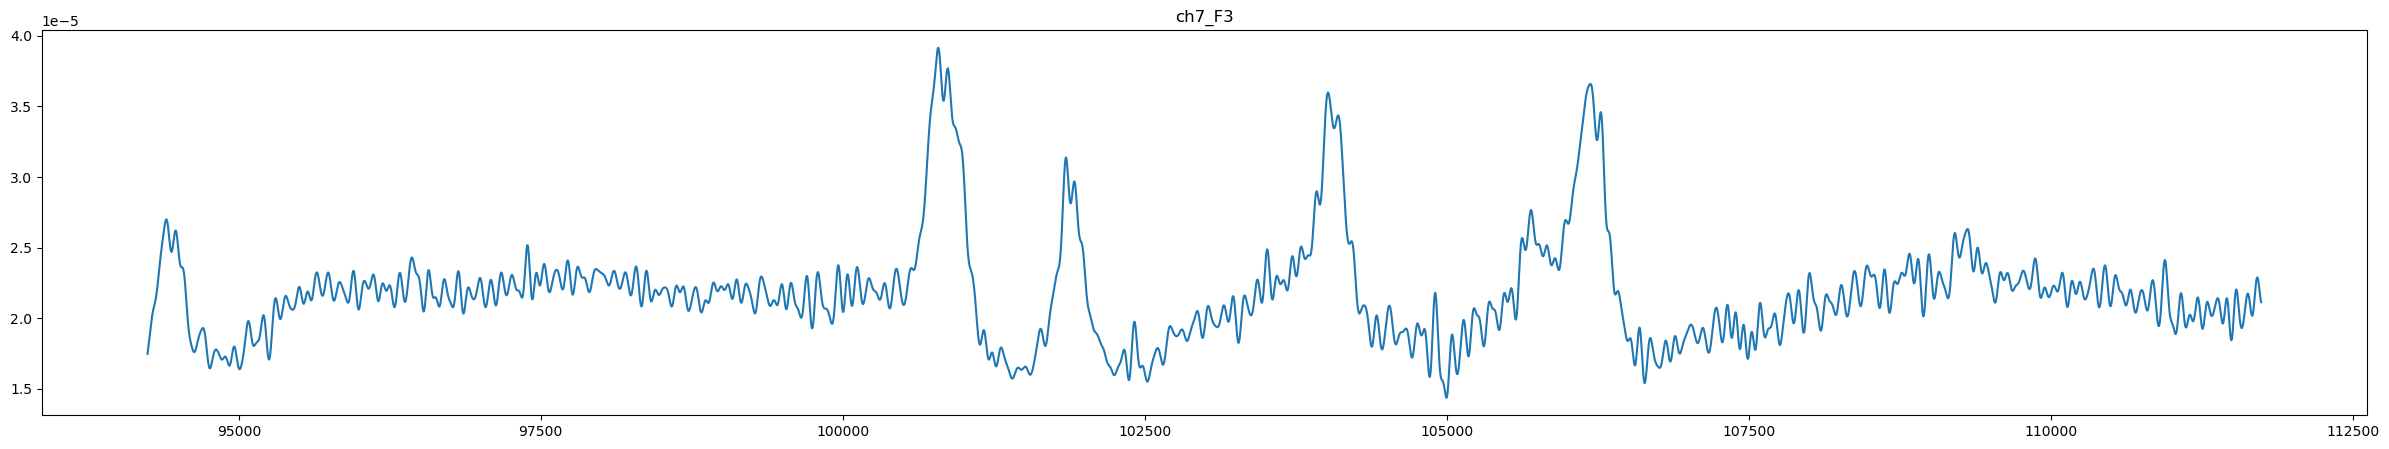

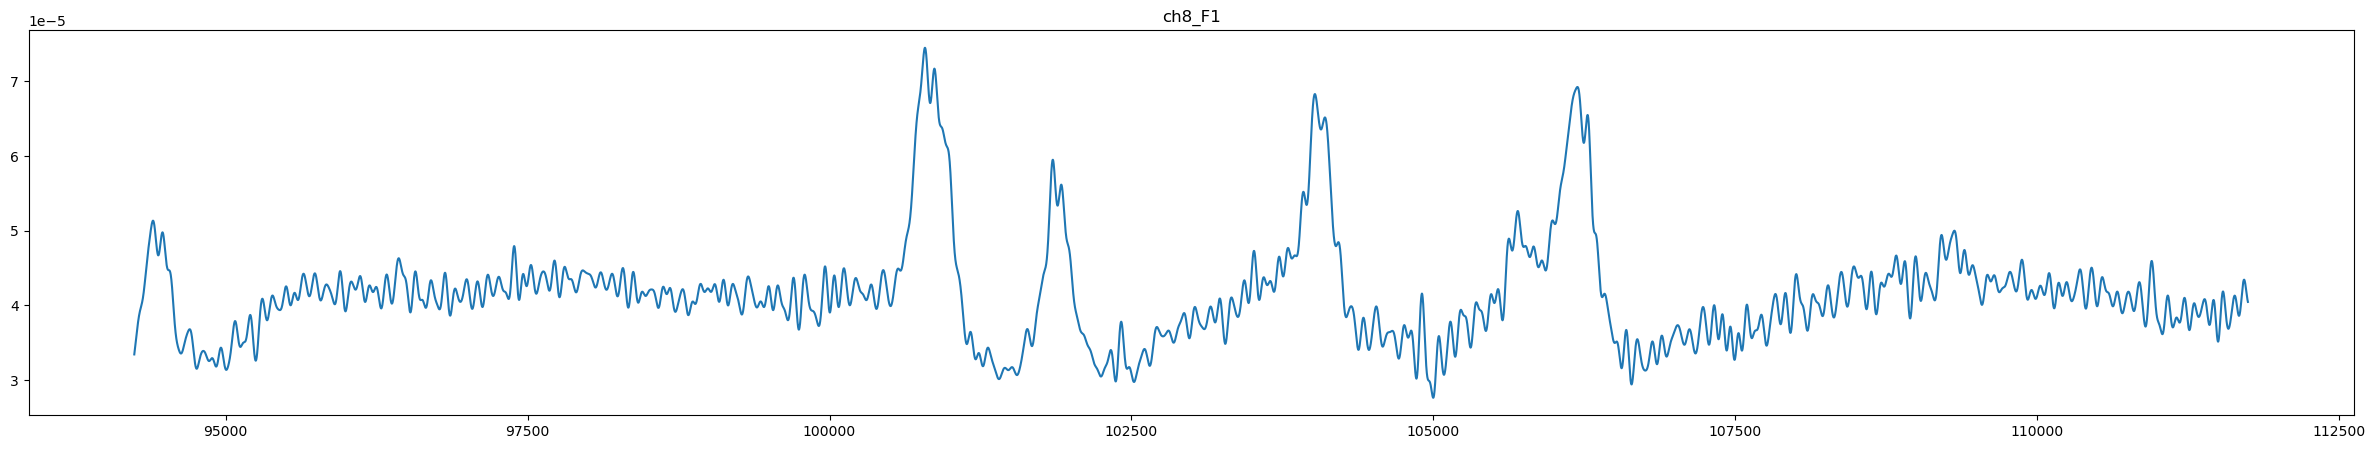

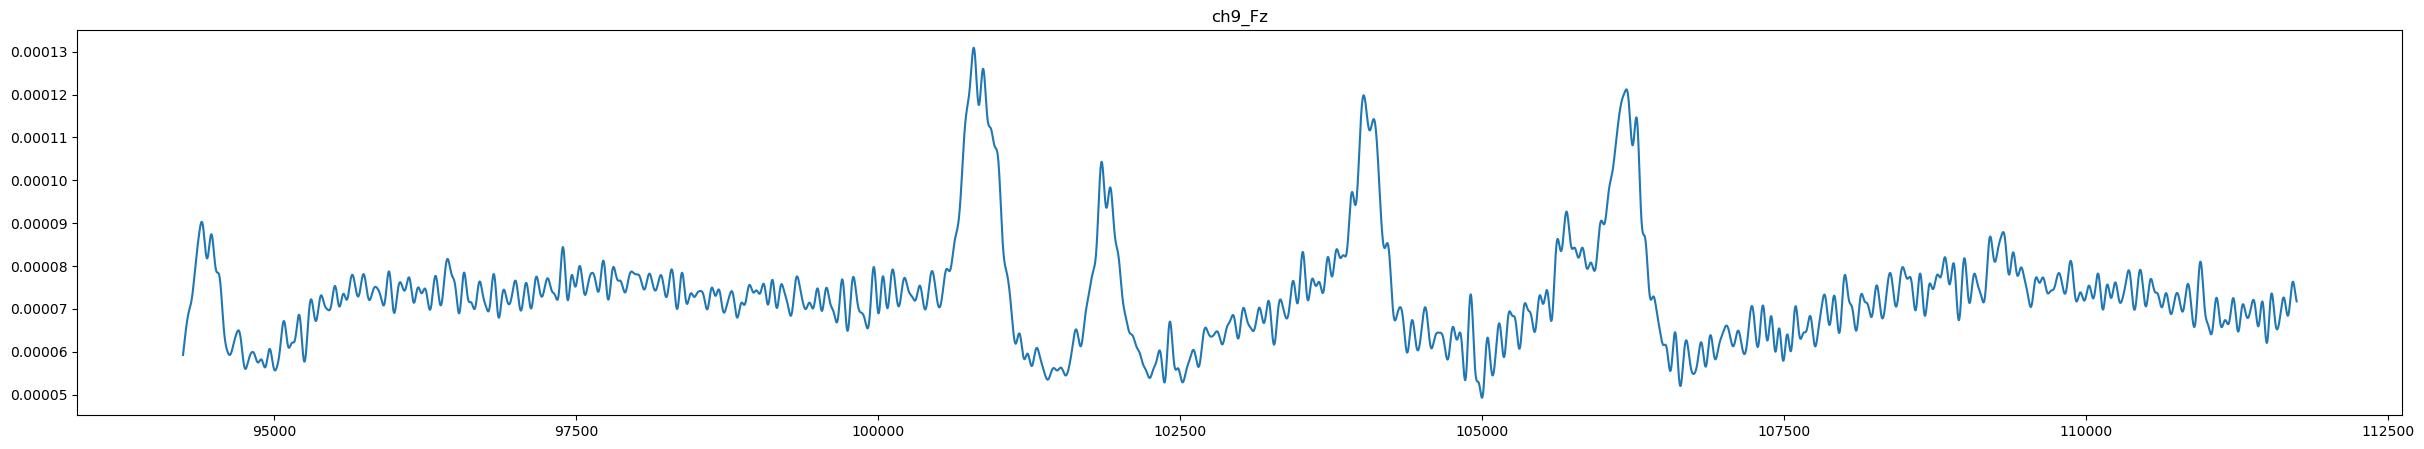

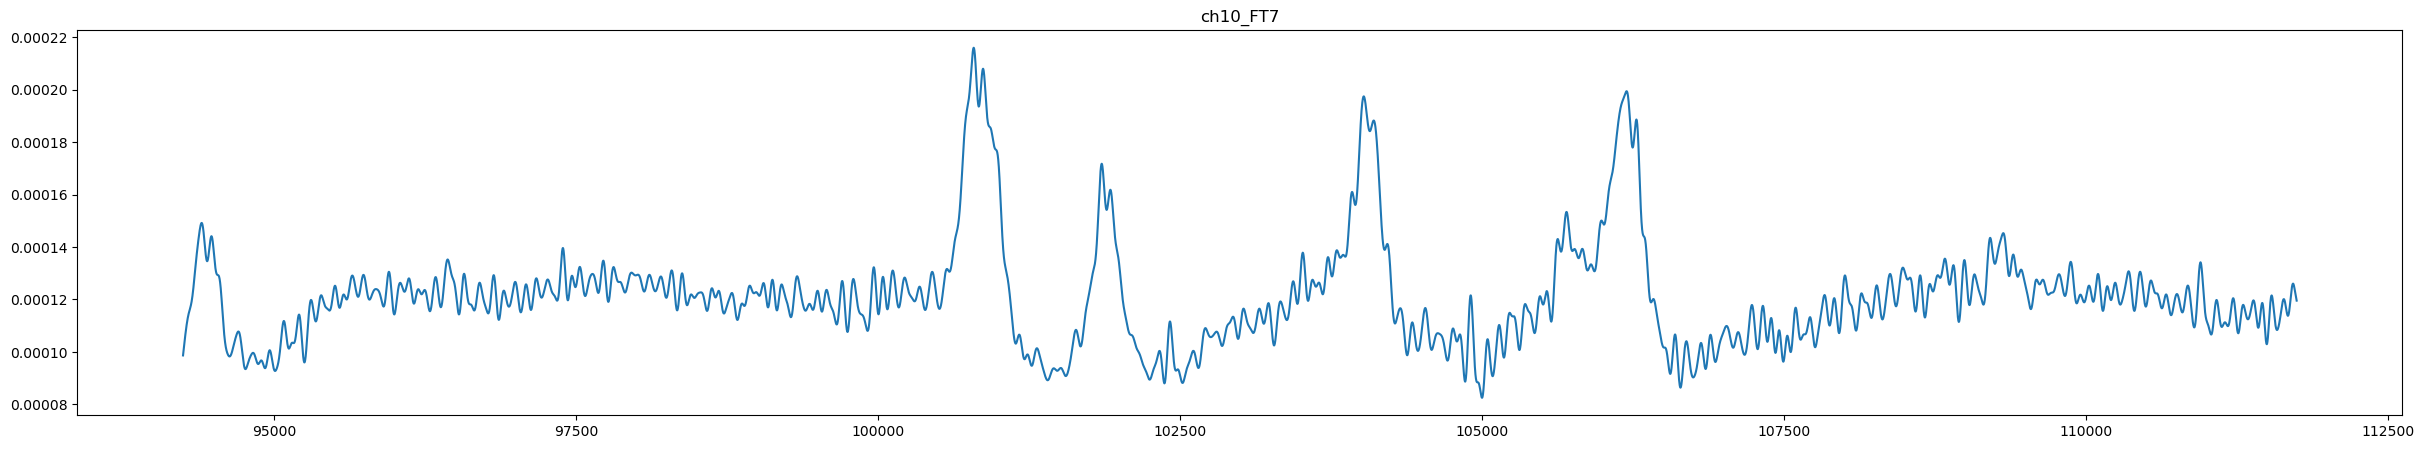

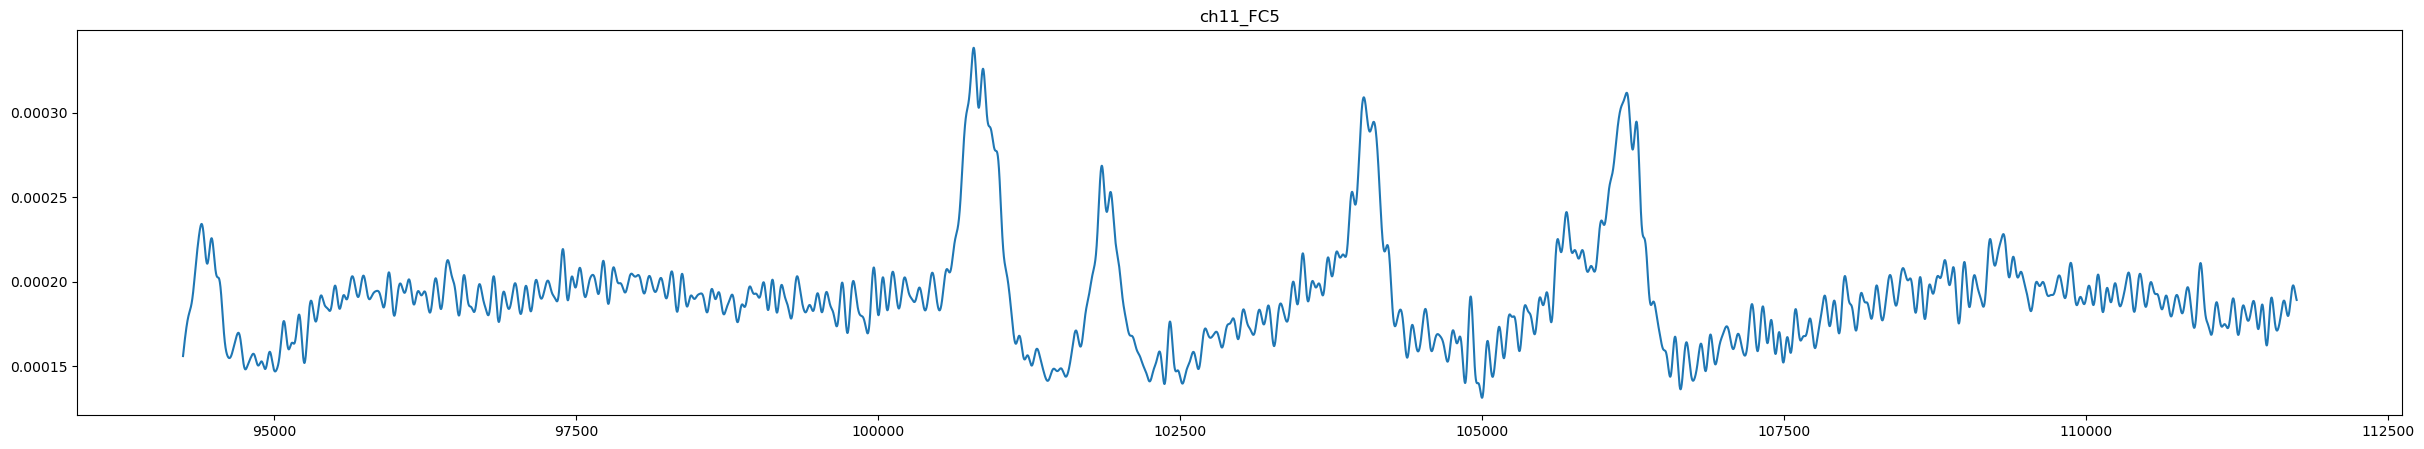

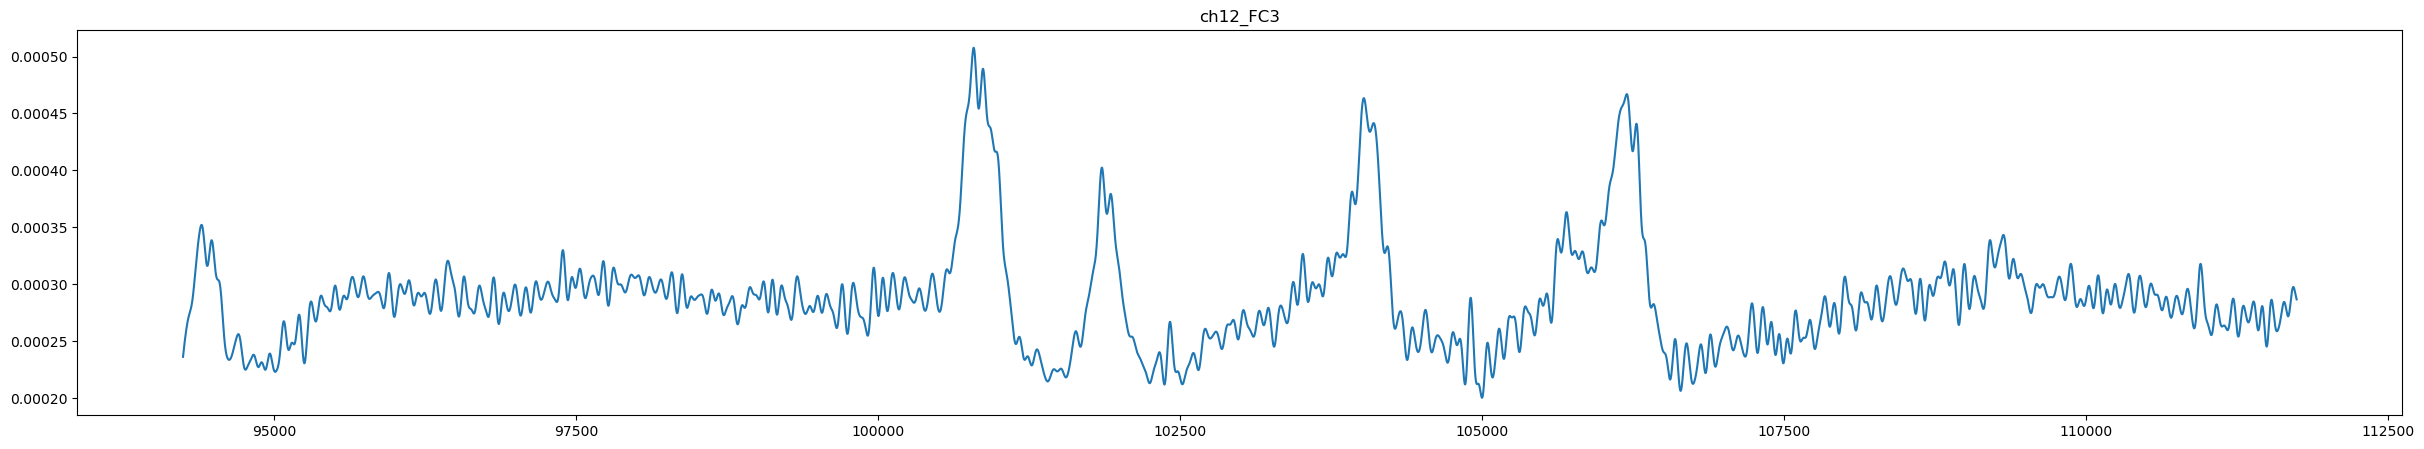

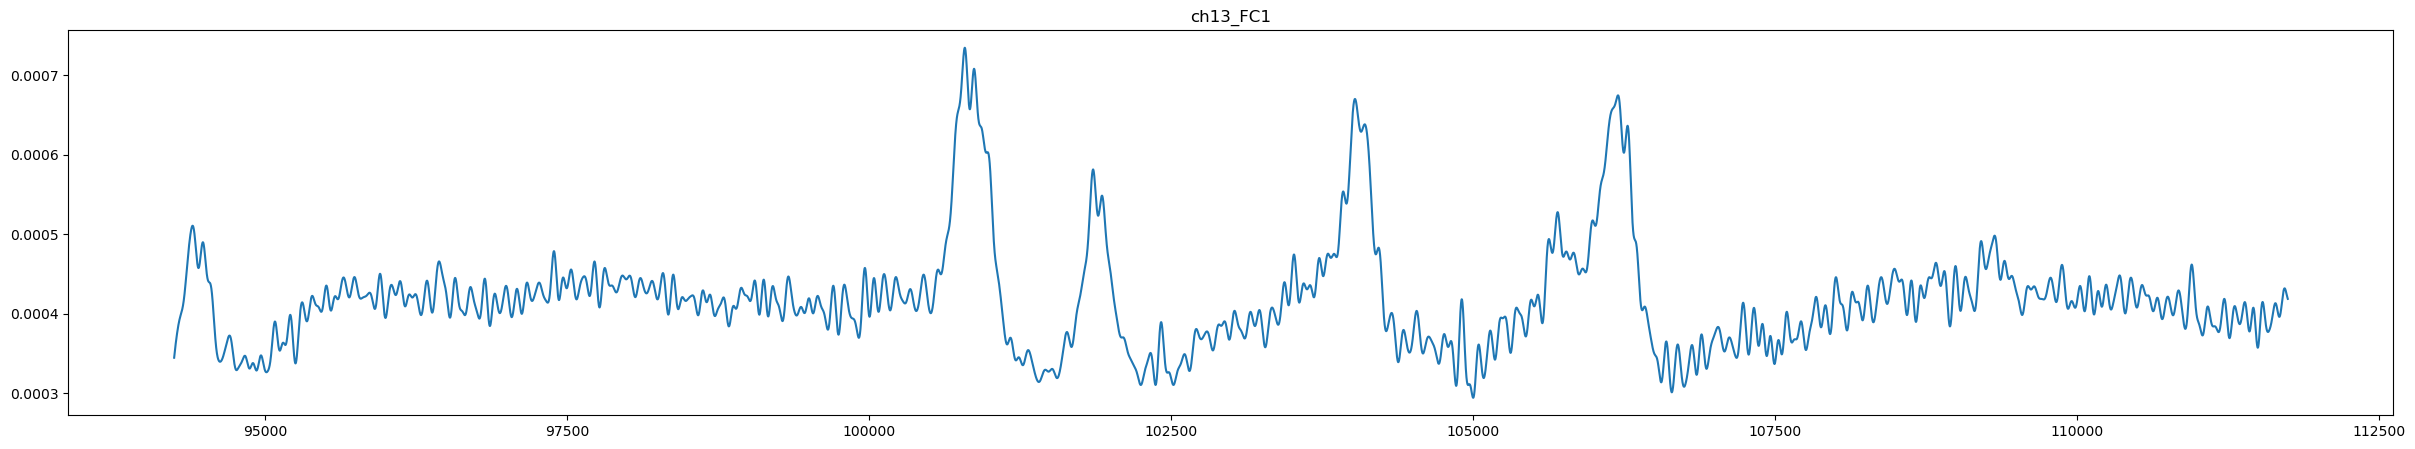

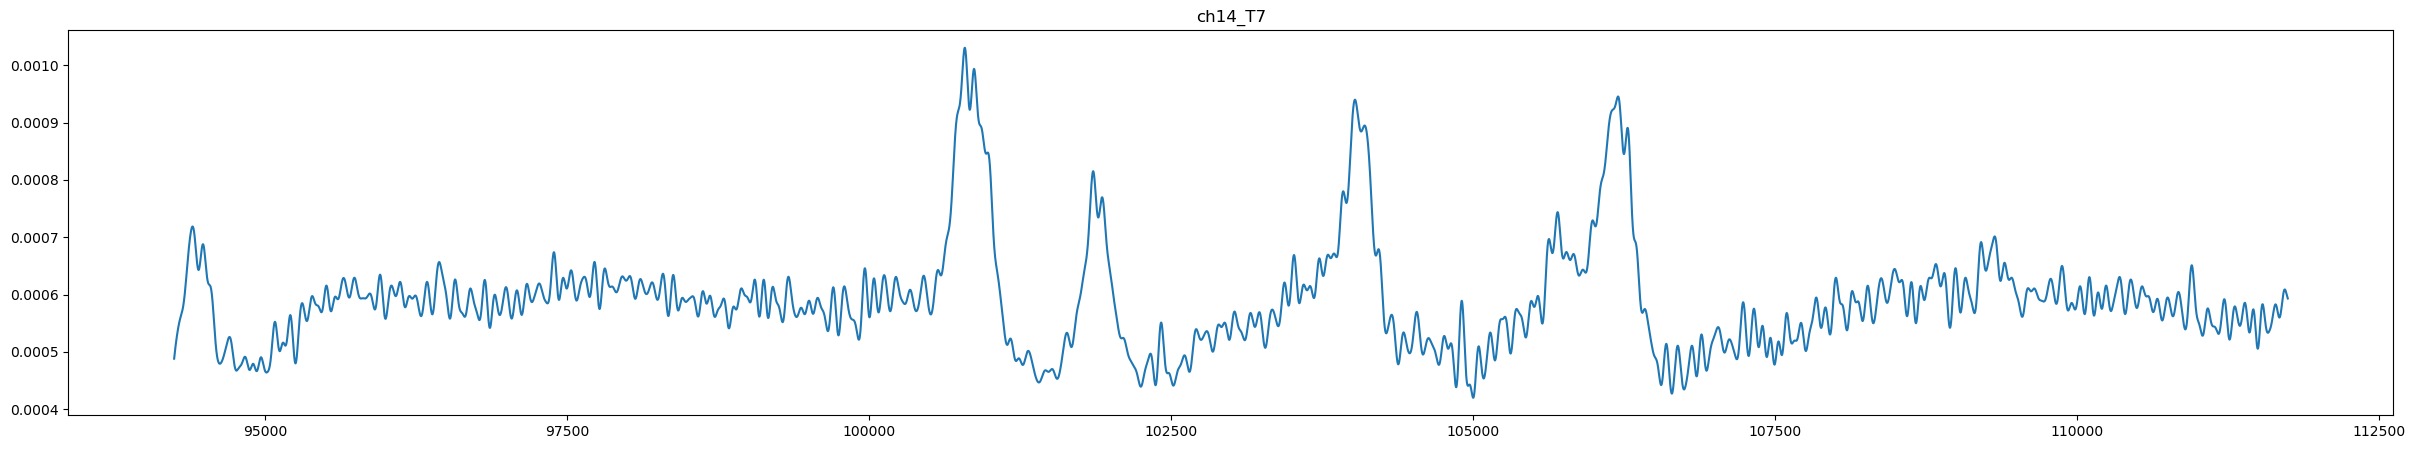

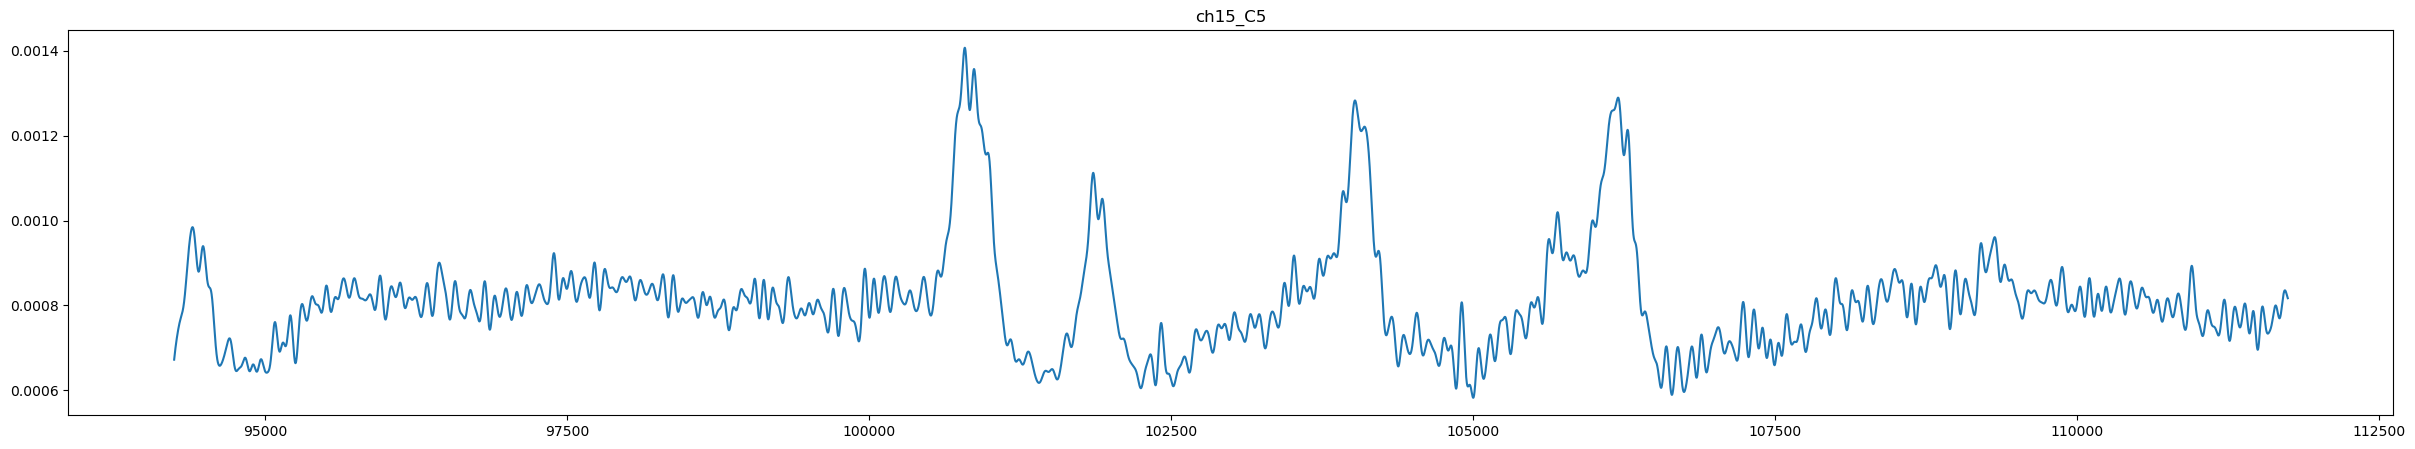

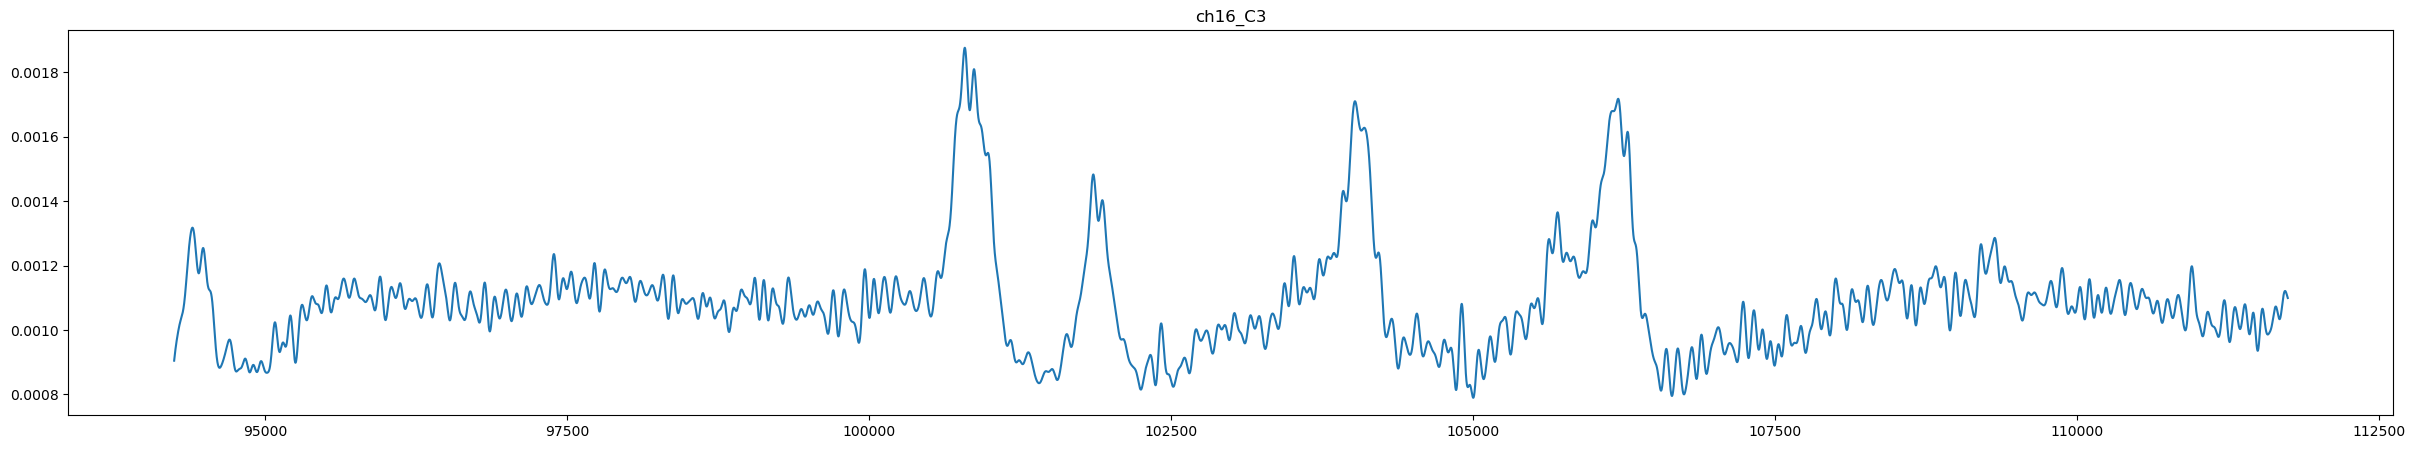

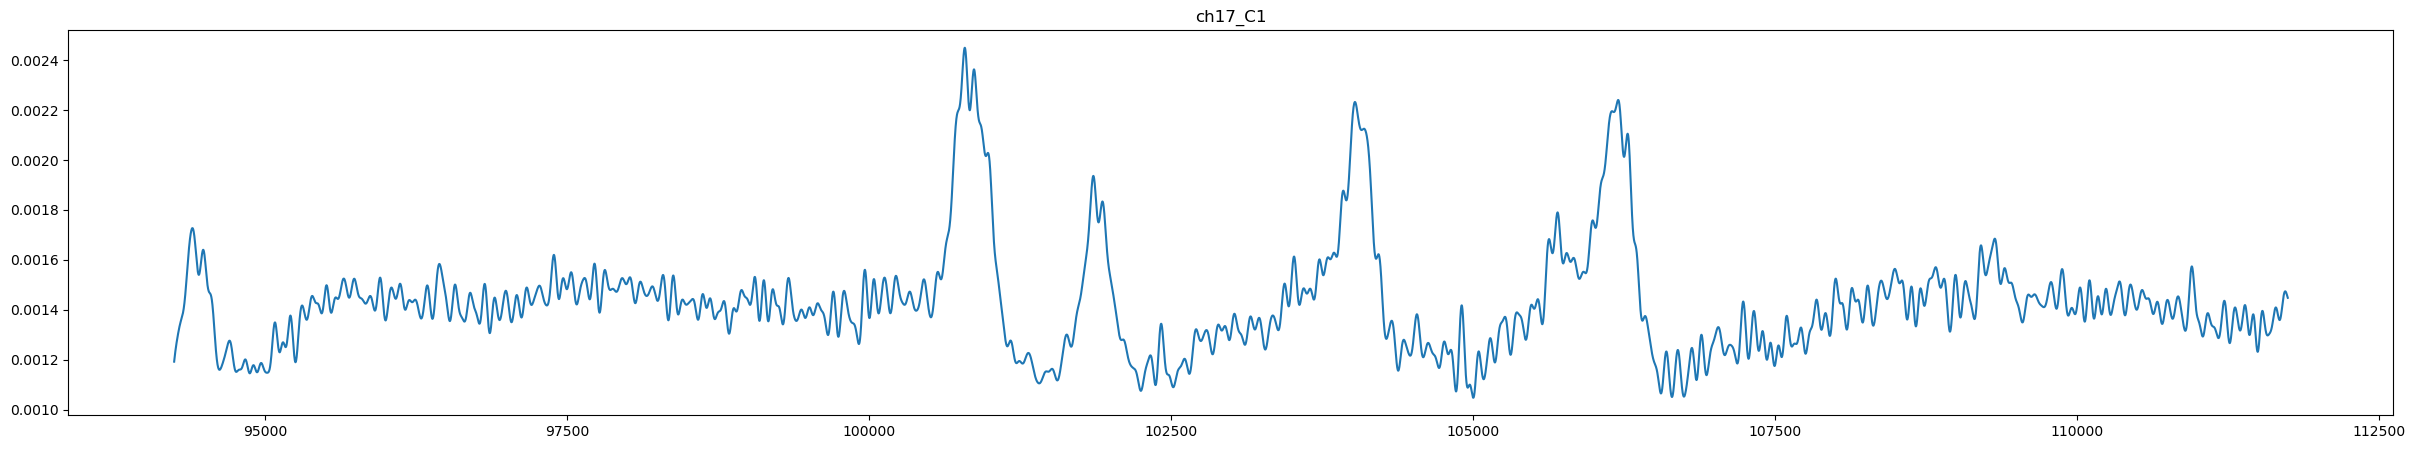

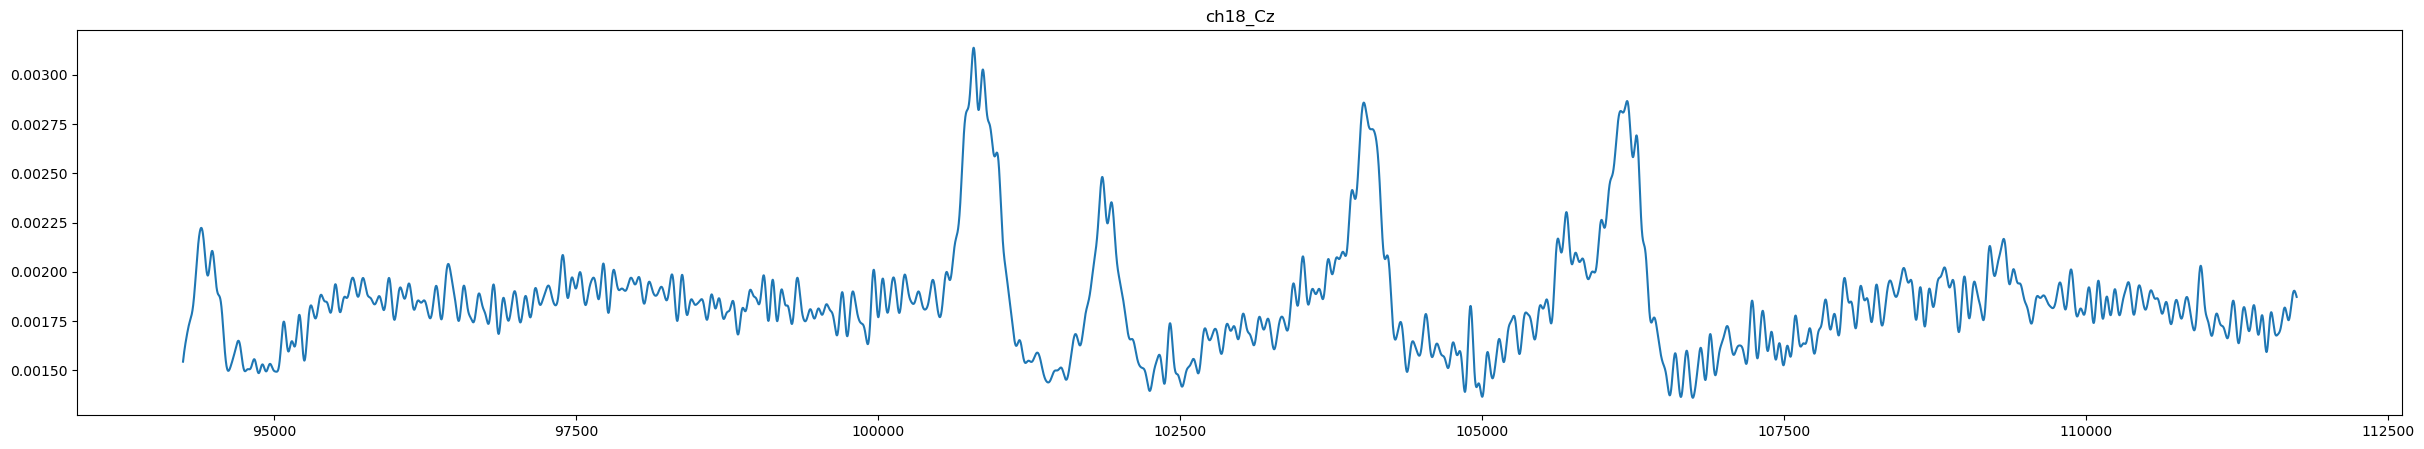

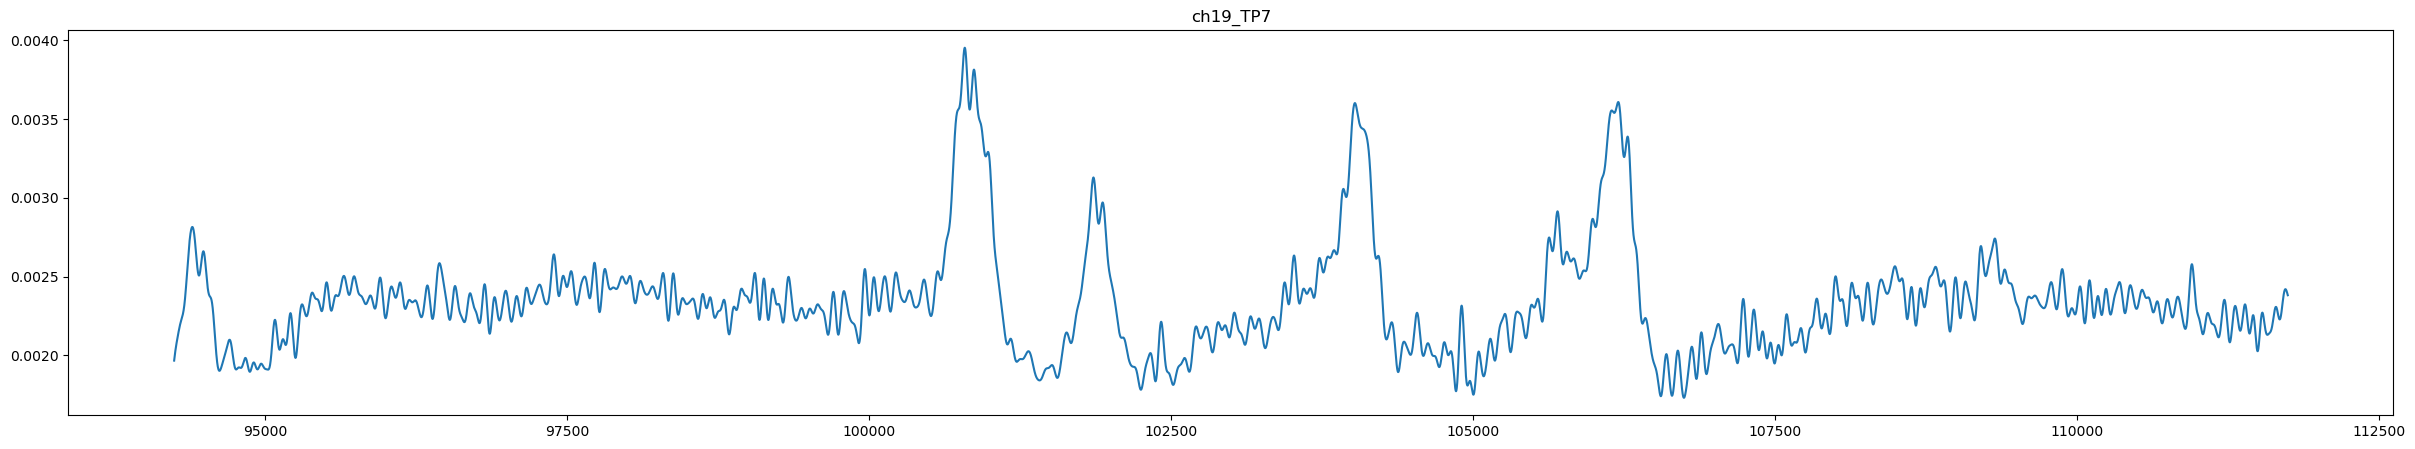

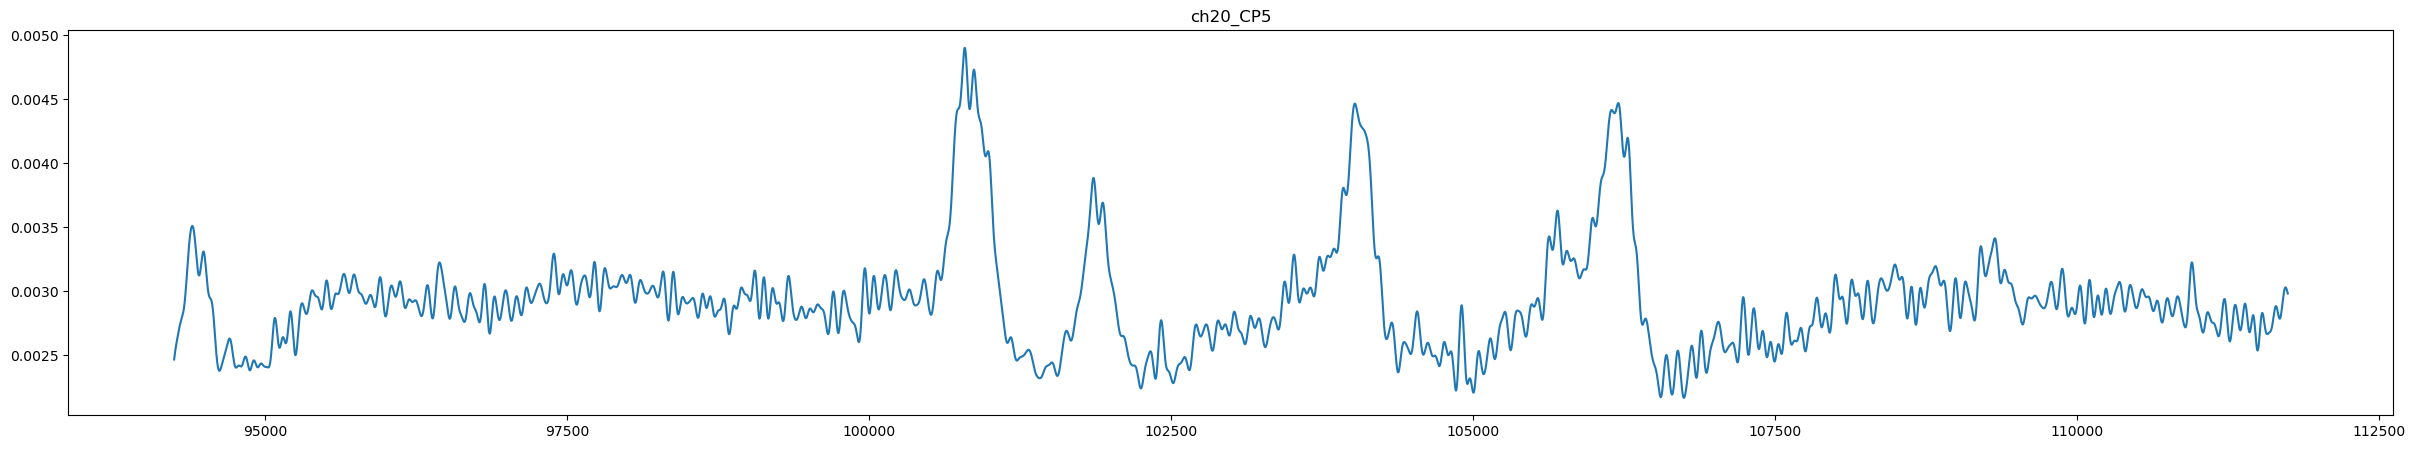

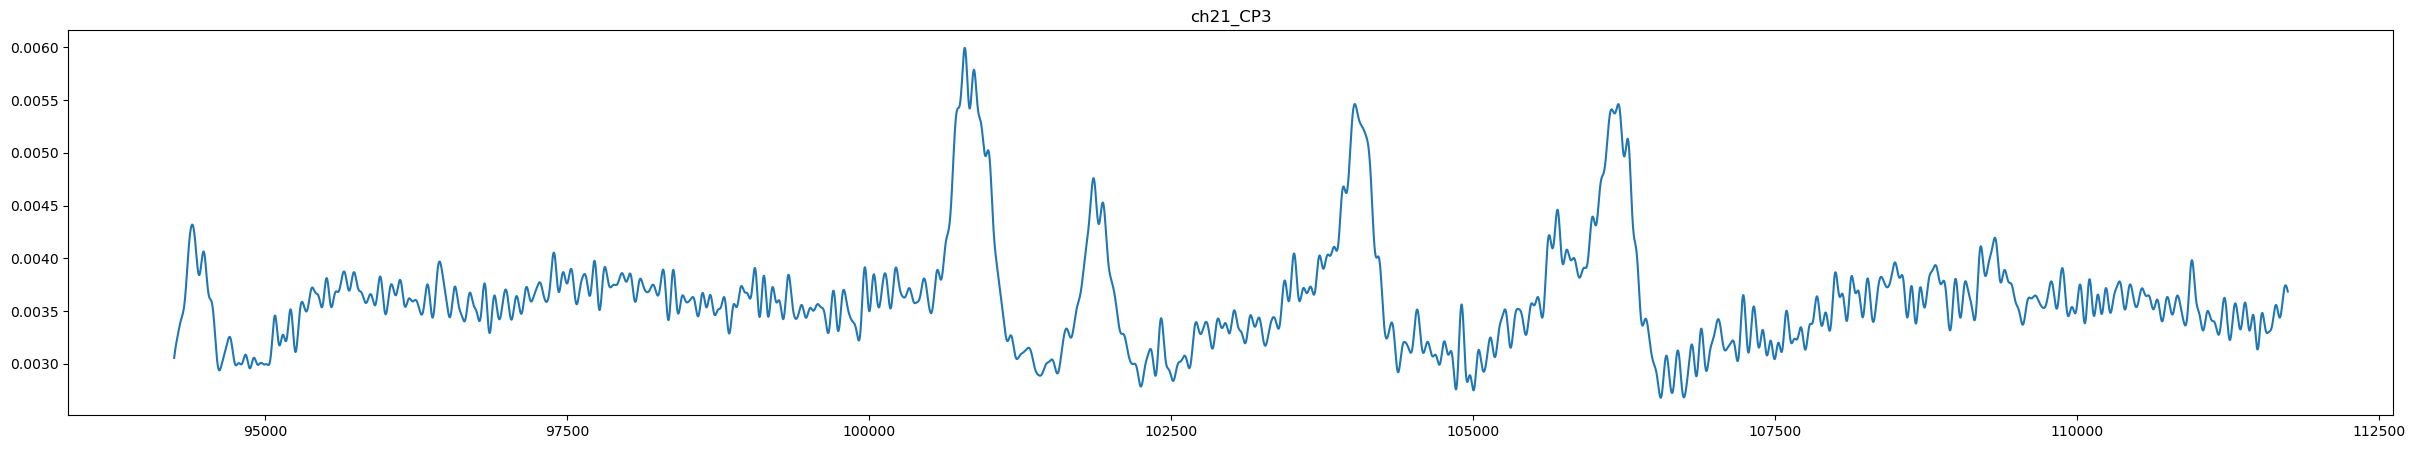

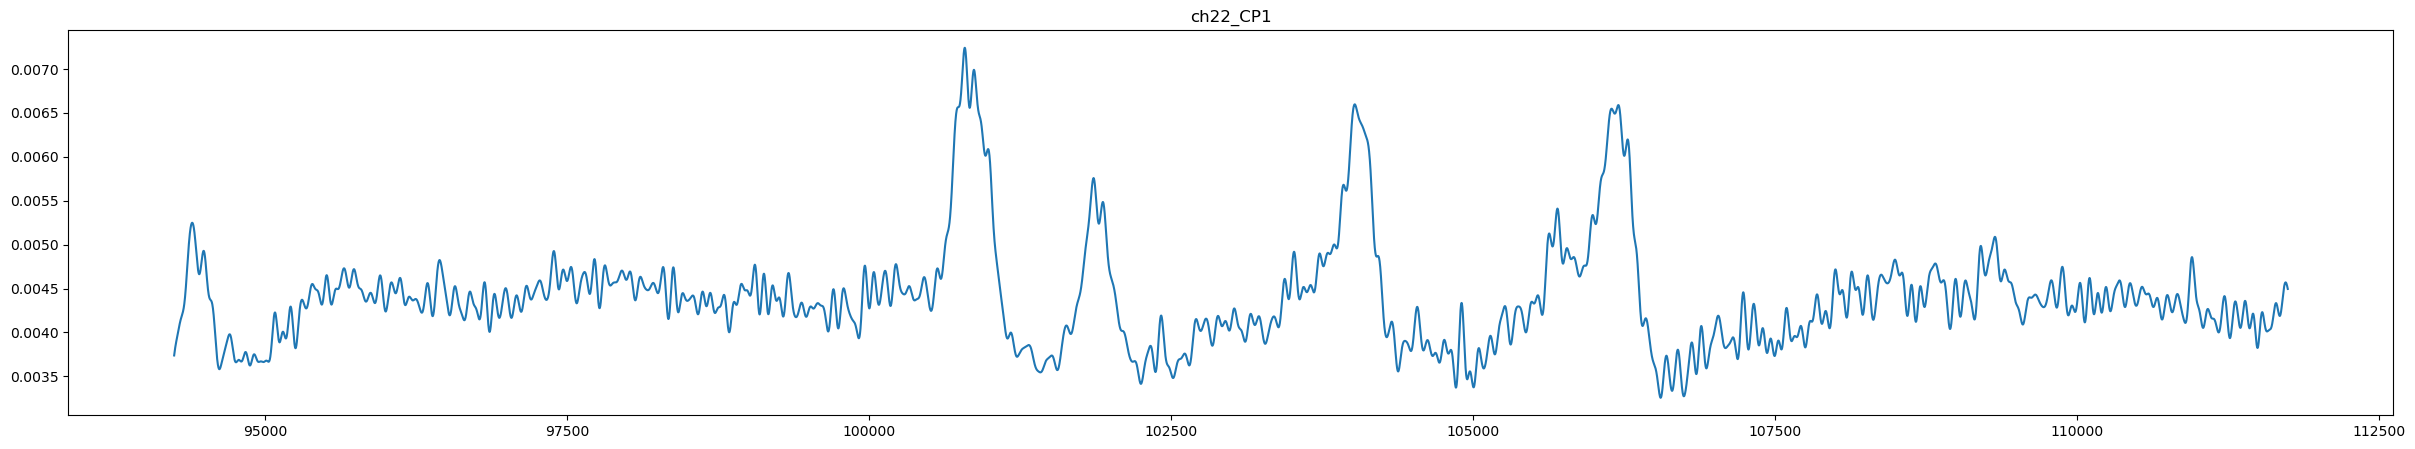

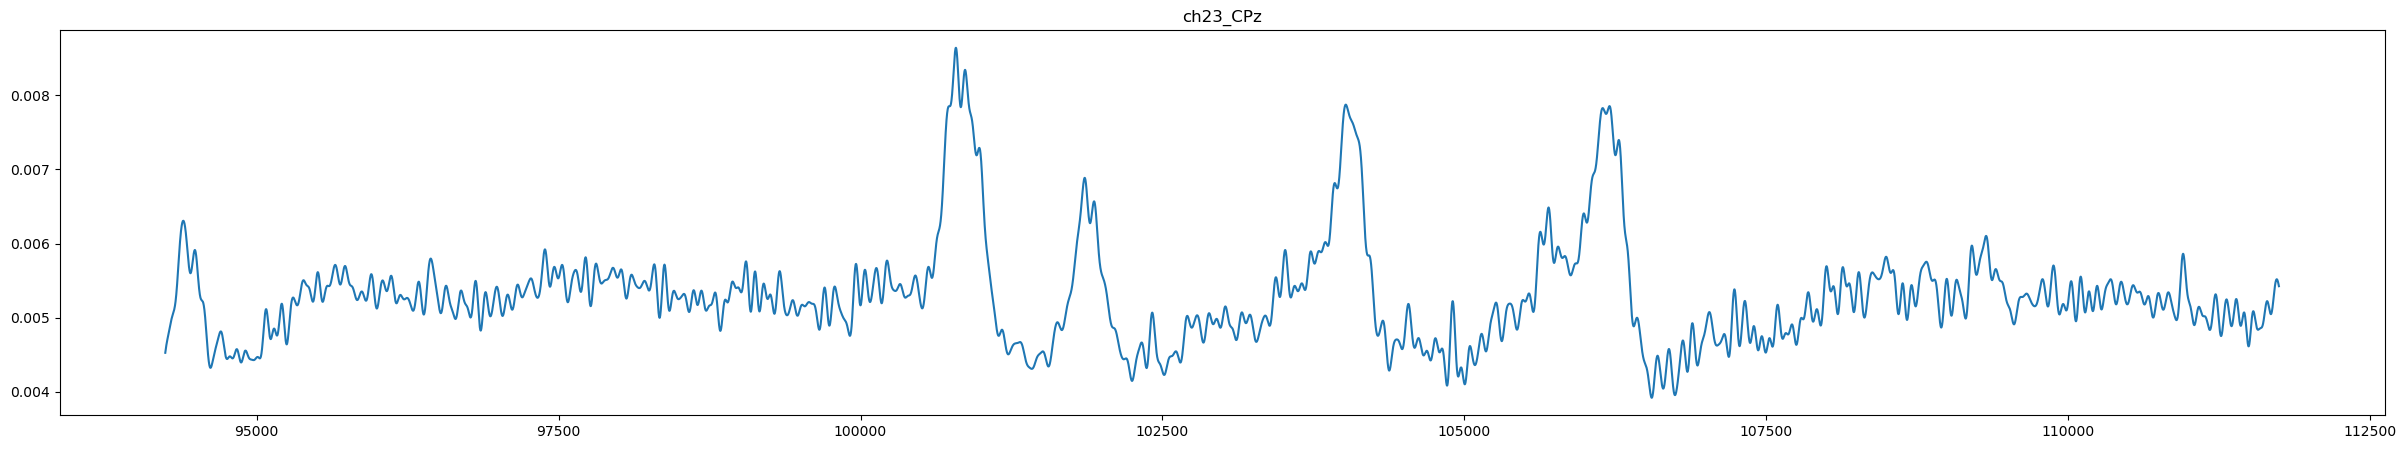

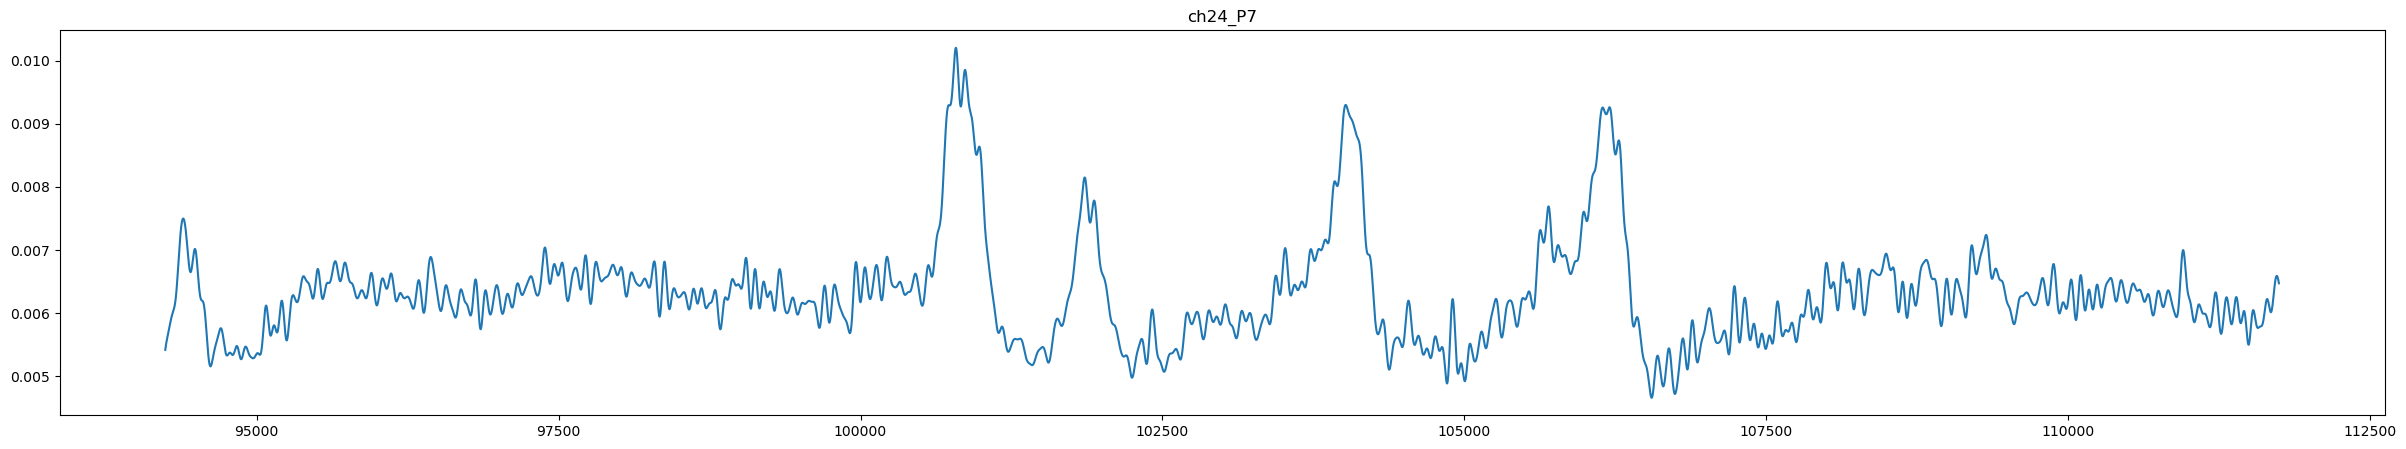

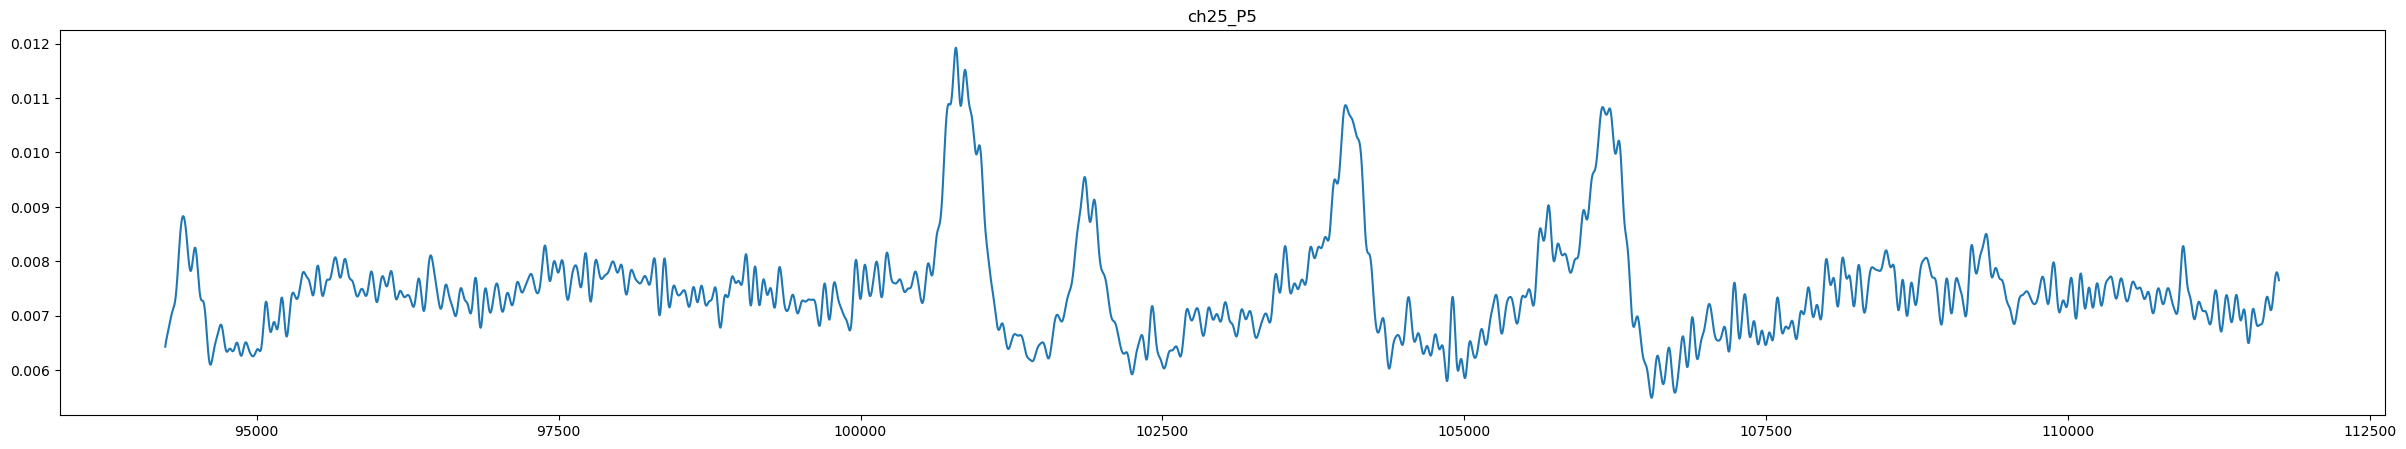

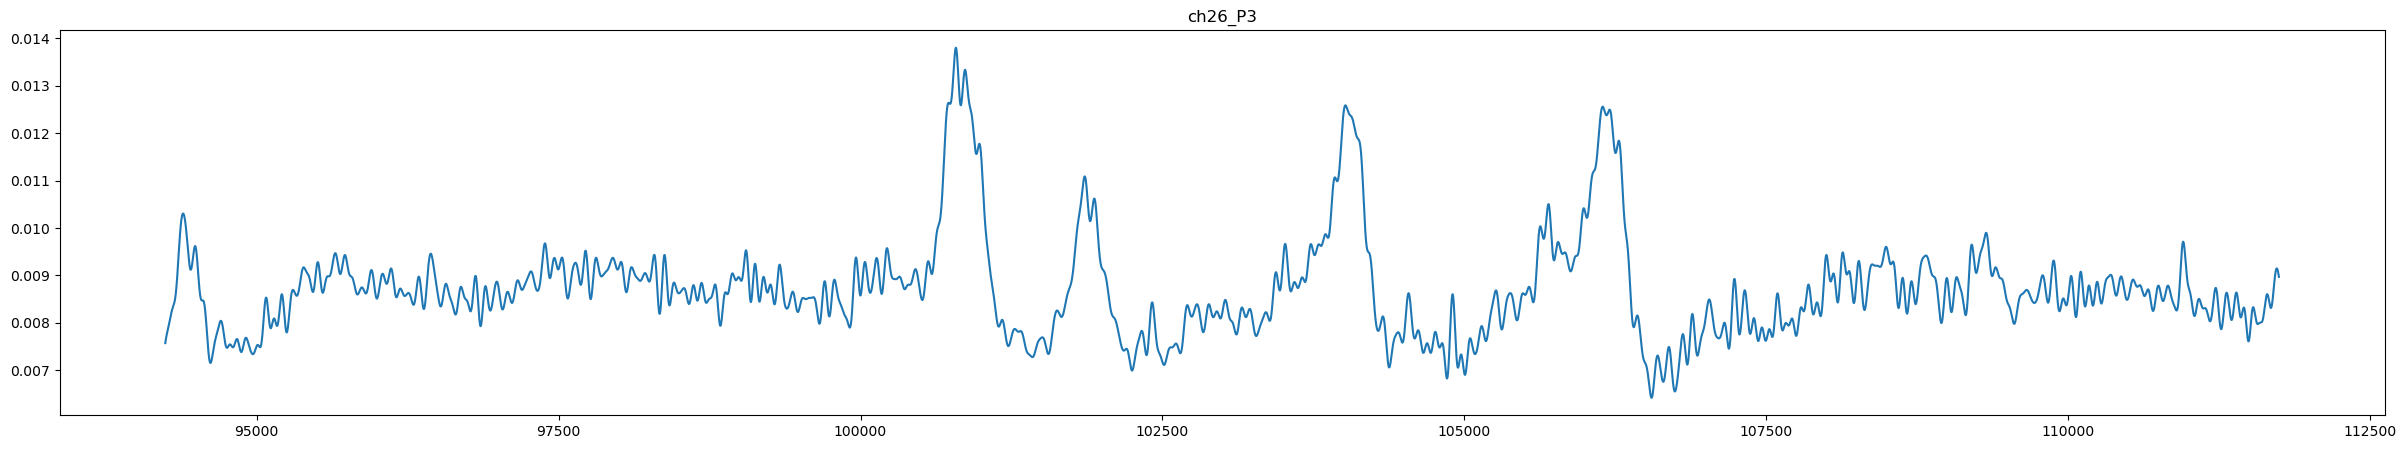

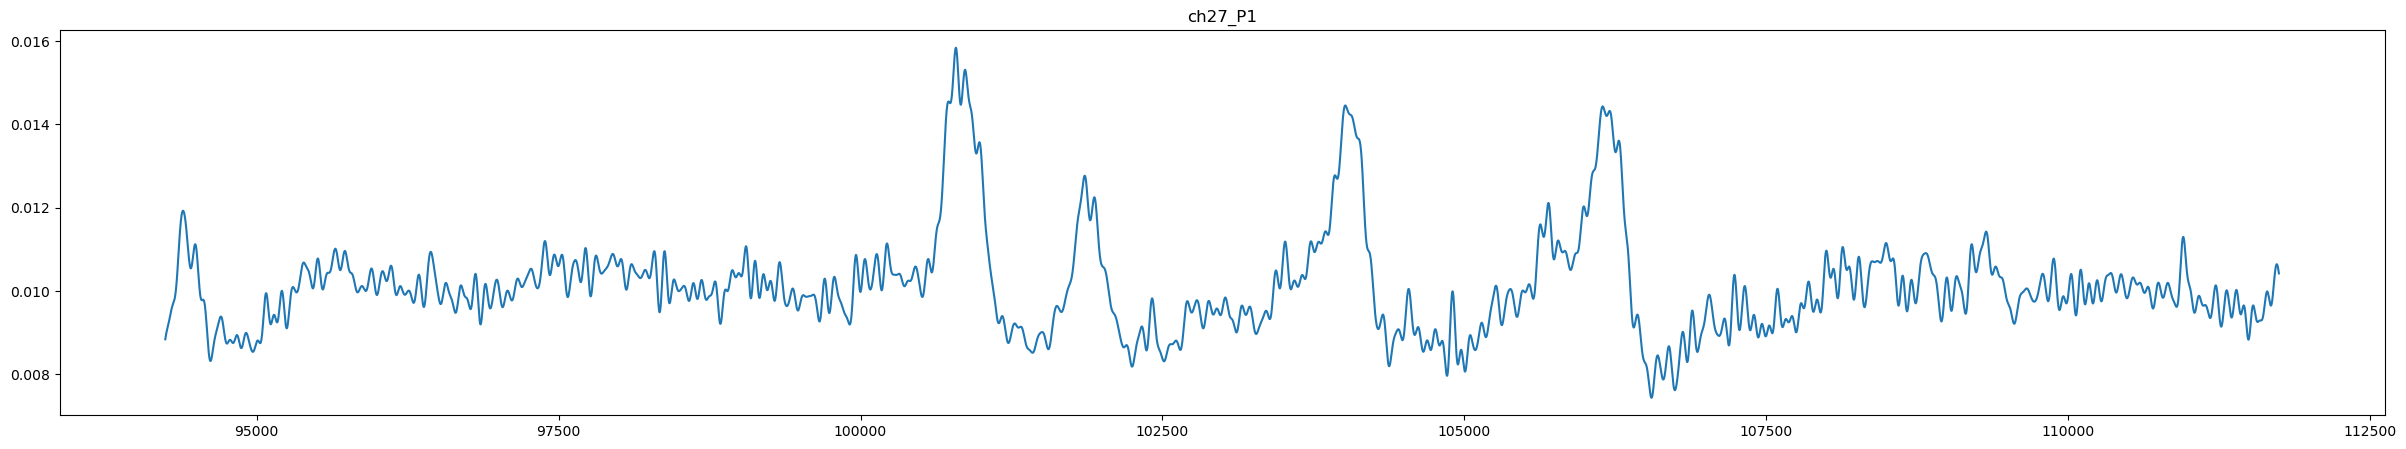

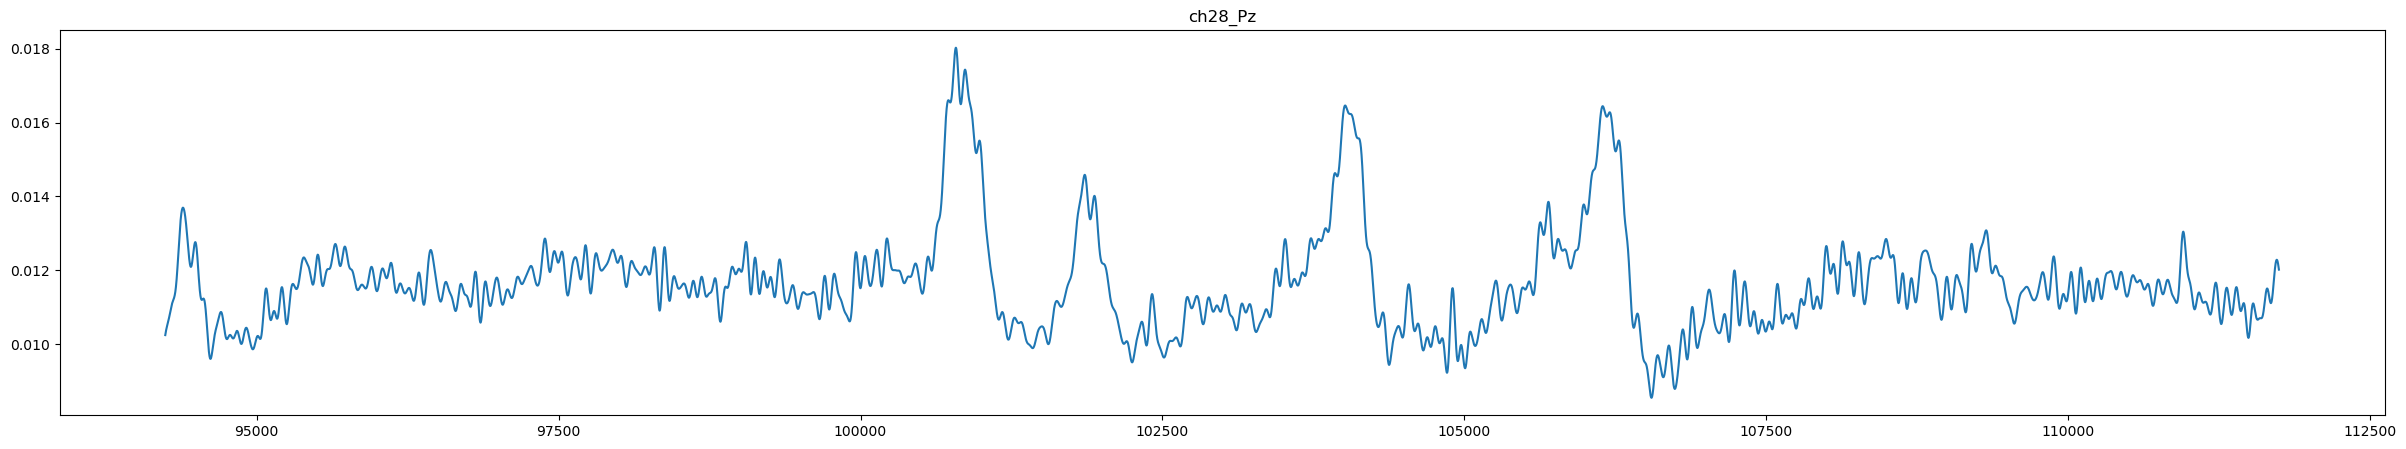

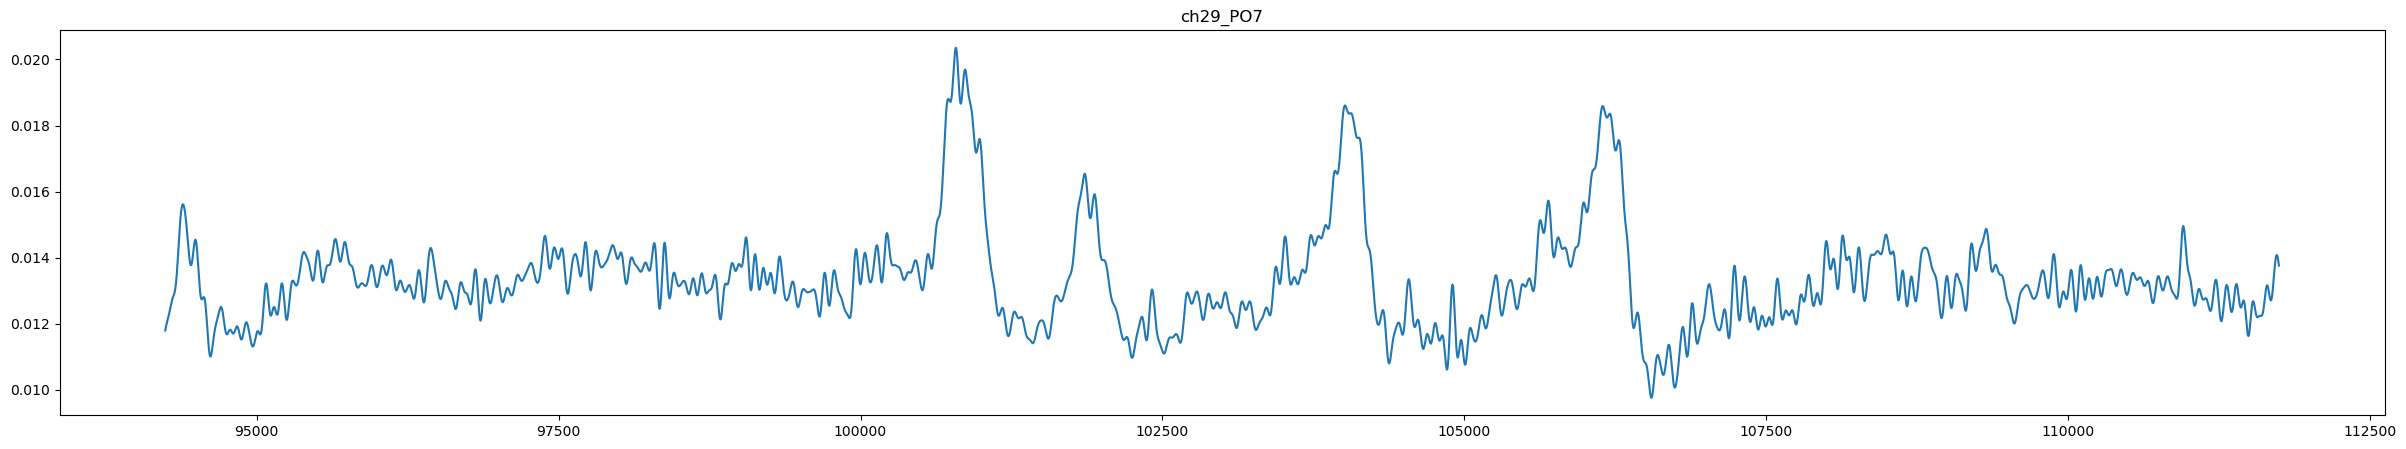

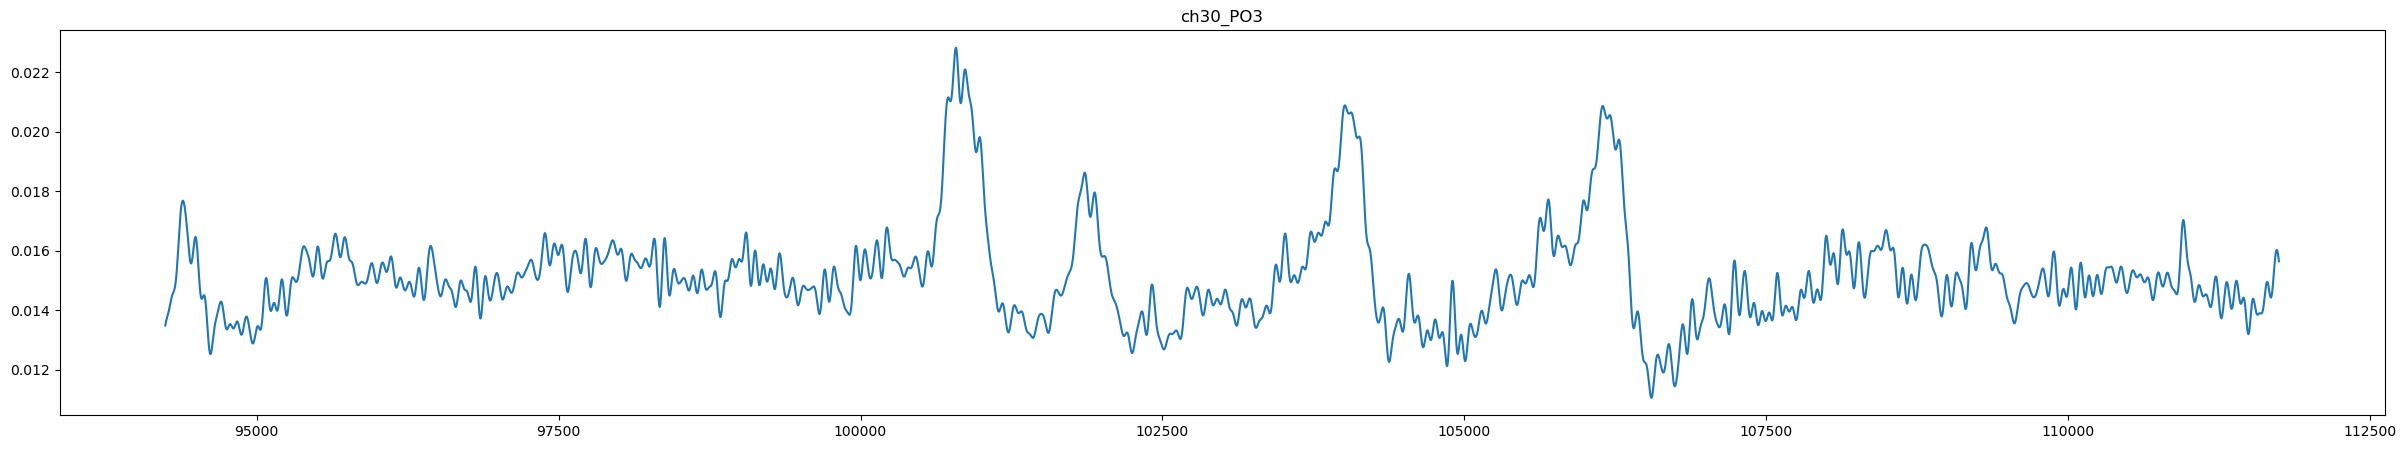

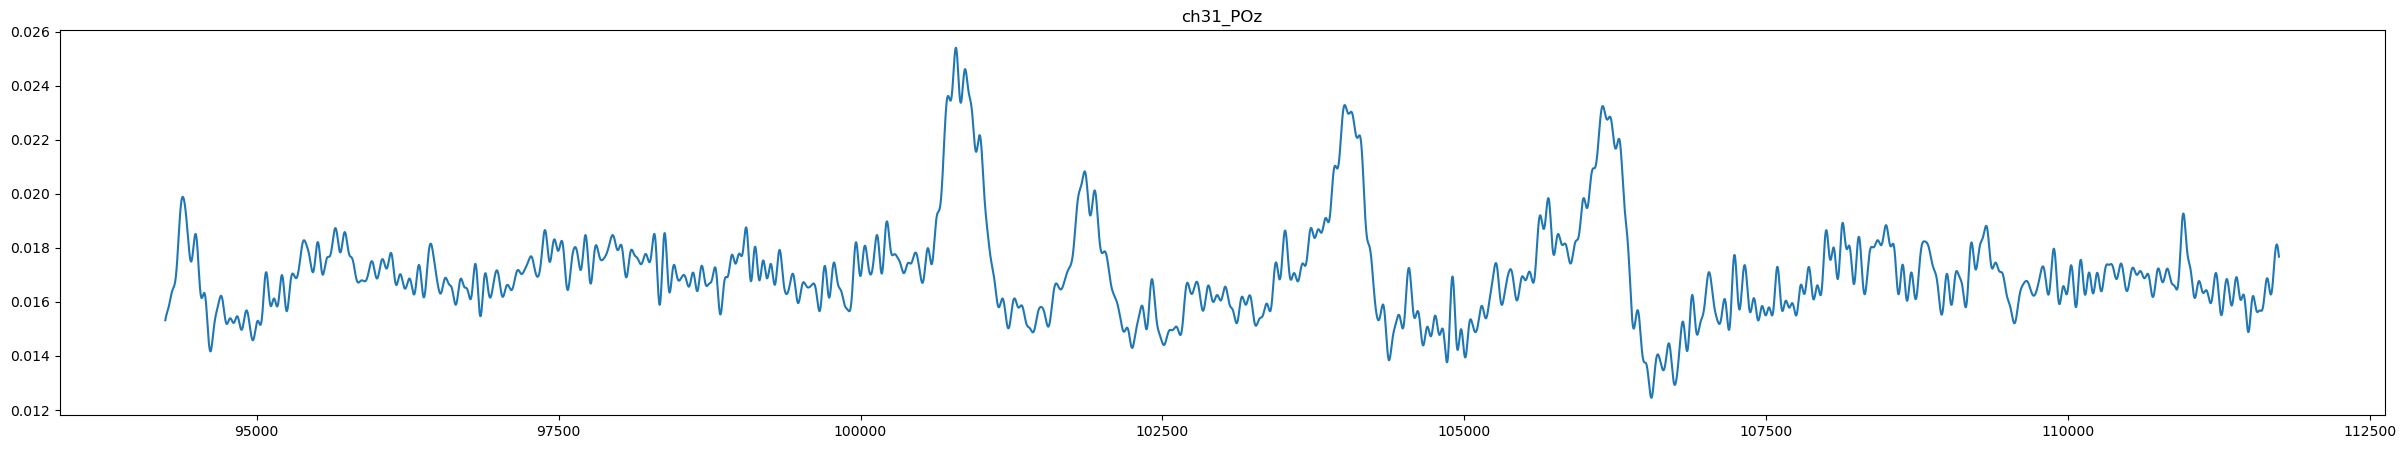

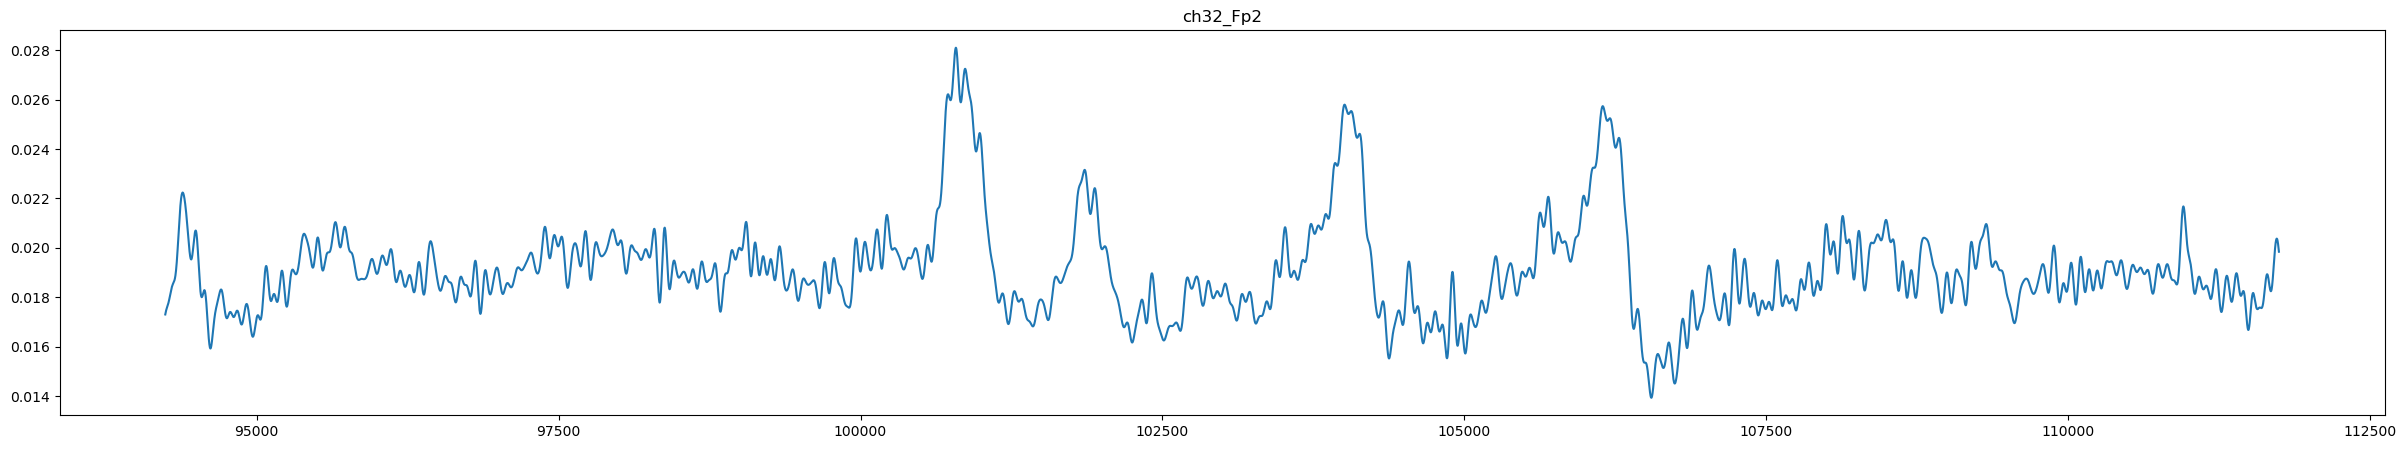

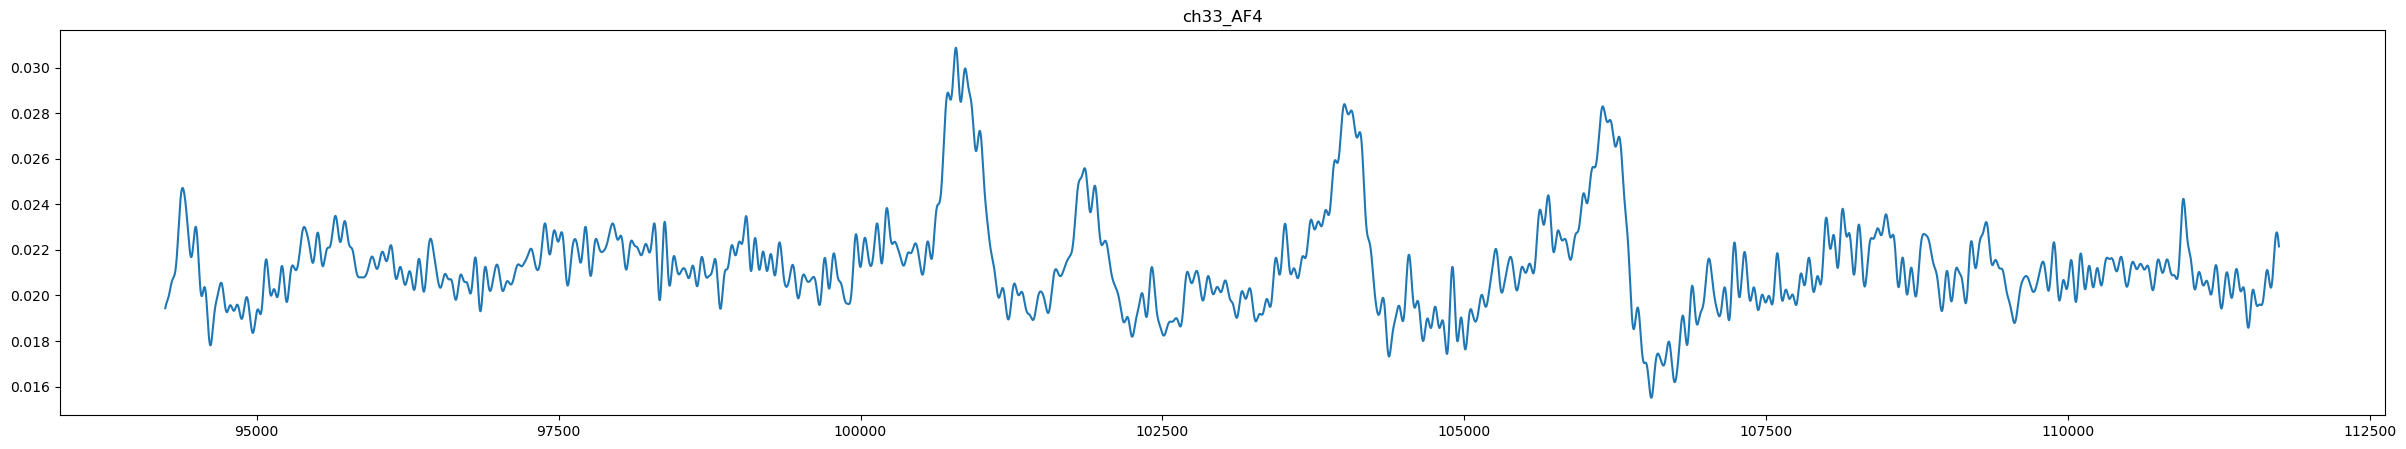

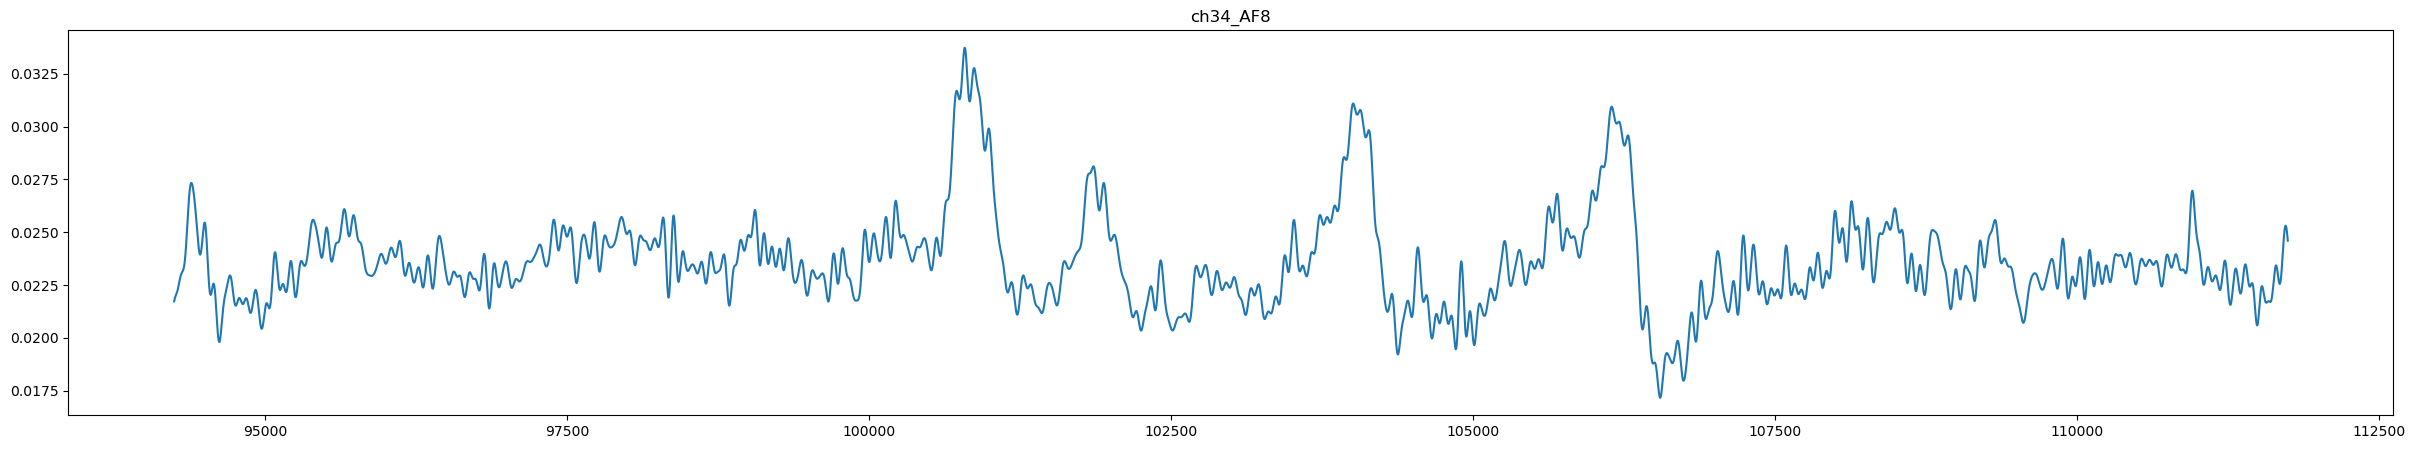

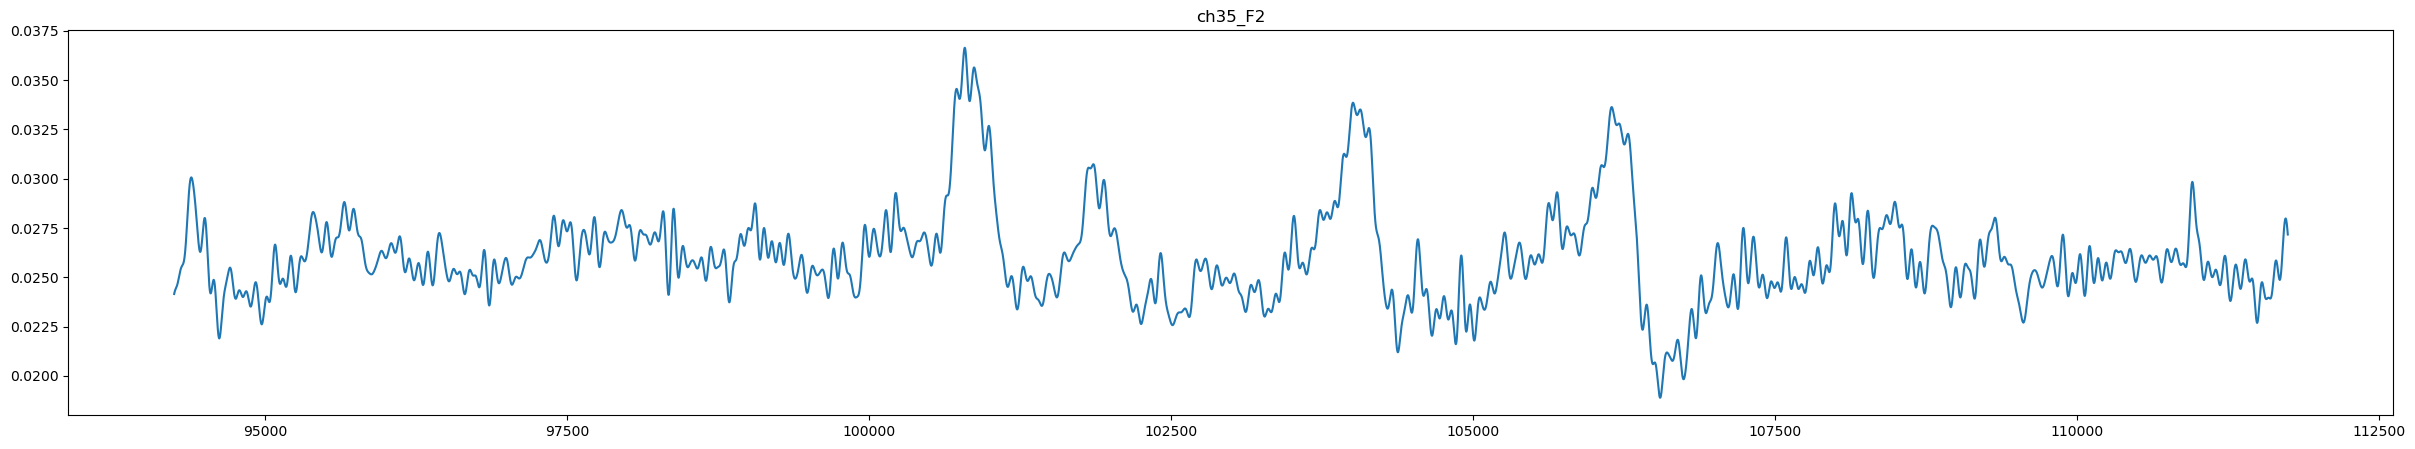

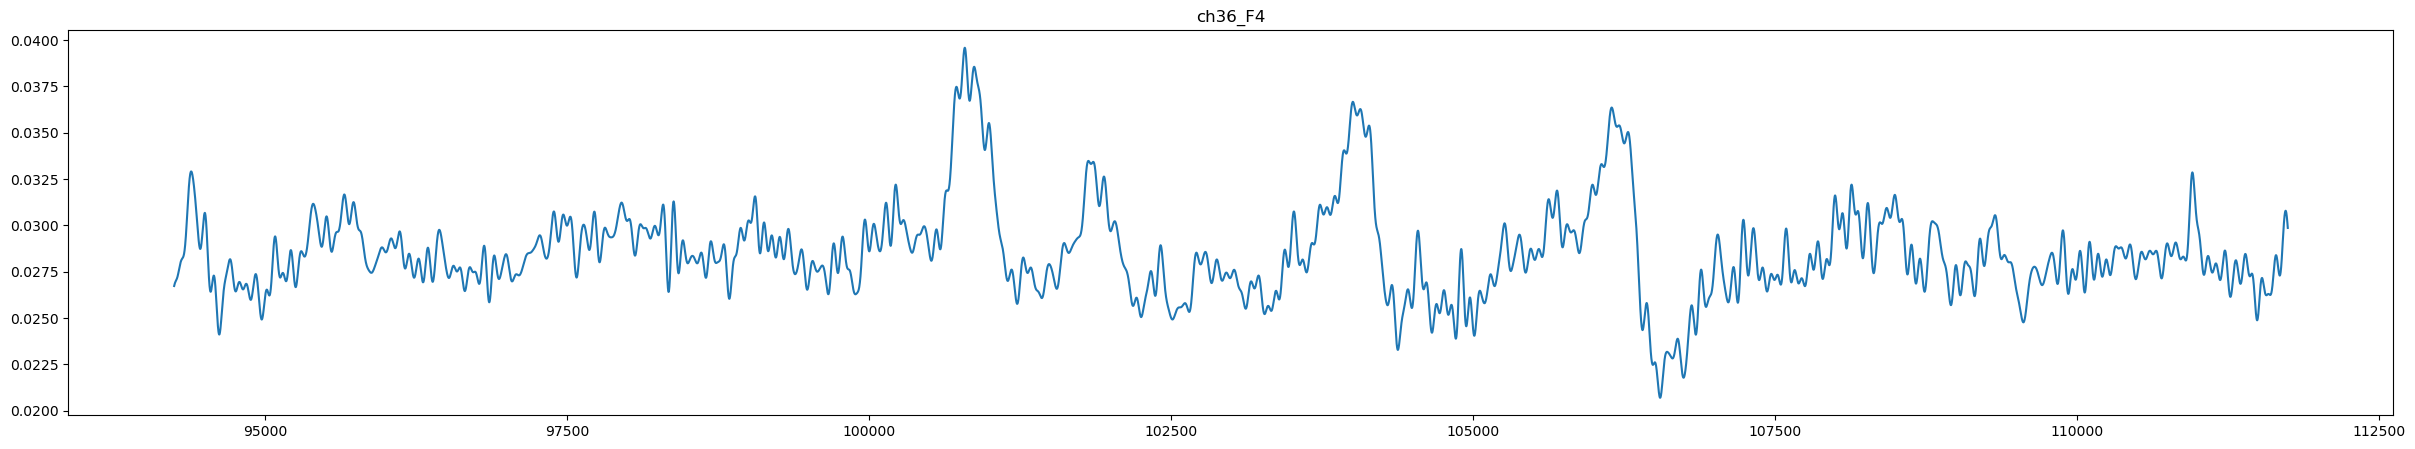

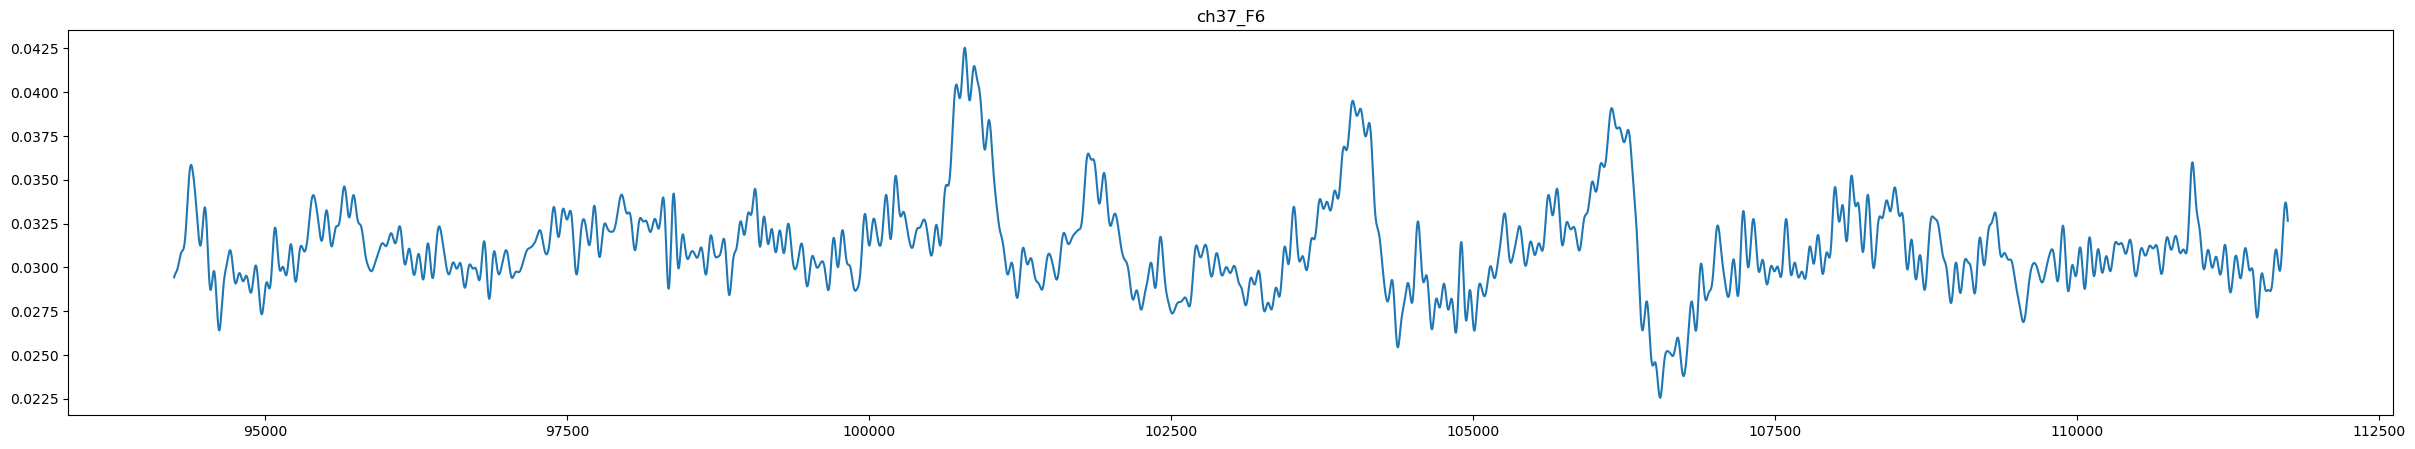

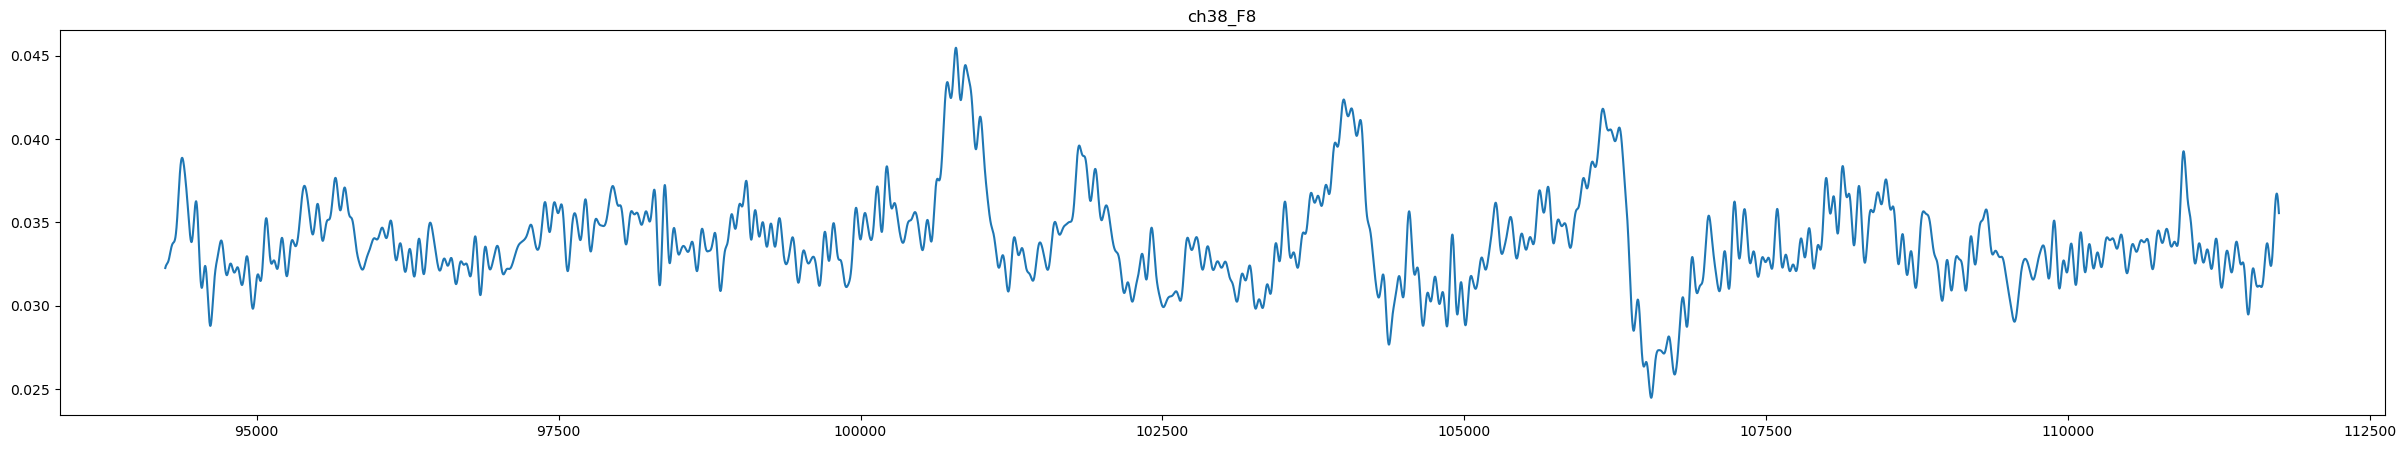

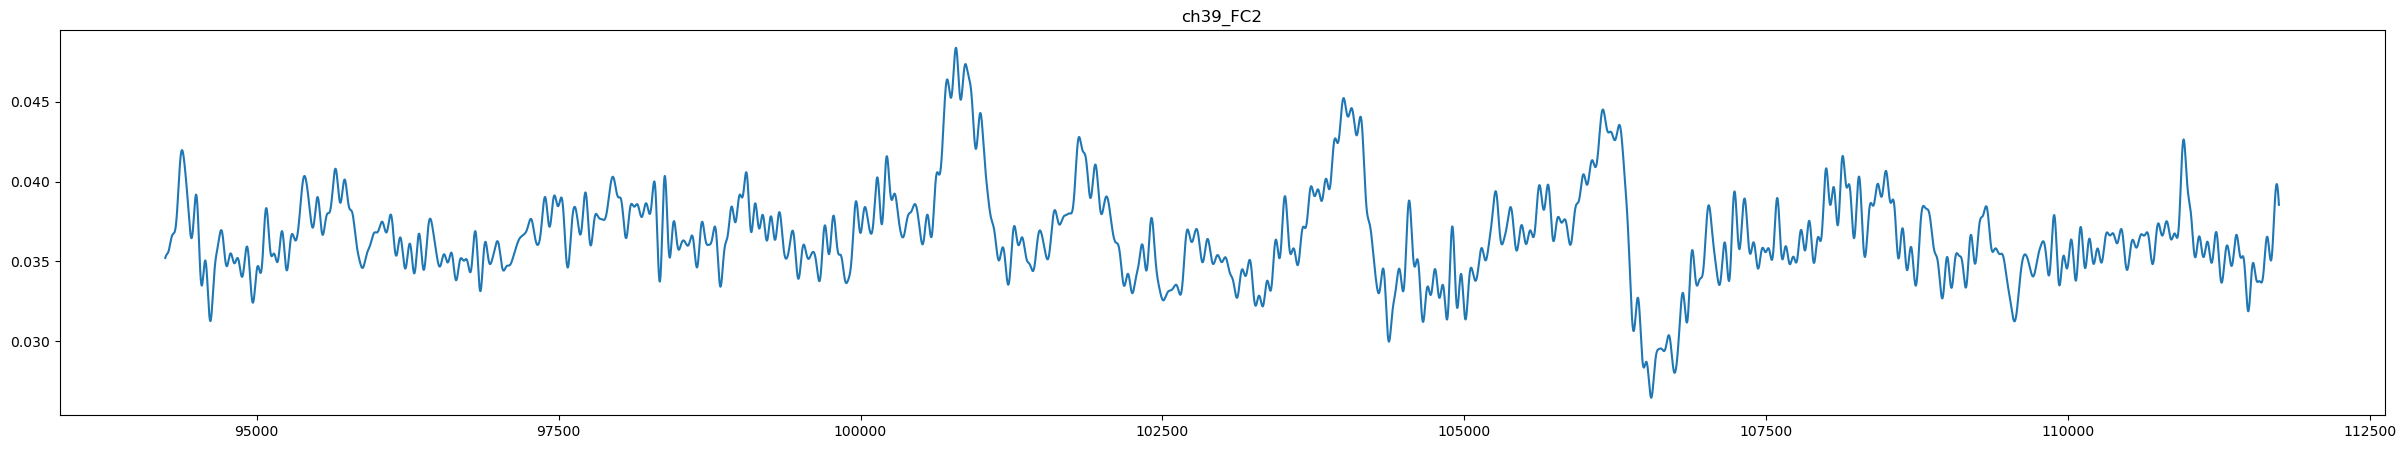

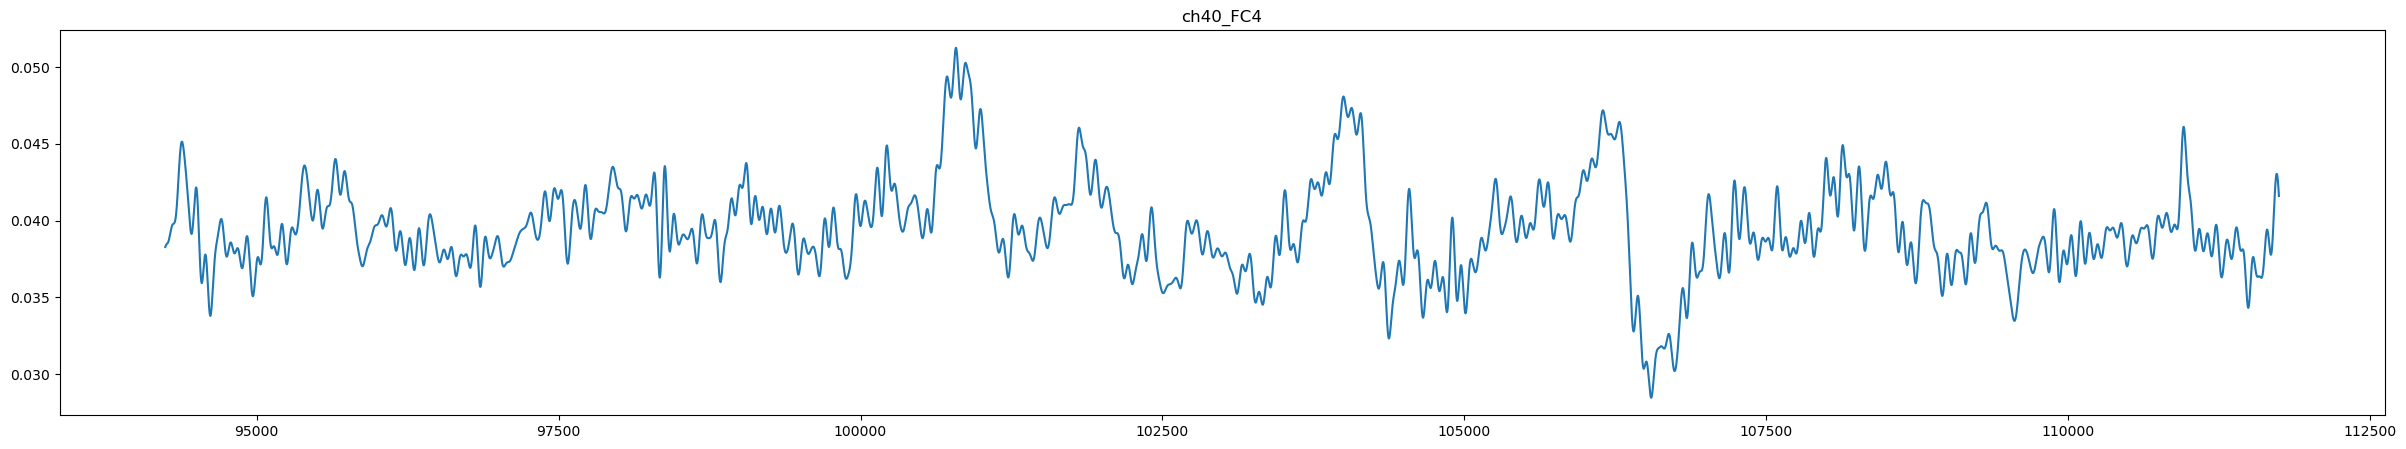

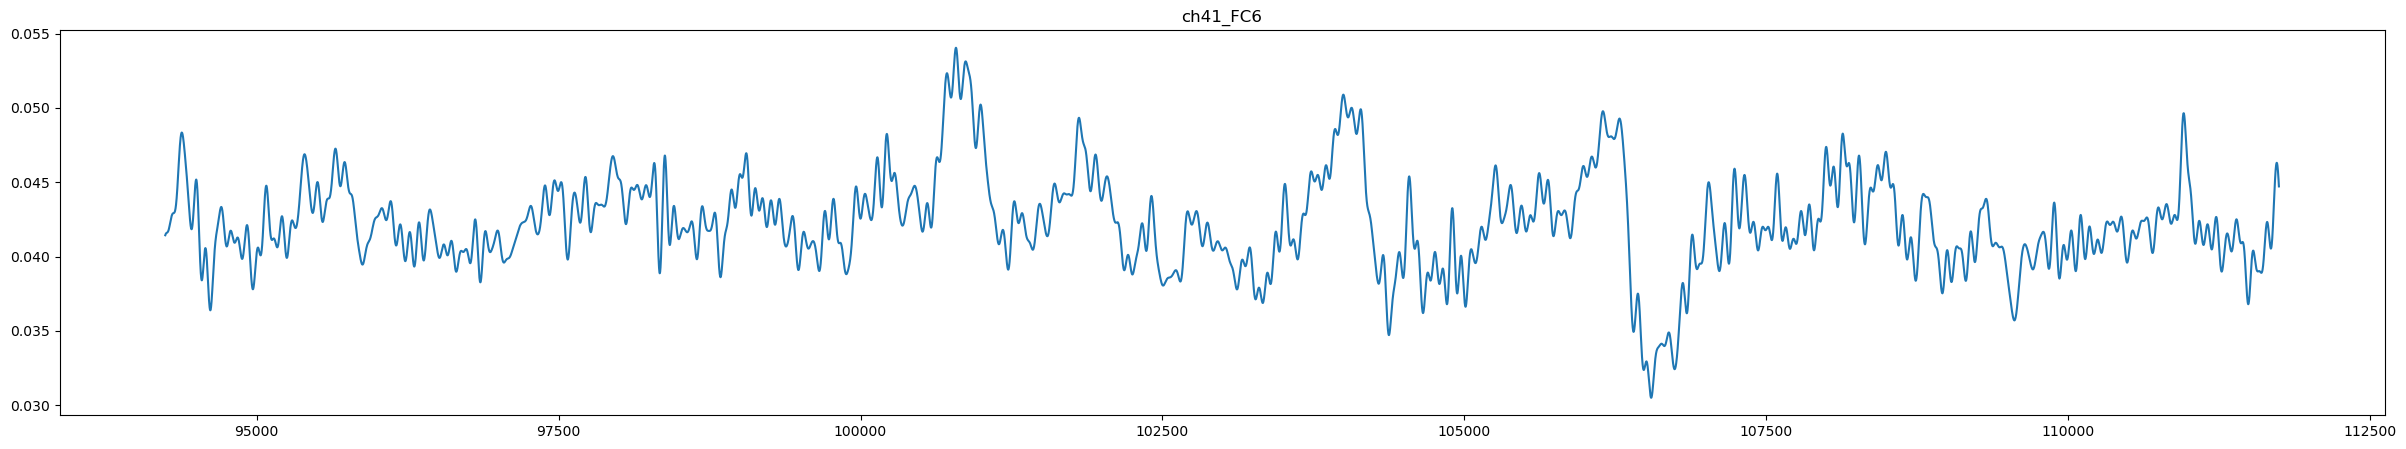

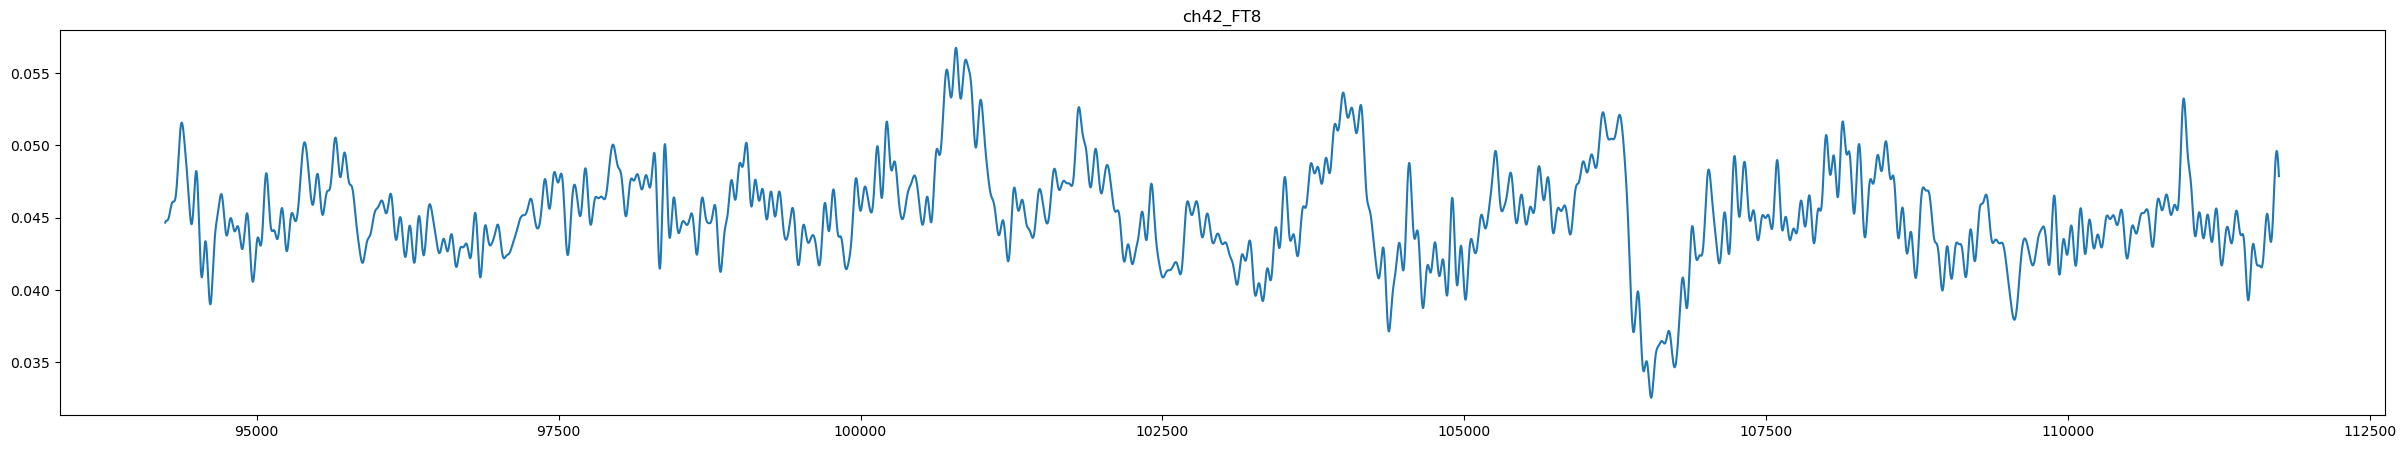

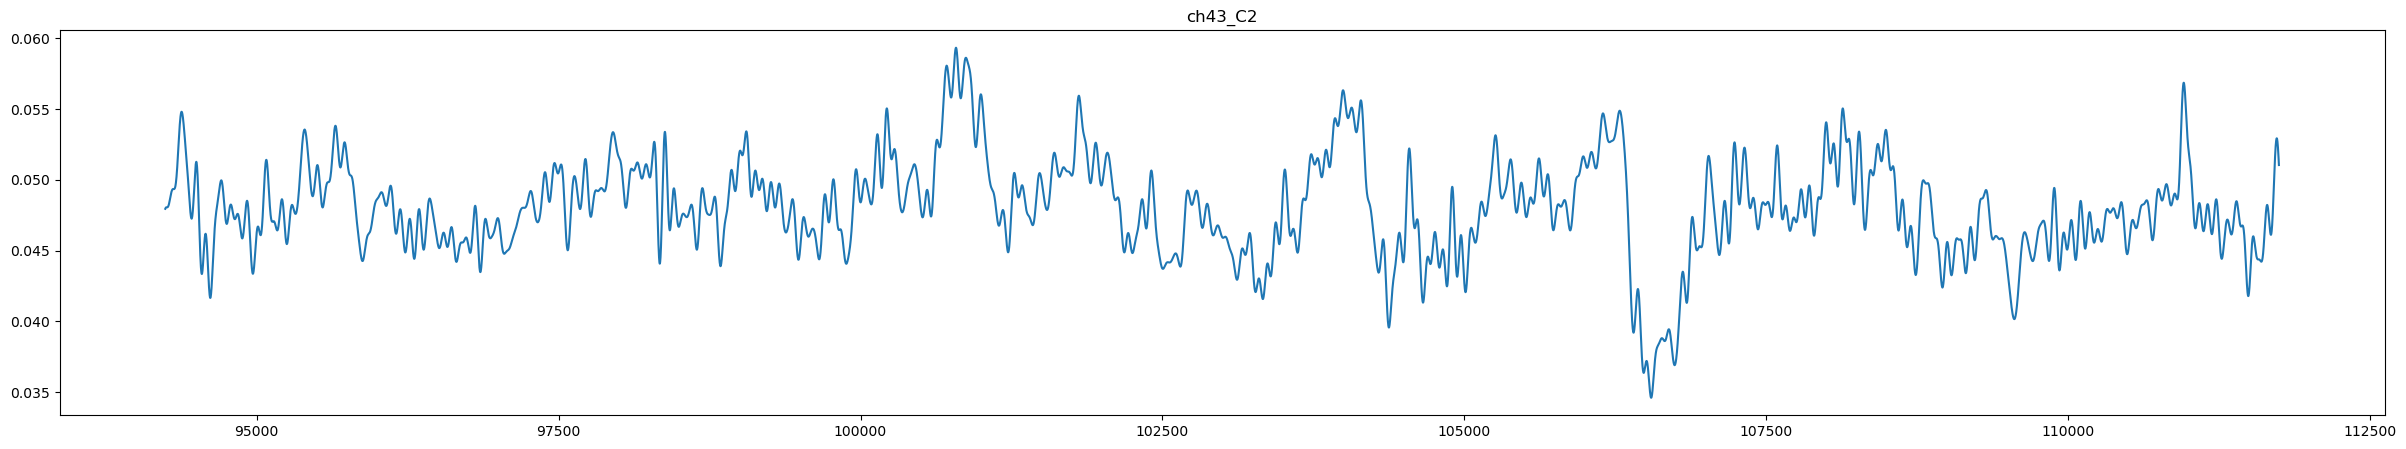

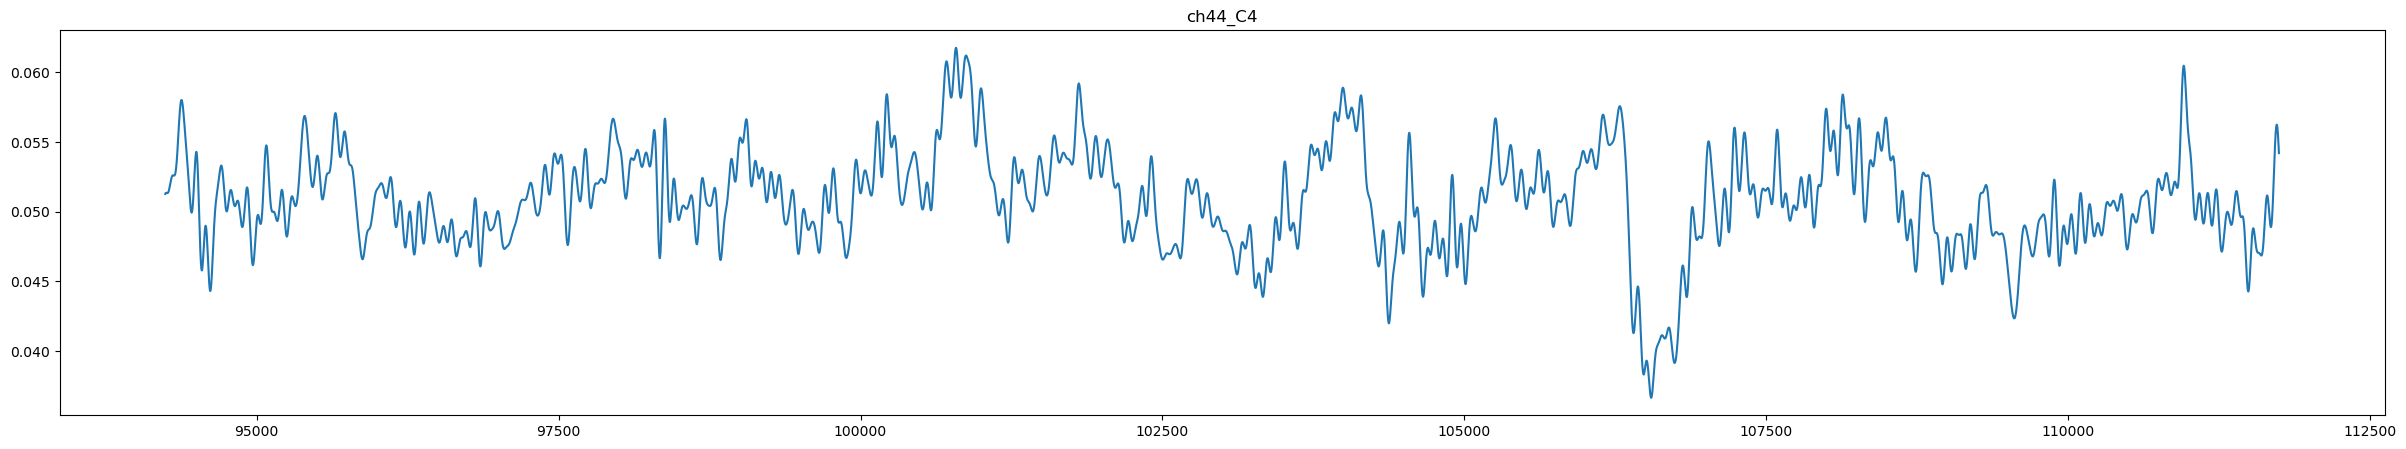

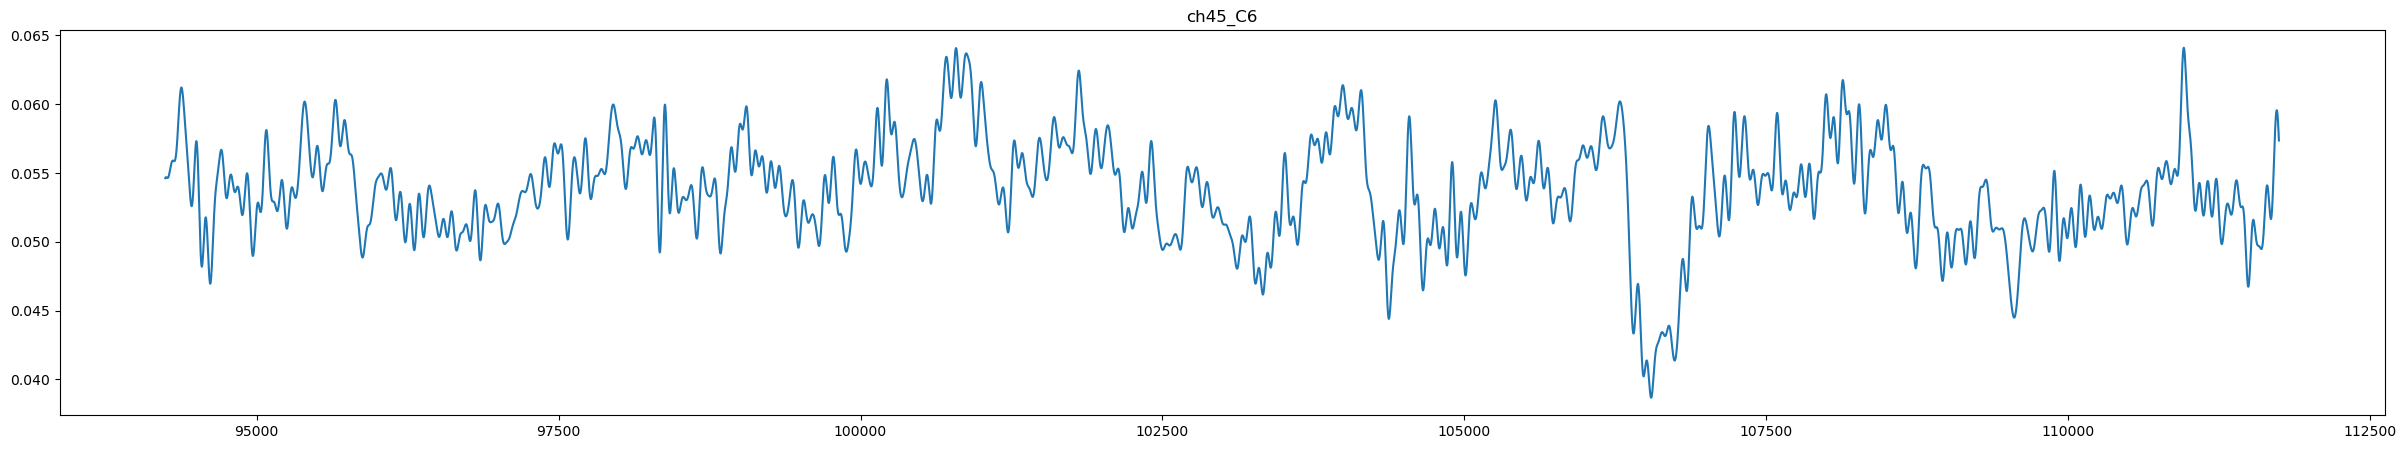

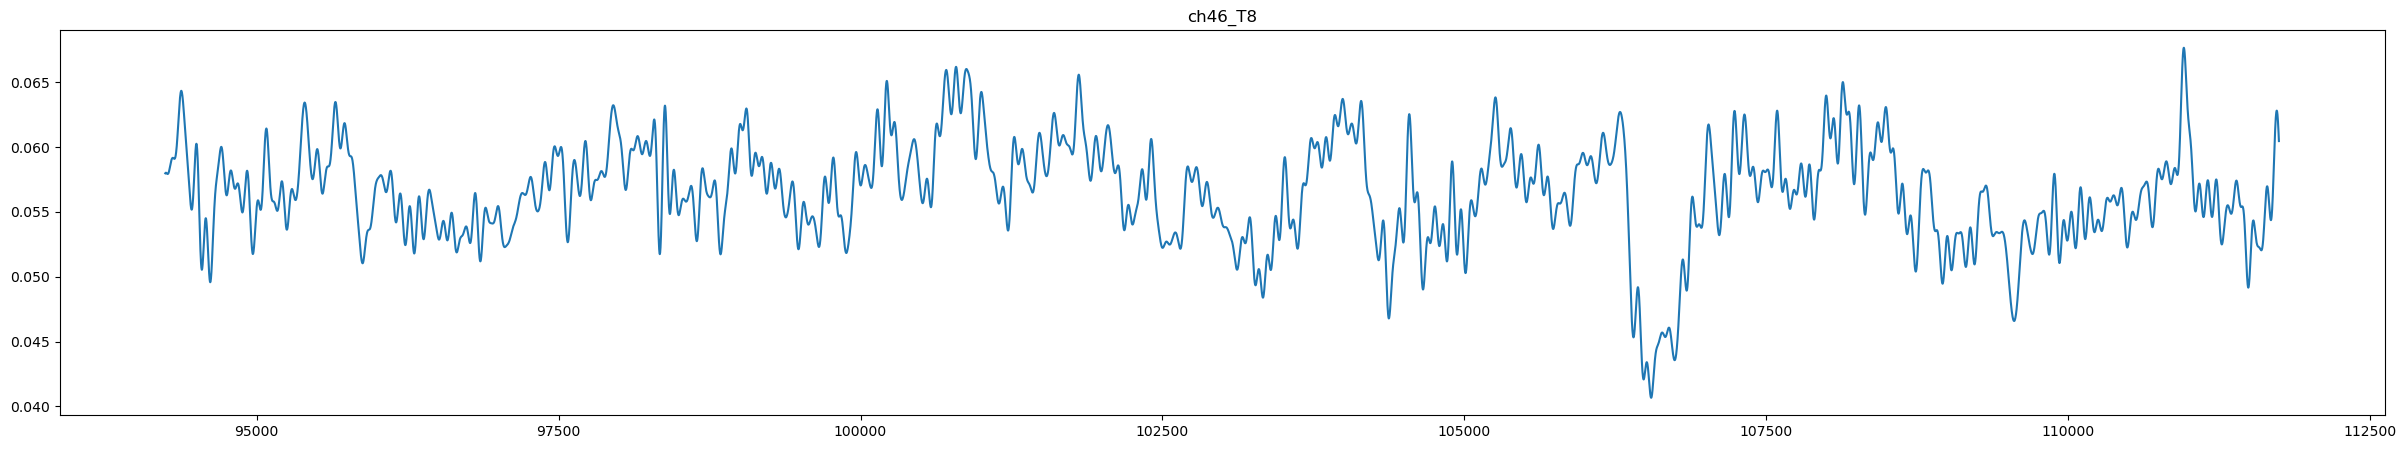

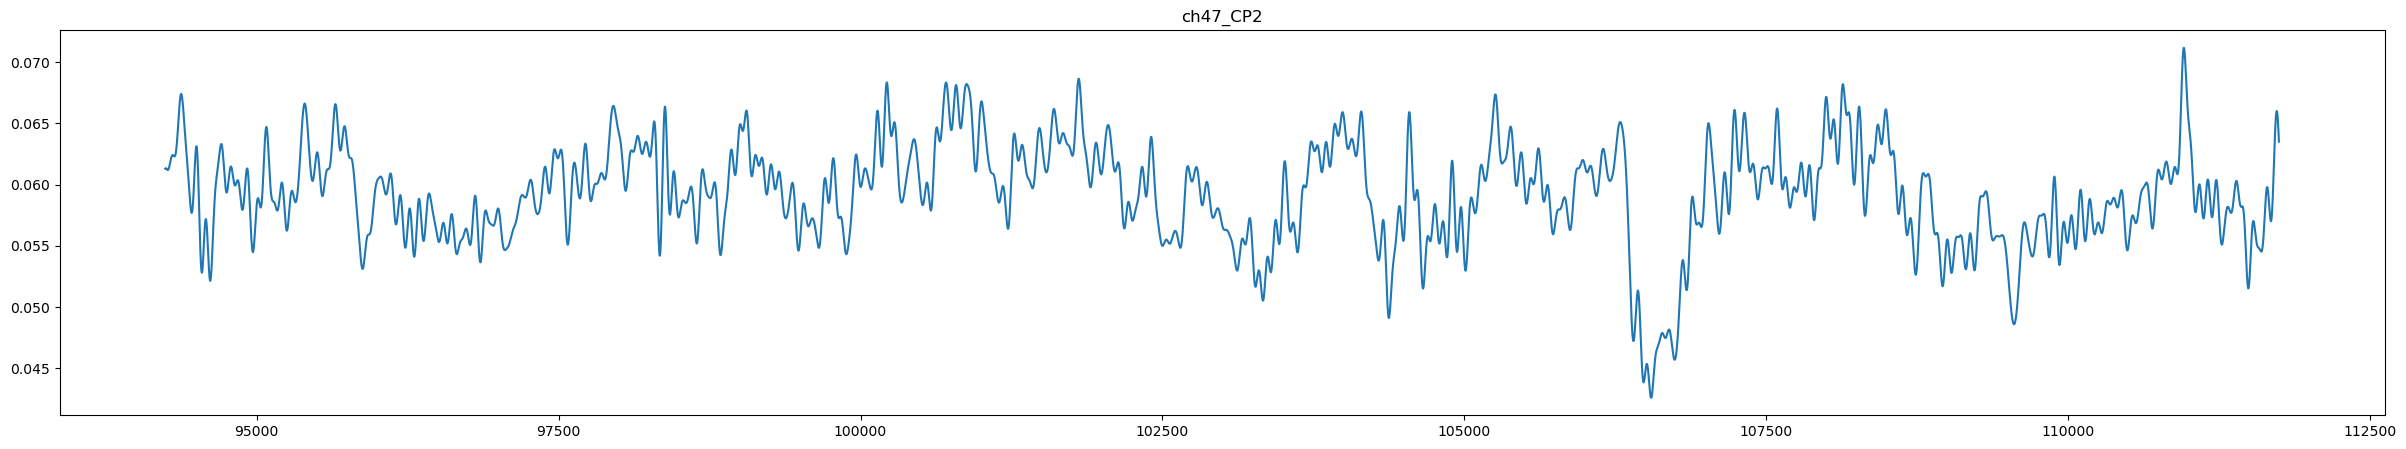

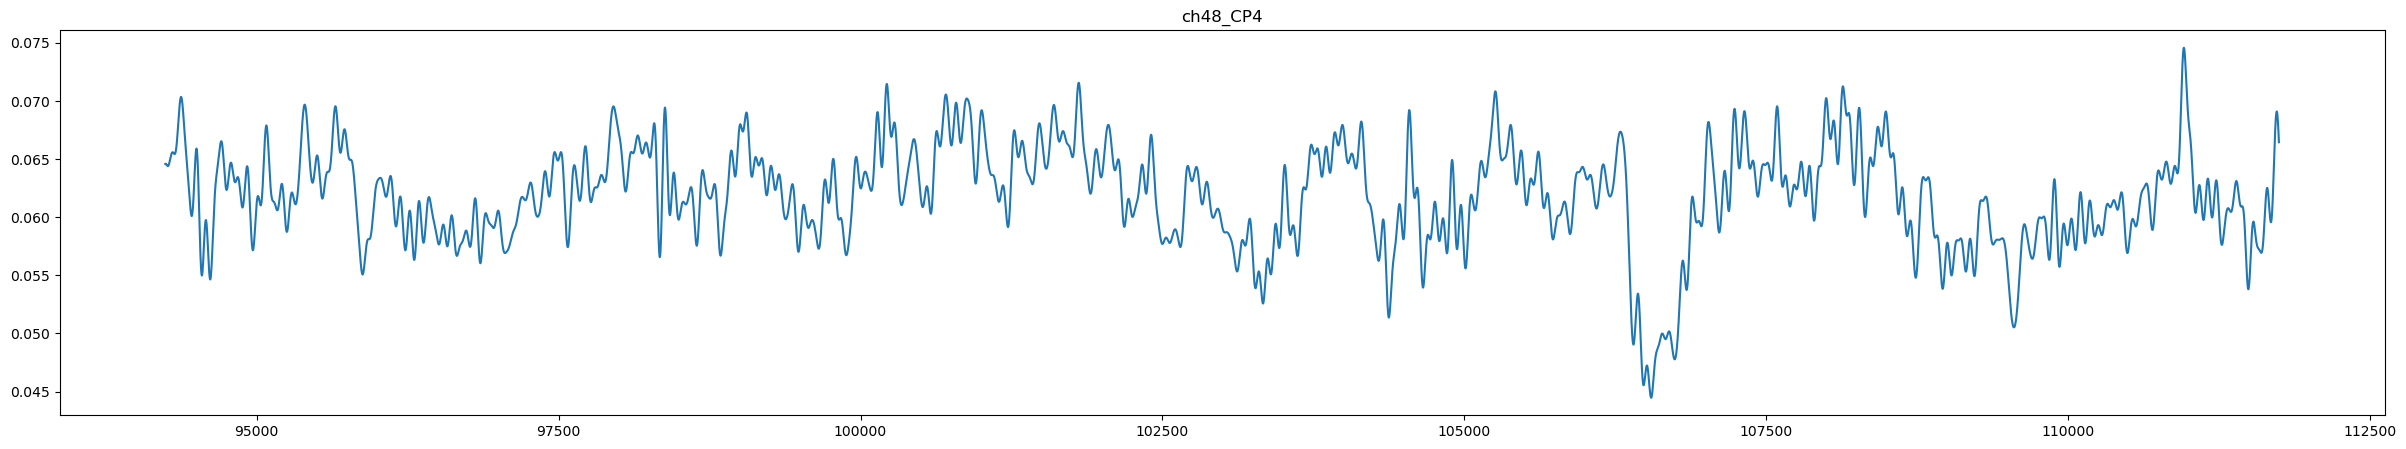

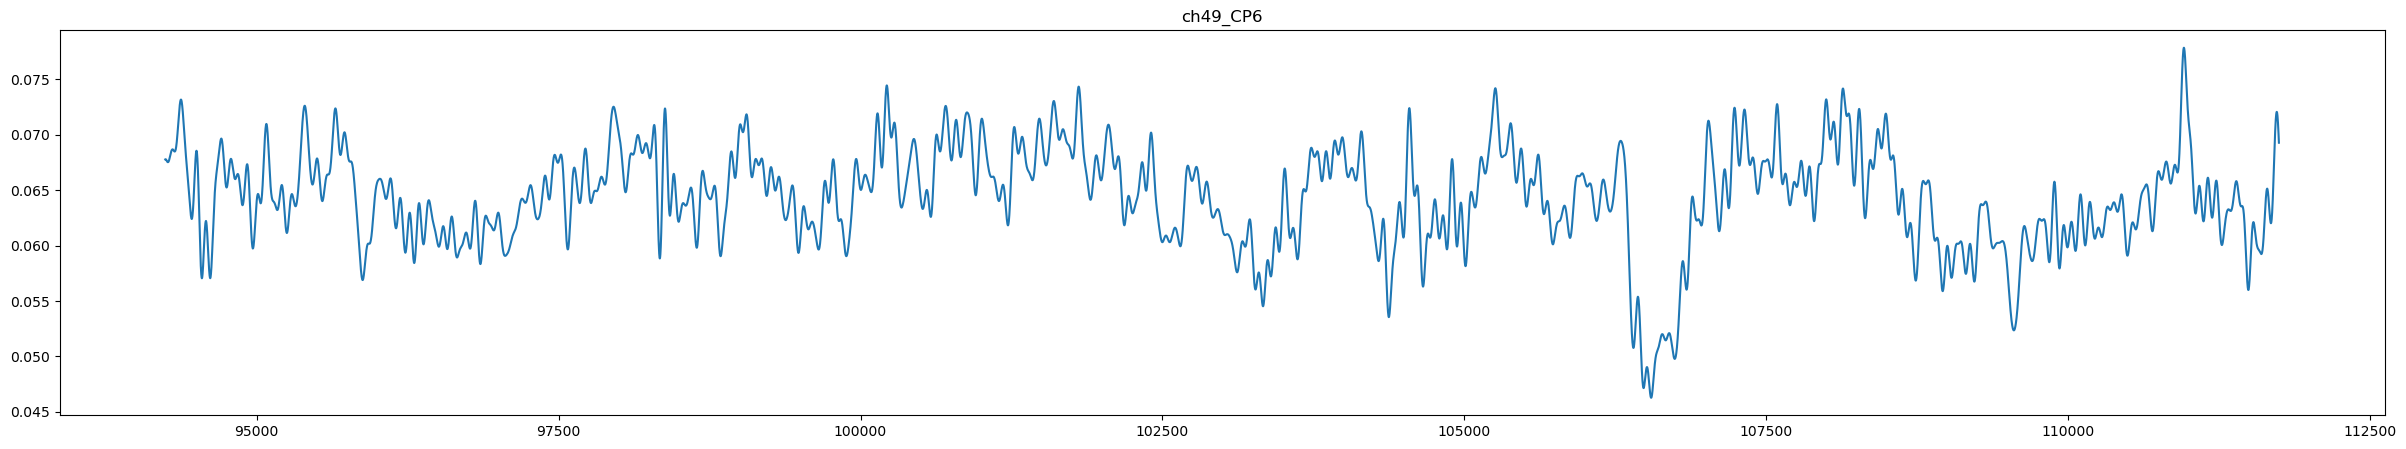

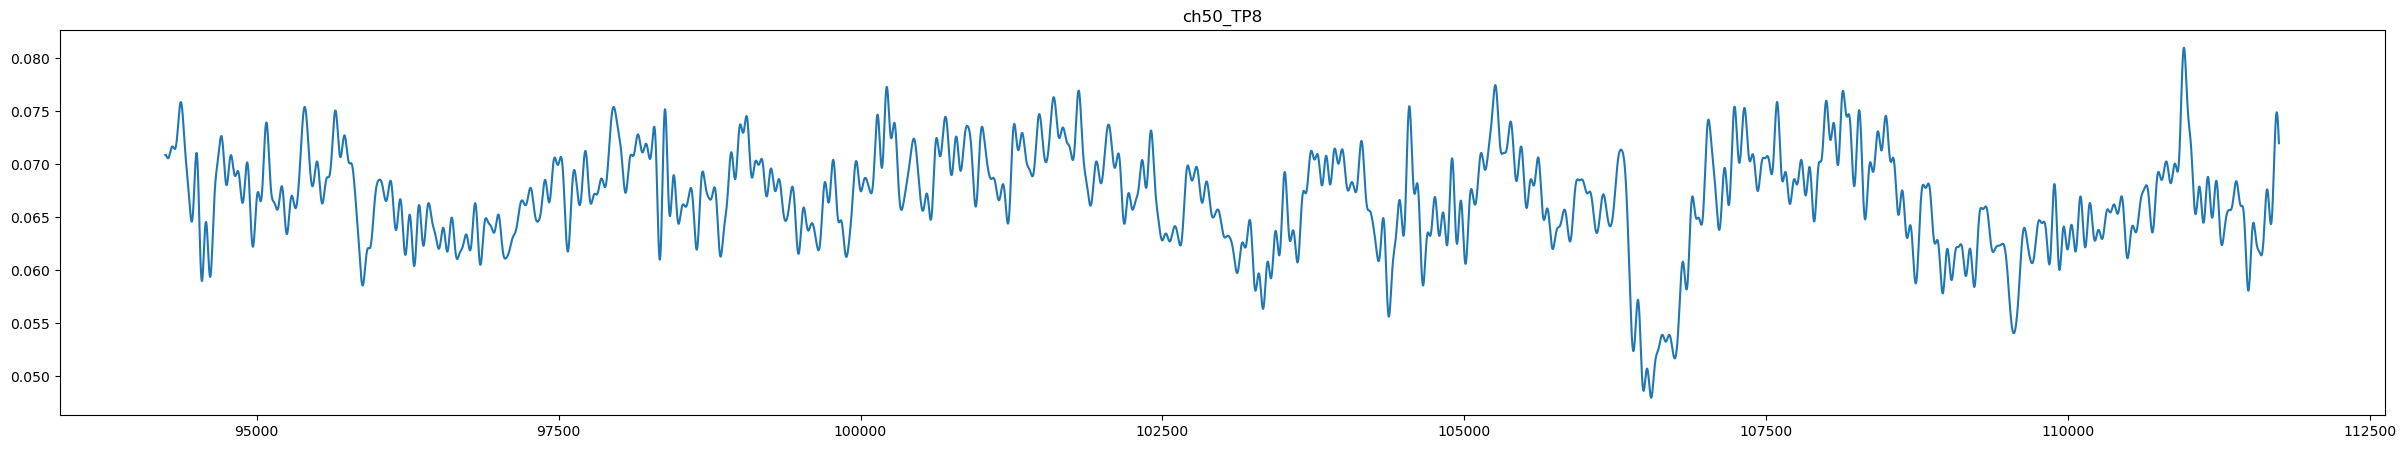

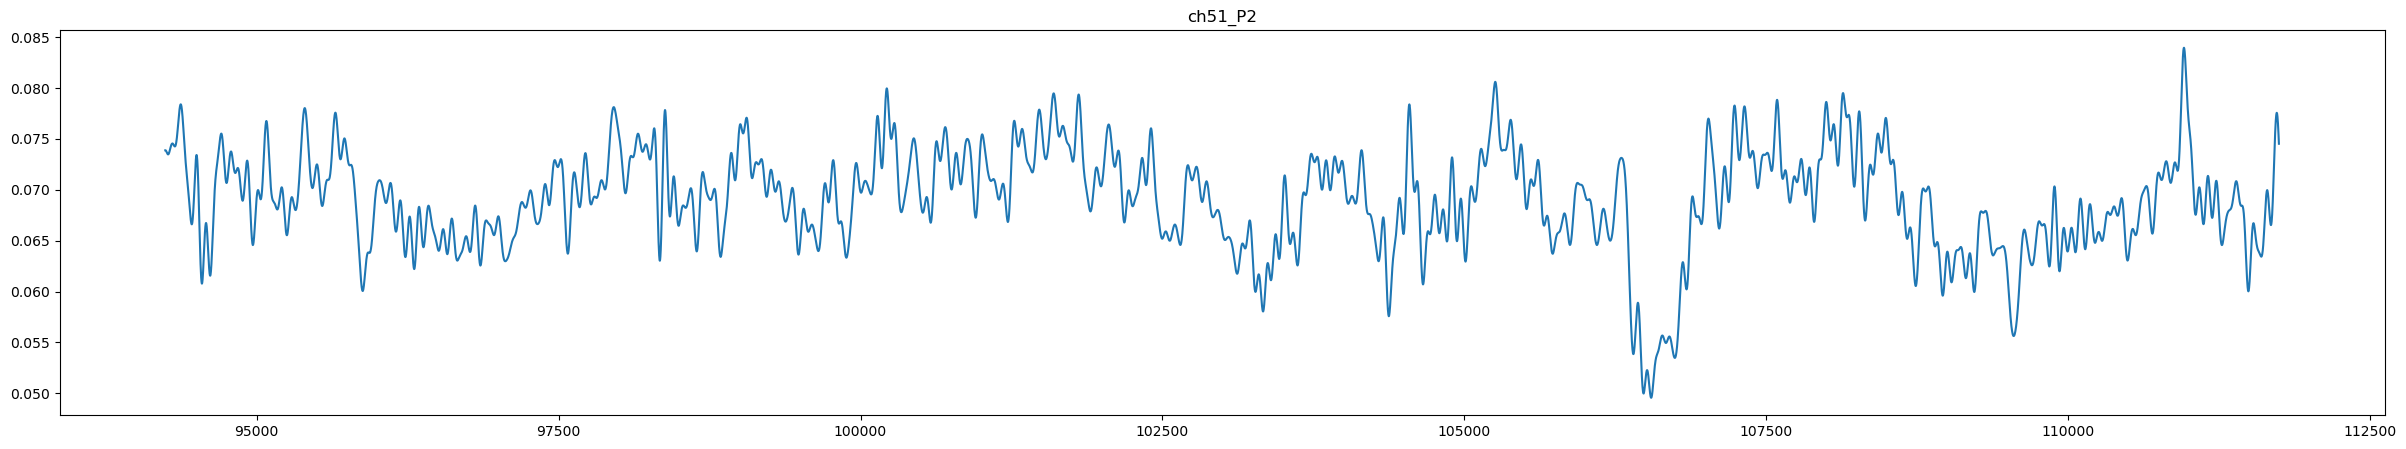

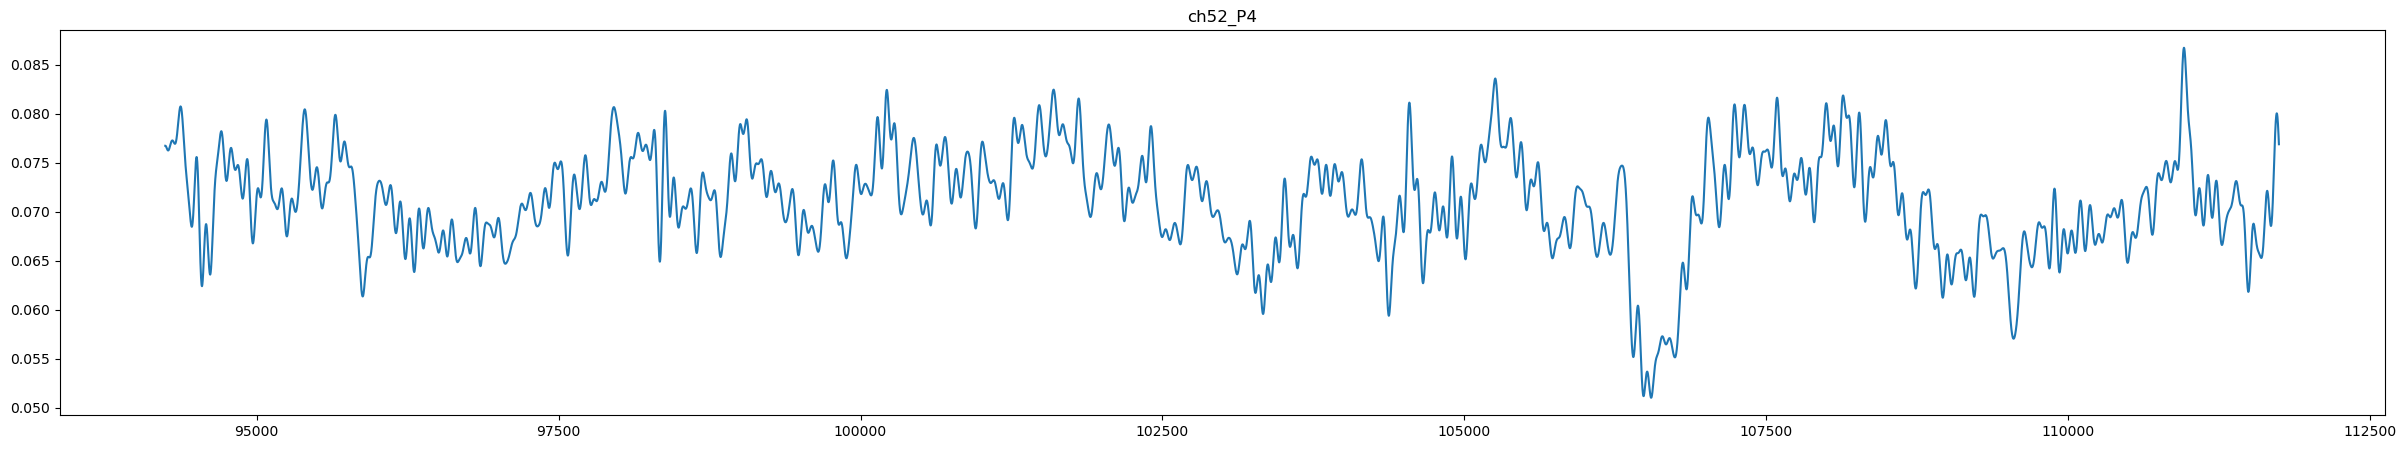

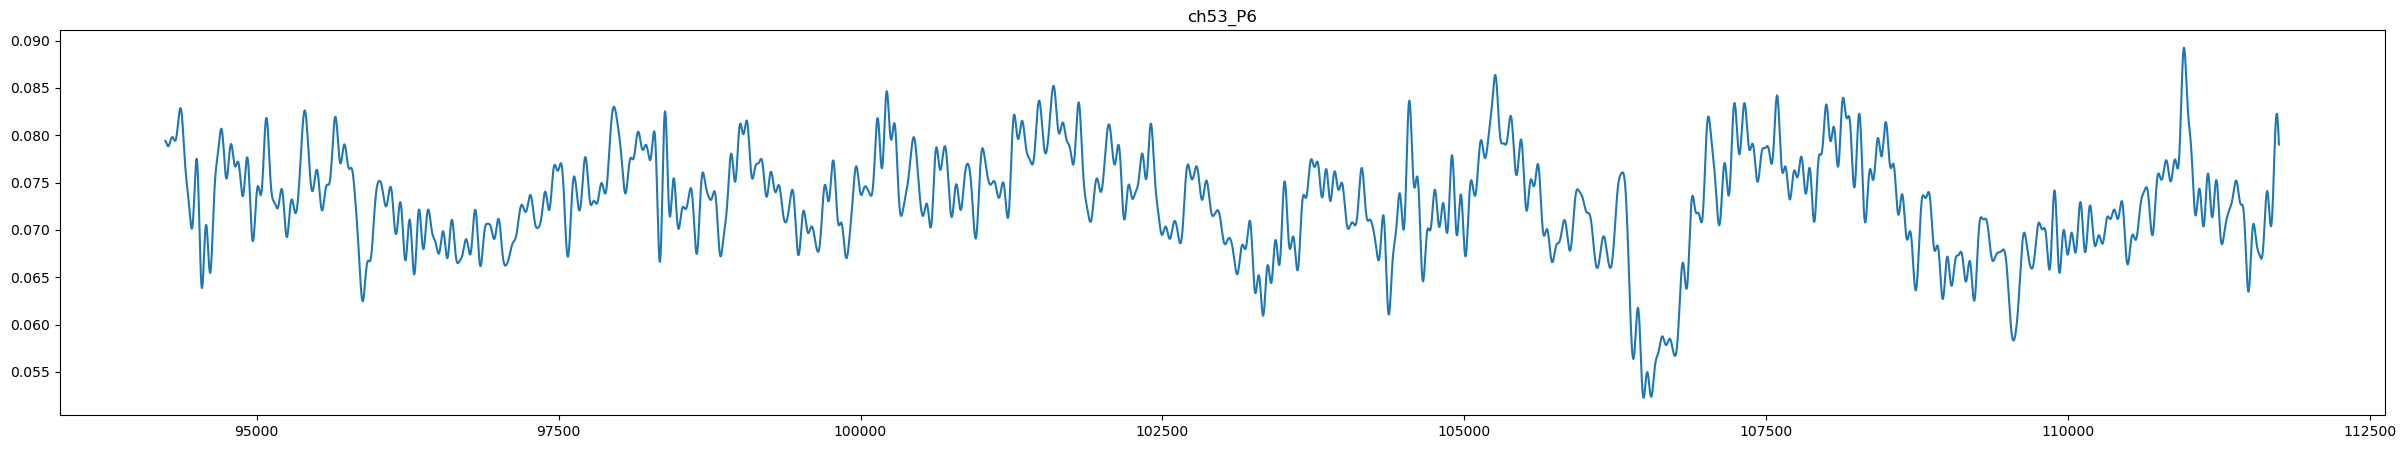

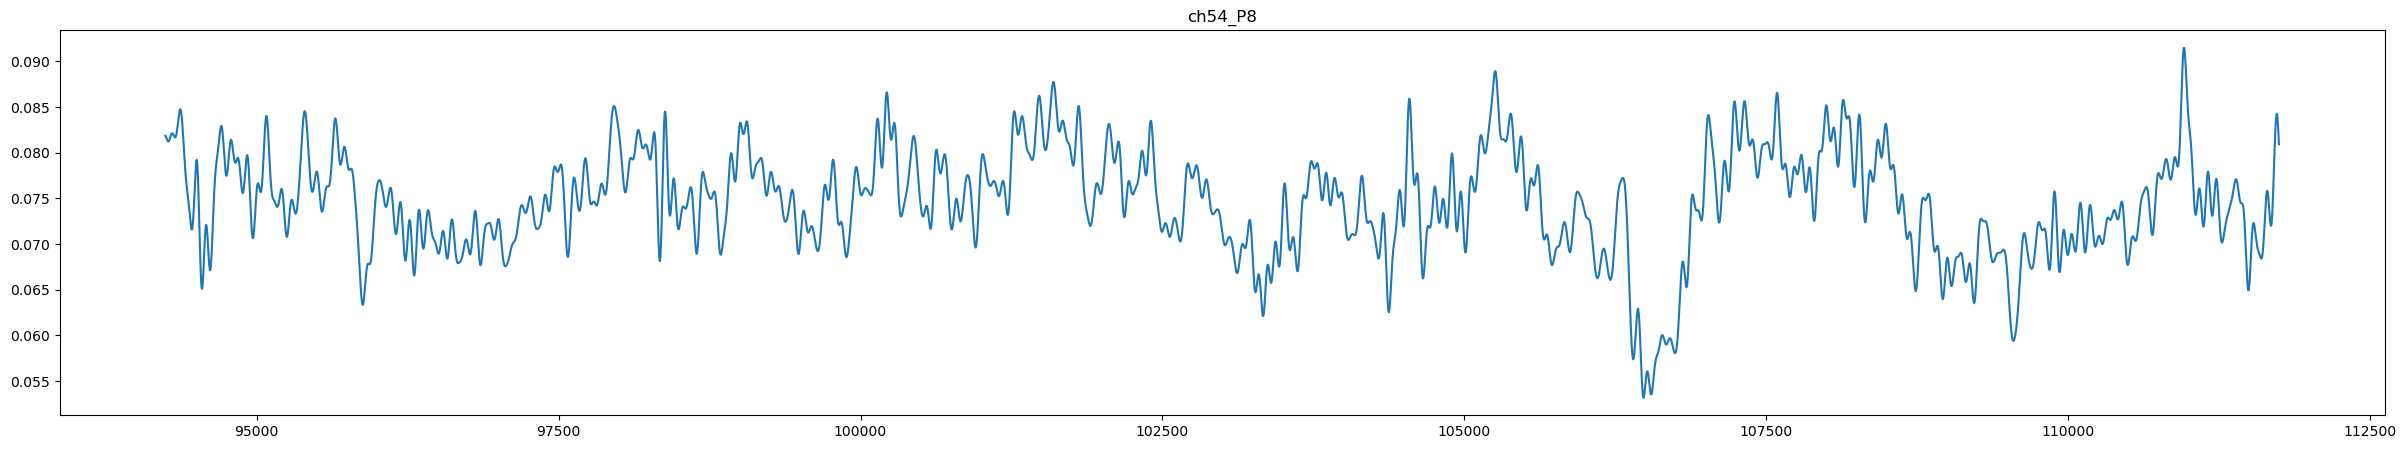

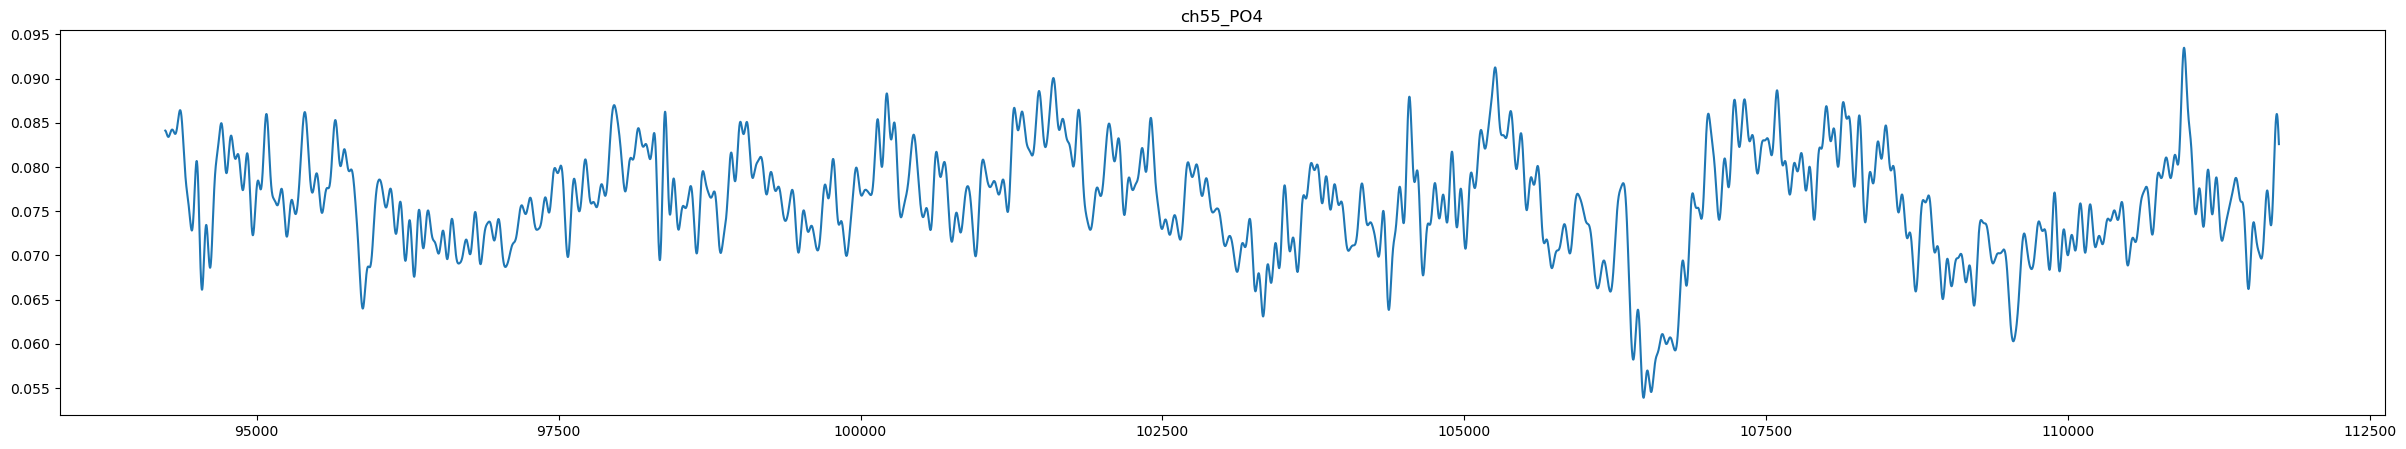

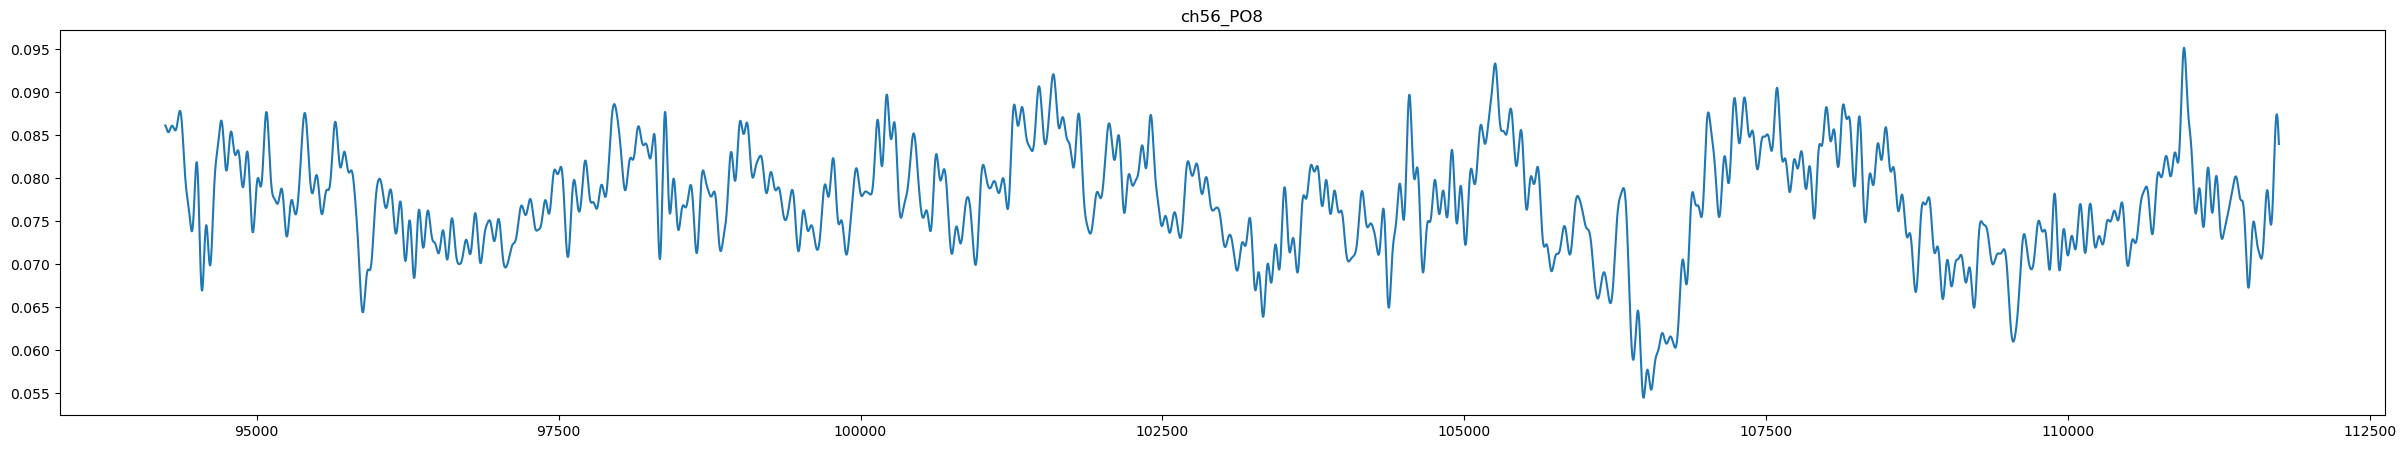

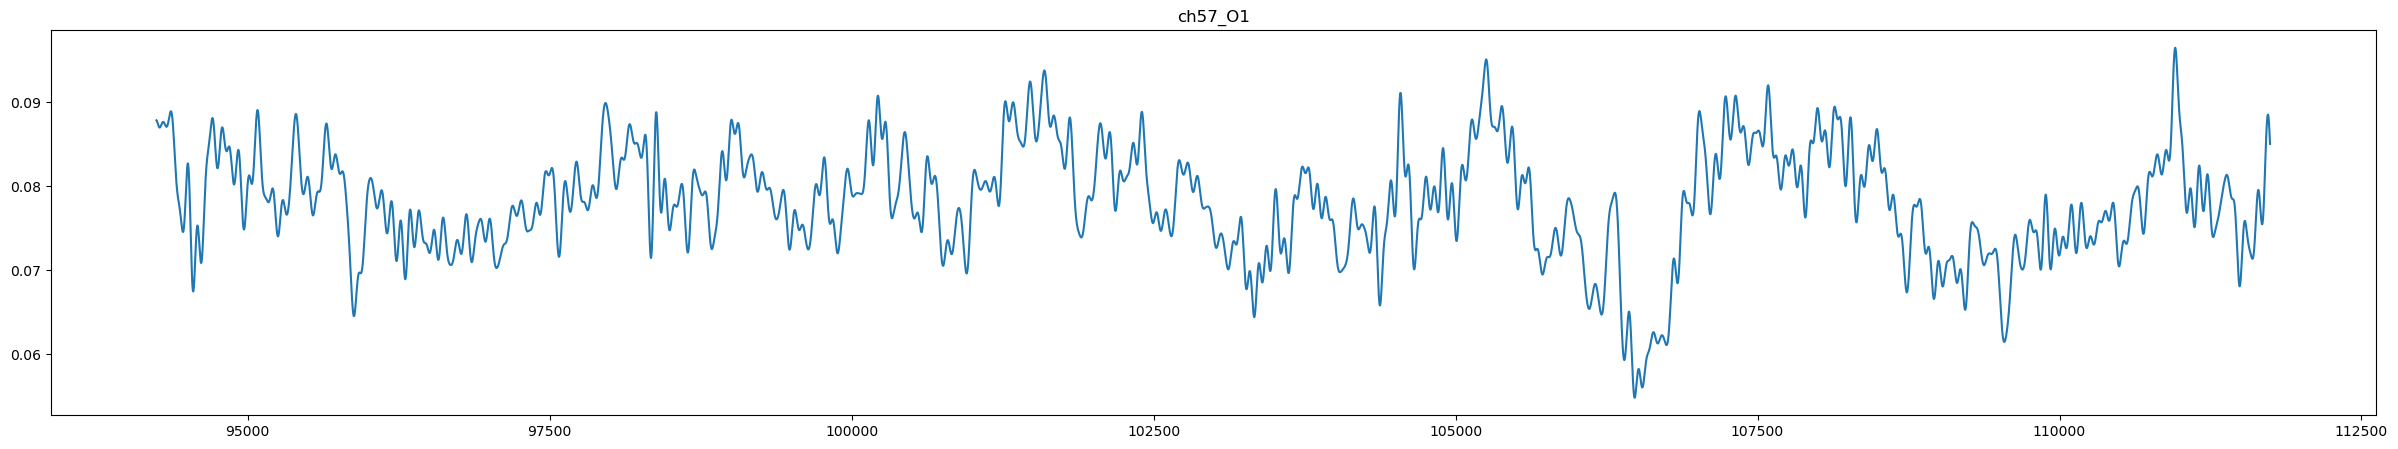

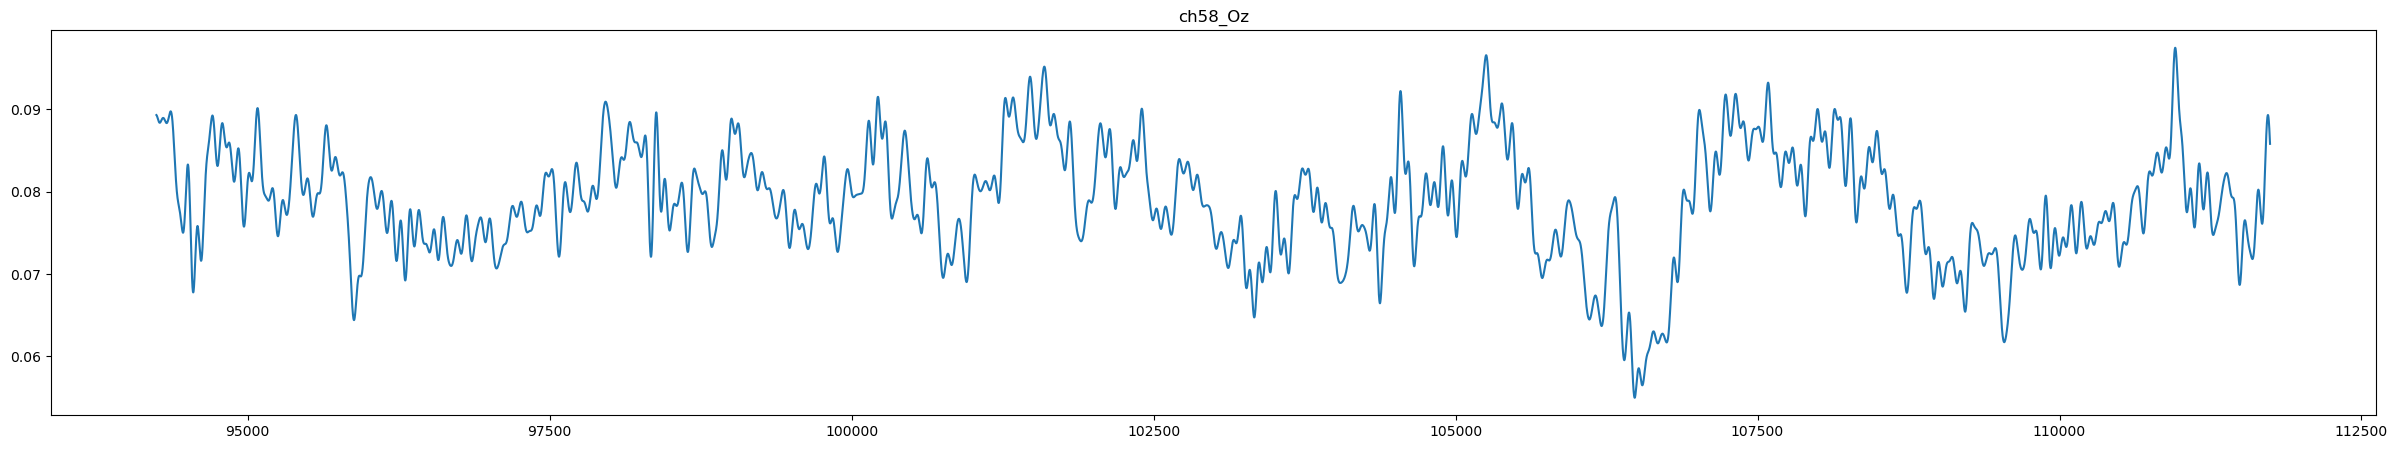

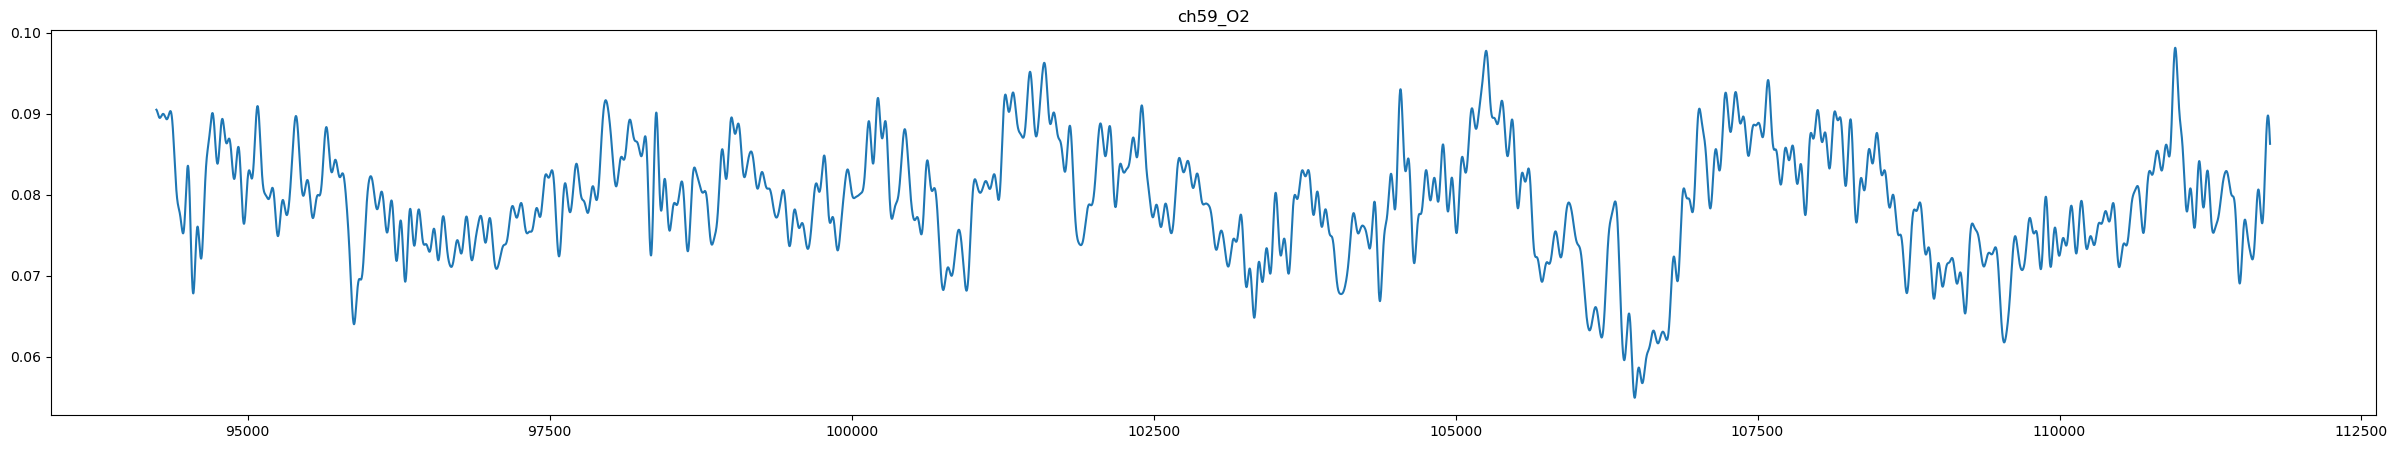

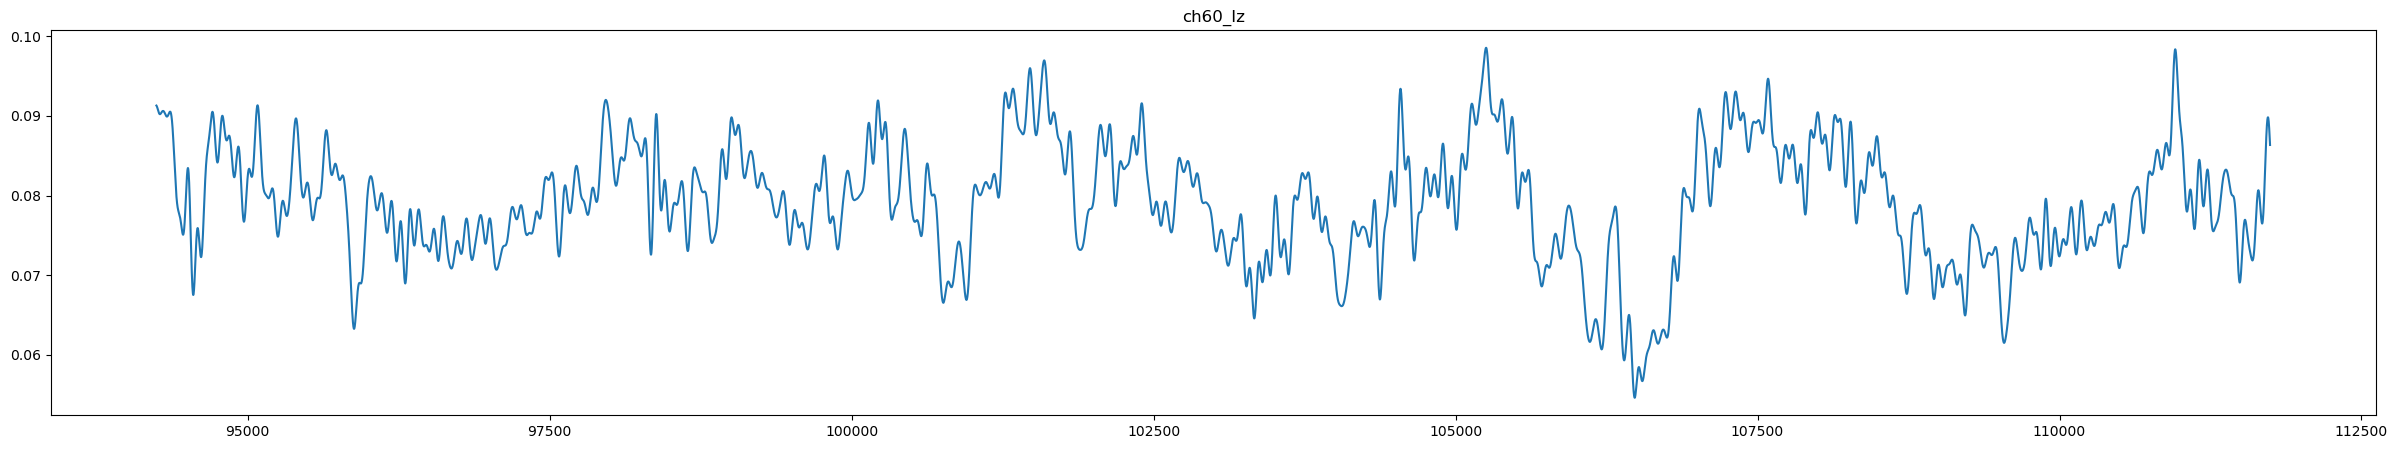

In [39]:
for i in range(0,60):
    plt.figure()
    plt.plot(df.iloc[55500:73000,i:i+1])
    plt.gcf().set_size_inches(30, 5)
    plt.title(df.columns[i])